In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format) 

In [2]:
df = pd.read_csv('Training Data.csv')


Default and rating transition study - Crisil

crisil.com
https://www.crisil.com/content/dam/crisil/our-analysis/publications/default-study/crisil-ratings-annual-default-and-ratings-transition-study-fy-2022.pdf

Despite the impact of Covid-19 pandemic for last two years, the overall default rate stands at 2.2% from 2.0% in fiscal 2021 and 4.5% in pre covid era (fiscal 2020)

within data above, we filterized risk by 10%

# Describe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
df.describe(include='all')

Id     Income       Age  Experience Married/Single  \
count  252000.00  252000.00 252000.00   252000.00         252000   
unique       NaN        NaN       NaN         NaN              2   
top          NaN        NaN       NaN         NaN         single   
freq         NaN        NaN       NaN         NaN         226272   
mean   126000.50 4997116.67     49.95       10.08            NaN   
std     72746.28 2878311.01     17.06        6.00            NaN   
min         1.00   10310.00     21.00        0.00            NaN   
25%     63000.75 2503015.00     35.00        5.00            NaN   
50%    126000.50 5000694.50     50.00       10.00            NaN   
75%    189000.25 7477502.00     65.00       15.00            NaN   
max    252000.00 9999938.00     79.00       20.00            NaN   

       House_Ownership Car_Ownership Profession           CITY          STATE  \
count           252000        252000     252000         252000         252000   
unique               3             2         51            317             29   
top             rented            no  Physician  Vijayanagaram  Uttar_Pradesh   
freq            231898        176000       5957           1259          28400   
mean               NaN           NaN        NaN            NaN            NaN   
std                NaN           NaN        NaN            NaN            NaN   
min                NaN           NaN        NaN            NaN            NaN   
25%                NaN           NaN        NaN            NaN            NaN   
50%                NaN           NaN        NaN            NaN            NaN   
75%                NaN           NaN        NaN            NaN            NaN   
max                NaN           NaN        NaN            NaN            NaN   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
count         252000.00          252000.00  252000.00  
unique              NaN                NaN        NaN  
top                 NaN                NaN        NaN  
freq                NaN                NaN        NaN  
mean               6.33              12.00       0.12  
std                3.65               1.40       0.33  
min                0.00              10.00       0.00  
25%                3.00              11.00       0.00  
50%                6.00              12.00       0.00  
75%                9.00              13.00       0.00  
max               14.00              14.00       1.00

In [5]:
df.rename(columns={'CITY':'City','STATE':'State','CURRENT_JOB_YRS':'Current_Job_Yrs','CURRENT_HOUSE_YRS':'Current_House_Yrs'}, inplace=True)

In [6]:
df.head()

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 City           State  Current_Job_Yrs  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   Current_House_Yrs  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [7]:
hasil = []
for col in df.columns:
    hasil.append([col, df[col].dtype, df[col].isna().sum(), (df[col].isna().sum()/len(df[col]))*100, df[col].nunique(), df[col].unique()[:4]])

##presentasi jumlah null, diguakan untuk feature selection (Biasanya diatas 5% dihapus *tergantung kesepakatan team)
output = pd.DataFrame(data=hasil, columns='kolom tipedata jumlah_null persen_null jumlah_unik contoh_unik'.split())
output

kolom tipedata  jumlah_null  persen_null  jumlah_unik  \
0                  Id    int64            0         0.00       252000   
1              Income    int64            0         0.00        41920   
2                 Age    int64            0         0.00           59   
3          Experience    int64            0         0.00           21   
4      Married/Single   object            0         0.00            2   
5     House_Ownership   object            0         0.00            3   
6       Car_Ownership   object            0         0.00            2   
7          Profession   object            0         0.00           51   
8                City   object            0         0.00          317   
9               State   object            0         0.00           29   
10    Current_Job_Yrs    int64            0         0.00           15   
11  Current_House_Yrs    int64            0         0.00            5   
12          Risk_Flag    int64            0         0.00            2   

                                          contoh_unik  
0                                        [1, 2, 3, 4]  
1                [1303834, 7574516, 3991815, 6256451]  
2                                    [23, 40, 66, 41]  
3                                       [3, 10, 4, 2]  
4                                   [single, married]  
5                       [rented, norent_noown, owned]  
6                                           [no, yes]  
7   [Mechanical_engineer, Software_Developer, Tech...  
8            [Rewa, Parbhani, Alappuzha, Bhubaneswar]  
9       [Madhya_Pradesh, Maharashtra, Kerala, Odisha]  
10                                       [3, 9, 4, 2]  
11                                   [13, 10, 12, 14]  
12                                             [0, 1]

## Penambahan Feature

In [8]:


conditions = [
    df['Current_Job_Yrs'] <= 3,
    (df['Current_Job_Yrs'] > 3) & (df['Current_Job_Yrs'] <= 6),
    (df['Current_Job_Yrs'] > 6) & (df['Current_Job_Yrs'] <= 9),
    (df['Current_Job_Yrs'] > 9) & (df['Current_Job_Yrs'] <= 14)
]

choices = ['0-3', '4-6', '7-9', '10-14']

df['Job_Duration_cat'] = np.select(conditions, choices, default='>14')


In [9]:

conditions = [
    df['Experience'] <= 5,
    (df['Experience'] > 5) & (df['Experience'] <= 10),
    (df['Experience'] > 10) & (df['Experience'] <= 15)
]

choices = ['0-5', '6-10', '11-15']

df['Experience_cat'] = np.select(conditions, choices, default='>15')


In [10]:


conditions = [
    df['Income'] <= 2500000,
    (df['Income'] > 2500000) & (df['Income'] <= 5000000),
    (df['Income'] > 5000000) & (df['Income'] <= 7500000)
]

choices = ['<2500000', '<5000000', '<7500000']

df['Income_cat'] = np.select(conditions, choices, default='>7500000')


In [11]:
import numpy as np

conditions = [
    df['Age'] <= 35,
    (df['Age'] > 35) & (df['Age'] <= 50),
    (df['Age'] > 50) & (df['Age'] <= 65)
]

choices = ['21-34', '35-49', '50-64']

df['Age_cat'] = np.select(conditions, choices, default='65-79')


In [12]:
df.head()

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 City           State  Current_Job_Yrs  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   Current_House_Yrs  Risk_Flag Job_Duration_cat Experience_cat Income_cat  \
0                 13          0              0-3            0-5   <2500000   
1                 13          0              7-9           6-10   >7500000   
2                 10          0              4-6            0-5   <5000000   
3                 12          1              0-3            0-5   <7500000   
4                 14          1              0-3          11-15   <7500000   

  Age_cat  
0   21-34  
1   35-49  
2   65-79  
3   35-49  
4   35-49

## Membagi Feature Menjadi Klasifikasi Numerical & Categorical

In [13]:
# Assuming your DataFrame is named 'df'
# List of column names containing numerical data
nums = df.select_dtypes(include='number').columns.tolist()[1:]

# List of column names containing categorical/object data
cats = df.select_dtypes(include='object').columns.tolist()

In [14]:
df[cats].describe()

Married/Single House_Ownership Car_Ownership Profession           City  \
count          252000          252000        252000     252000         252000   
unique              2               3             2         51            317   
top            single          rented            no  Physician  Vijayanagaram   
freq           226272          231898        176000       5957           1259   

                State Job_Duration_cat Experience_cat Income_cat Age_cat  
count          252000           252000         252000     252000  252000  
unique             29                4              4          4       4  
top     Uttar_Pradesh              4-6            0-5   <7500000   21-34  
freq            28400            76921          70022      63461   65726

In [15]:
df[nums].describe()

Income       Age  Experience  Current_Job_Yrs  Current_House_Yrs  \
count  252000.00 252000.00   252000.00        252000.00          252000.00   
mean  4997116.67     49.95       10.08             6.33              12.00   
std   2878311.01     17.06        6.00             3.65               1.40   
min     10310.00     21.00        0.00             0.00              10.00   
25%   2503015.00     35.00        5.00             3.00              11.00   
50%   5000694.50     50.00       10.00             6.00              12.00   
75%   7477502.00     65.00       15.00             9.00              13.00   
max   9999938.00     79.00       20.00            14.00              14.00   

       Risk_Flag  
count  252000.00  
mean        0.12  
std         0.33  
min         0.00  
25%         0.00  
50%         0.00  
75%         0.00  
max         1.00

In [16]:
df['State'] = df['State'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')

In [17]:
df[df['State'] == 'Uttar_Pradesh[5]'].shape[0]

0

## Membagi DataFrame Ke Dalam Klasifikasi Risk & Non-Risk

In [18]:
risk0 = df[df['Risk_Flag']==0]
risk1 = df[df['Risk_Flag']==1]

In [19]:
risk1.describe(include=object)

Married/Single House_Ownership Car_Ownership      Profession   City  \
count           30996           30996         30996           30996  30996   
unique              2               3             2              51    317   
top            single          rented            no  Police_officer  Kochi   
freq            28360           29121         22561             826    243   

                State Job_Duration_cat Experience_cat Income_cat Age_cat  
count           30996            30996          30996      30996   30996  
unique             28                4              4          4       4  
top     Uttar_Pradesh              4-6            0-5   <2500000   21-34  
freq             3440             9049           9874       8057    8933

In [20]:
risk1.describe()

Id     Income      Age  Experience  Current_Job_Yrs  \
count  30996.00   30996.00 30996.00    30996.00         30996.00   
mean  132246.26 4973358.84    48.96        9.53             6.17   
std    80585.13 2921064.50    17.37        6.07             3.75   
min        4.00   10675.00    21.00        0.00             0.00   
25%    60103.75 2421029.00    33.00        4.00             3.00   
50%   138138.50 4977653.00    49.00        9.00             6.00   
75%   213395.25 7556052.00    64.00       15.00             9.00   
max   251994.00 9994501.00    79.00       20.00            14.00   

       Current_House_Yrs  Risk_Flag  
count           30996.00   30996.00  
mean               11.98       1.00  
std                 1.40       0.00  
min                10.00       1.00  
25%                11.00       1.00  
50%                12.00       1.00  
75%                13.00       1.00  
max                14.00       1.00

# 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?    
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?    
C. Apakah ada kolom yang memiliki nilai summary agak aneh?     
(min/mean/median/max/unique/top/freq)     


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   City               252000 non-null  object
 9   State              252000 non-null  object
 10  Current_Job_Yrs    252000 non-null  int64 
 11  Current_House_Yrs  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
 13  Job_Duration_cat   252000 non-null  object
 14  Experience_cat     252000 non-null  object
 15  Income_cat         252000 non-null  object
 16  Age_cat            2

In [22]:
df.describe()

Id     Income       Age  Experience  Current_Job_Yrs  \
count 252000.00  252000.00 252000.00   252000.00        252000.00   
mean  126000.50 4997116.67     49.95       10.08             6.33   
std    72746.28 2878311.01     17.06        6.00             3.65   
min        1.00   10310.00     21.00        0.00             0.00   
25%    63000.75 2503015.00     35.00        5.00             3.00   
50%   126000.50 5000694.50     50.00       10.00             6.00   
75%   189000.25 7477502.00     65.00       15.00             9.00   
max   252000.00 9999938.00     79.00       20.00            14.00   

       Current_House_Yrs  Risk_Flag  
count          252000.00  252000.00  
mean               12.00       0.12  
std                 1.40       0.33  
min                10.00       0.00  
25%                11.00       0.00  
50%                12.00       0.00  
75%                13.00       0.00  
max                14.00       1.00

In [23]:
# Mencari duplicates
df.duplicated().any()

False

A. Semua Tipe Data Sesuai, kecuali  State Uttar_Pradesh[5] yang akan di-rename menjadi Uttar_Pradesh, style kolom disetarakan menjadi Title, 'Married//Single' di-rename menjadi 'Status'
B. Tidak Ada Kolom Kosong.          
C. Tidak ada Kolom yang memiliki Summary Aneh

# 2. Univariate Analysis (25 poin)
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). </br>
Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb).    
Jelaskan juga apa yang harus di-follow up saat data pre-processing.

In [24]:
df[nums].describe()

Income       Age  Experience  Current_Job_Yrs  Current_House_Yrs  \
count  252000.00 252000.00   252000.00        252000.00          252000.00   
mean  4997116.67     49.95       10.08             6.33              12.00   
std   2878311.01     17.06        6.00             3.65               1.40   
min     10310.00     21.00        0.00             0.00              10.00   
25%   2503015.00     35.00        5.00             3.00              11.00   
50%   5000694.50     50.00       10.00             6.00              12.00   
75%   7477502.00     65.00       15.00             9.00              13.00   
max   9999938.00     79.00       20.00            14.00              14.00   

       Risk_Flag  
count  252000.00  
mean        0.12  
std         0.33  
min         0.00  
25%         0.00  
50%         0.00  
75%         0.00  
max         1.00

In [25]:
df[cats].describe()

Married/Single House_Ownership Car_Ownership Profession           City  \
count          252000          252000        252000     252000         252000   
unique              2               3             2         51            317   
top            single          rented            no  Physician  Vijayanagaram   
freq           226272          231898        176000       5957           1259   

                State Job_Duration_cat Experience_cat Income_cat Age_cat  
count          252000           252000         252000     252000  252000  
unique             28                4              4          4       4  
top     Uttar_Pradesh              4-6            0-5   <7500000   21-34  
freq            29143            76921          70022      63461   65726

In [126]:
risk1[cats].describe()

Married/Single House_Ownership Car_Ownership      Profession   City  \
count           30996           30996         30996           30996  30996   
unique              2               3             2              51    317   
top            single          rented            no  Police_officer  Kochi   
freq            28360           29121         22561             826    243   

                State Job_Duration_cat Experience_cat Income_cat Age_cat  
count           30996            30996          30996      30996   30996  
unique             28                4              4          4       4  
top     Uttar_Pradesh              4-6            0-5   <2500000   21-34  
freq             3440             9049           9874       8057    8933

In [127]:
risk0[cats].describe()

Married/Single House_Ownership Car_Ownership Profession           City  \
count          221004          221004        221004     221004         221004   
unique              2               3             2         51            317   
top            single          rented            no  Physician  Vijayanagaram   
freq           197912          202777        153439       5247           1110   

                State Job_Duration_cat Experience_cat Income_cat Age_cat  
count          221004           221004         221004     221004  221004  
unique             28                4              4          4       4  
top     Uttar_Pradesh              4-6            0-5   <7500000   21-34  
freq            25703            67872          60148      55925   56793

## Numerical

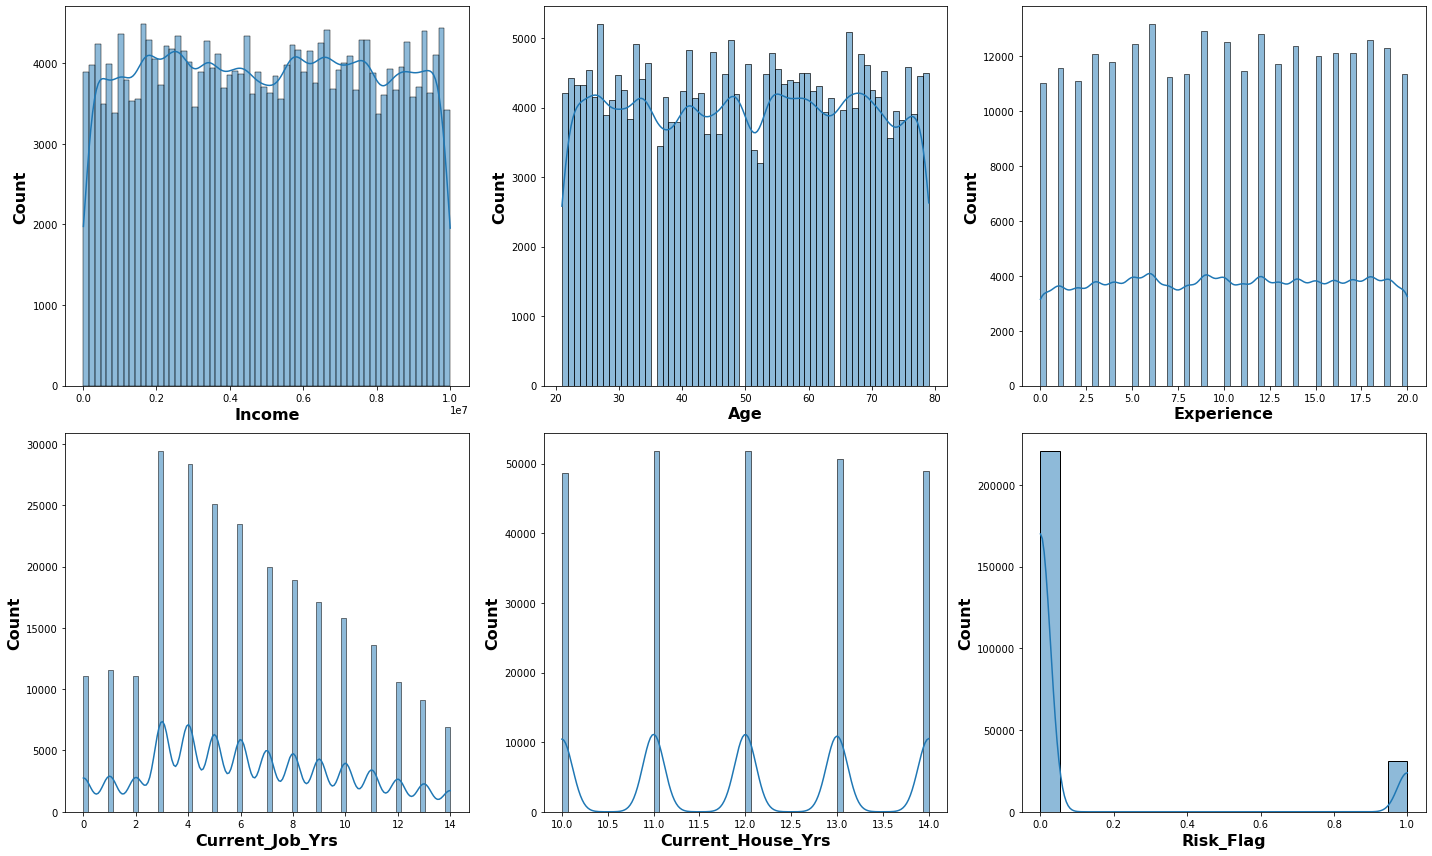

In [26]:
plt.figure(figsize=(20,12))

for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.histplot(x=df[nums[i]], kde=True)
    plt.yticks(fontsize=10)
    plt.ylabel('Count', fontsize=16, weight ='bold')
    plt.xlabel(nums[i].title(), fontsize=16, weight='bold')
    plt.tight_layout()

plt.show()

<Axes: xlabel='Age', ylabel='Count'>

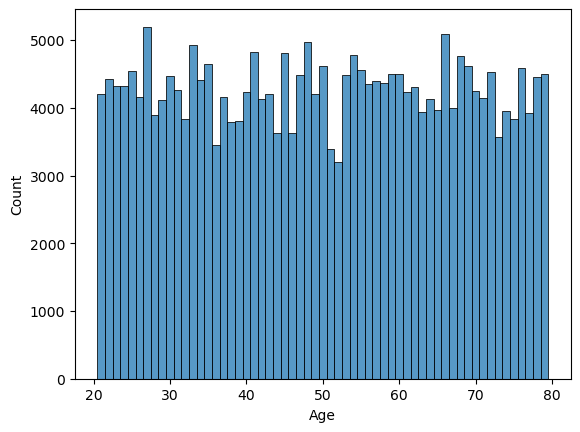

In [27]:
sns.histplot(data=df, x='Age', discrete=True)


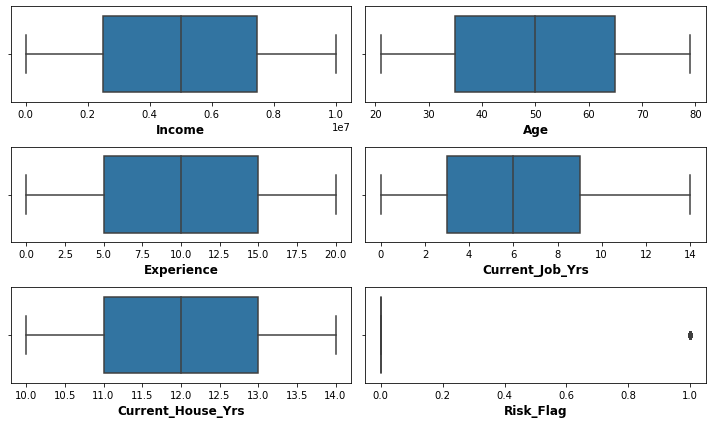

In [27]:
plt.figure(figsize=(10, 6))

for i in range(len(nums)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[nums[i]])
    plt.xlabel(nums[i].title(), fontsize=12, weight='bold')
    plt.tight_layout()

plt.show()

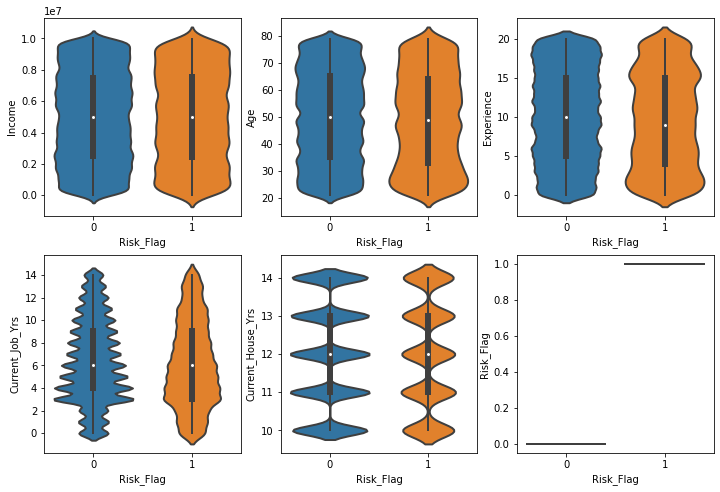

In [28]:
import math

plt.figure(figsize=(12, 8))
for i in range (0, len(nums)):
    plt.subplot(math.ceil(len(nums)/3), 3, i+1)
    sns.violinplot(data=df, y=nums[i], x='Risk_Flag', linewidth=2, orient='v')

## Categorical

In [29]:
cats

['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'City',
 'State',
 'Job_Duration_cat',
 'Experience_cat',
 'Income_cat',
 'Age_cat']

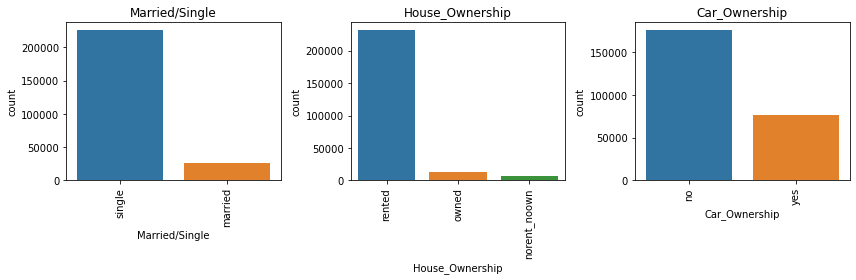

In [30]:
# Menentukan kolom kategorikal dalam DataFrame
cats_cols1 = ['Married/Single', 'House_Ownership', 'Car_Ownership']

# Menghitung jumlah kolom kategorikal
num_cats_cols1 = len(cats_cols1)

# Mengatur ukuran plot
fig, axes = plt.subplots(1, num_cats_cols1, figsize=(num_cats_cols1*4, 4))

# Loop untuk membuat countplot pada setiap kolom kategorikal
for i, col in enumerate(cats_cols1):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)  # Mengatur rotasi label sumbu x

plt.tight_layout()
plt.show()


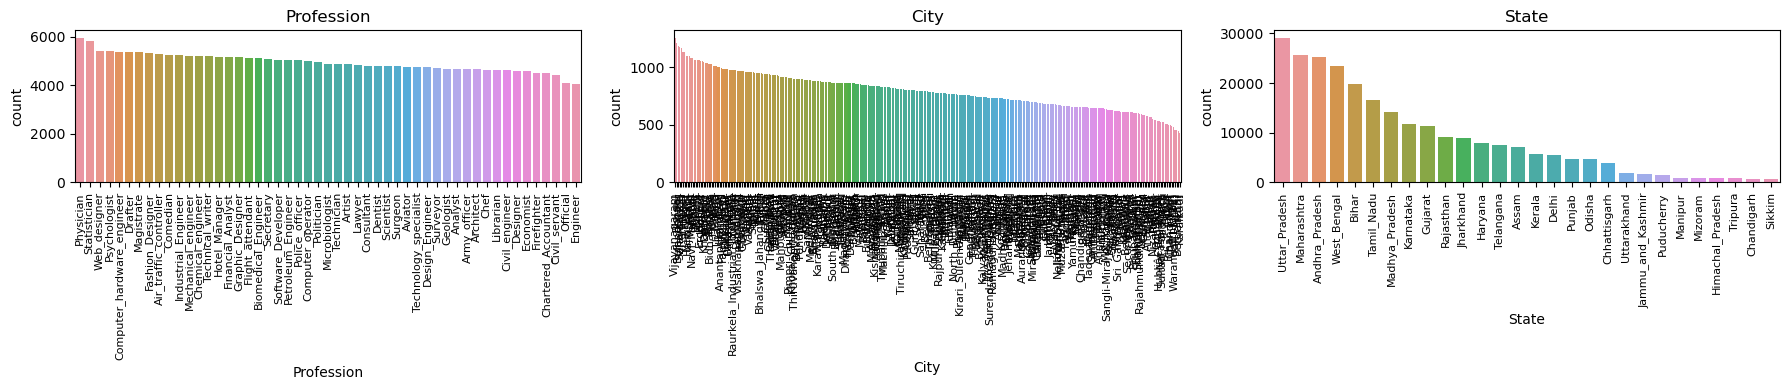

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan kolom kategorikal dalam DataFrame
cats_cols2 = ['Profession', 'City', 'State']

# Menghitung jumlah kolom kategorikal
num_cats_cols2 = len(cats_cols2)

# Mengatur ukuran plot
fig, axes = plt.subplots(1, num_cats_cols2, figsize=(num_cats_cols2*6, 4))

# Loop untuk membuat countplot pada setiap kolom kategorikal
for i, col in enumerate(cats_cols2):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)  # Mengatur rotasi dan ukuran font sumbu x

plt.tight_layout()
plt.show()


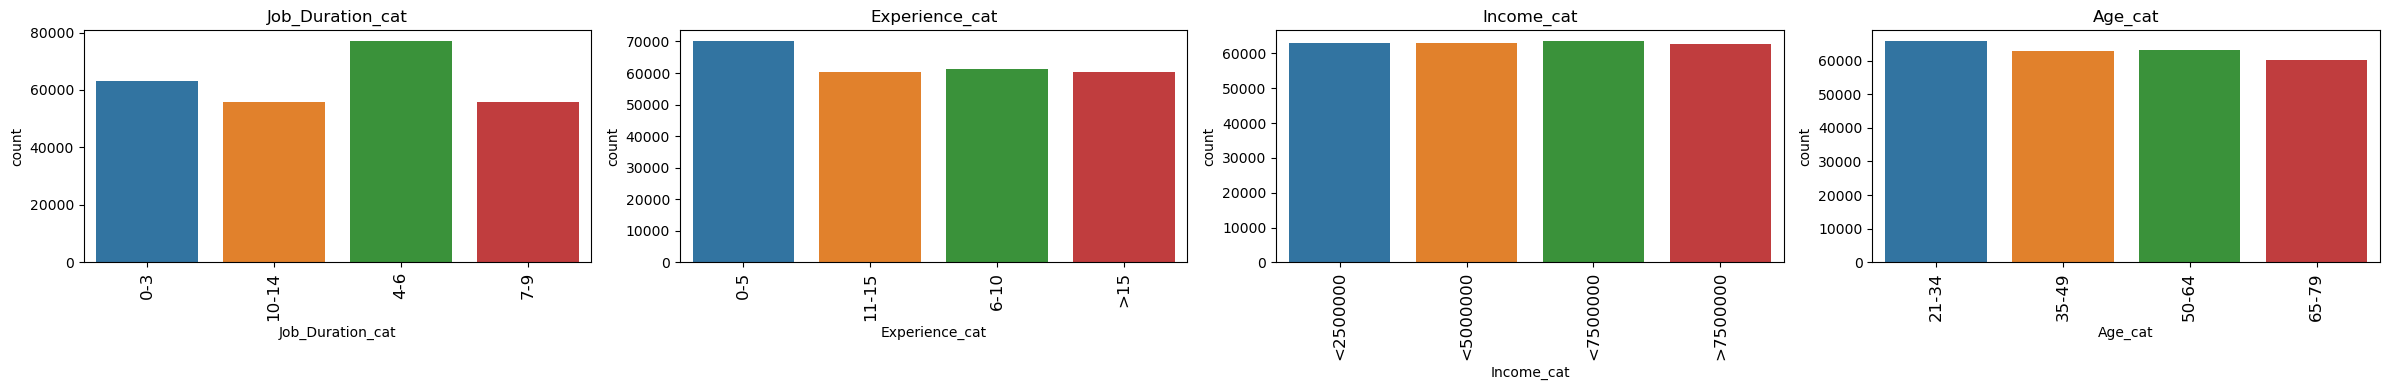

In [31]:
# Menentukan kolom kategorikal dalam DataFrame
cats_cols3 = ['Job_Duration_cat', 'Experience_cat', 'Income_cat', 'Age_cat']

# Menghitung jumlah kolom kategorikal
num_cats_cols3 = len(cats_cols3)

# Mengatur ukuran plot
fig, axes = plt.subplots(1, num_cats_cols3, figsize=(num_cats_cols3*6, 4))

# Loop untuk membuat countplot pada setiap kolom kategorikal
for i, col in enumerate(cats_cols3):
    order = sorted(df[col].unique())  # Sort unique values of the column
    sns.countplot(data=df, x=col, ax=axes[i], order=order)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90, labelsize=12)  # Mengatur rotasi dan ukuran font sumbu x

plt.tight_layout()
plt.show()


1. Dari chart Hisplot terlihat distribusi yang tidak merata antar features, Current_Job_Yrs cendrung positive skewed
2. Kategori terlalu banyak pada Proffesion, City dan State.
   Job_Duration terbanyak adalah 4-6 tahun, Experience terbanyak 0-5 tahun (banyak tenaga kerja baru), rentang Income_cat hampir merata, rentang Age_cat di dominasi 21-34
3. Masih harus dicari insight secara mendalam dengan MultiVariate
4. Tidak ada yang perlu dilakukan dalam Pre-Processing karena tidak ada NaN atau data yang kosong

# 3. Multivariate Analysis (15 poin)
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:<br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?<br>
(Tuliskan juga jika memang tidak ada feature yang saling berkorelasi)

## 3.1. Correlation Heatmap

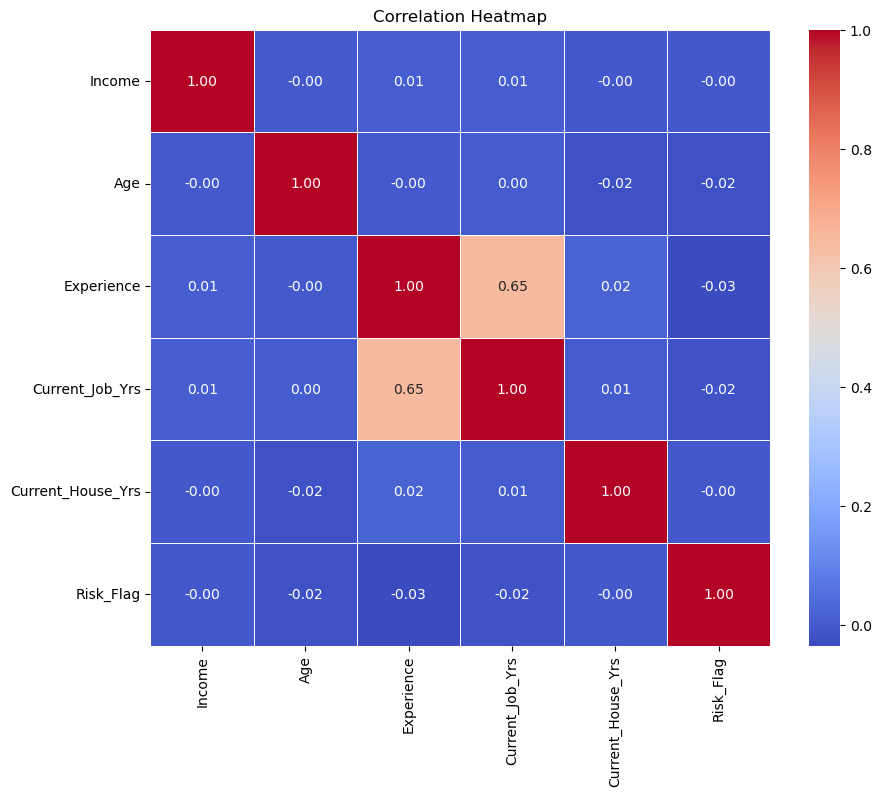

In [32]:


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[nums].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 3.2. Pearson Correlation

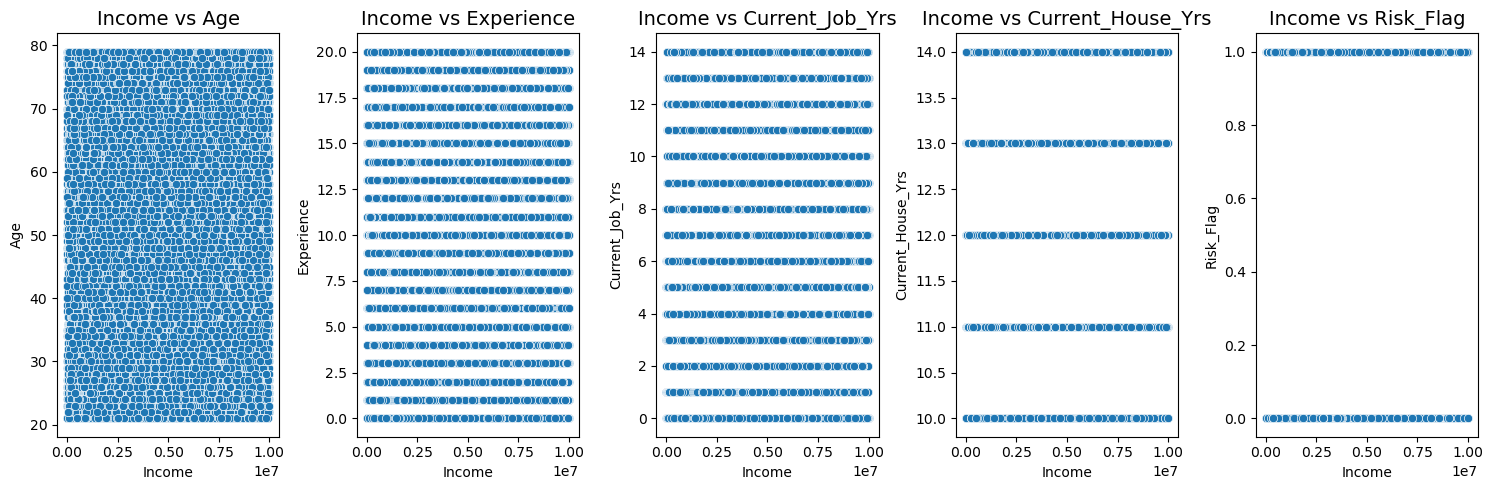

In [33]:
# Create a scatter plot for each column in 'nums' against the first column in 'df'
fig, axes = plt.subplots(1, len(nums) - 1, figsize=(15, 5))  # 1 row, number of columns = len(nums) - 1

for i, col in enumerate(nums[1:]):  # Skip the first column in 'nums' since it will be the x-axis
    sns.scatterplot(data=df, x=nums[0], y=col, ax=axes[i])
    axes[i].set_title(f'{nums[0]} vs {col}', fontsize=14)
    axes[i].set_xlabel(nums[0])
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [34]:
nums

['Income',
 'Age',
 'Experience',
 'Current_Job_Yrs',
 'Current_House_Yrs',
 'Risk_Flag']

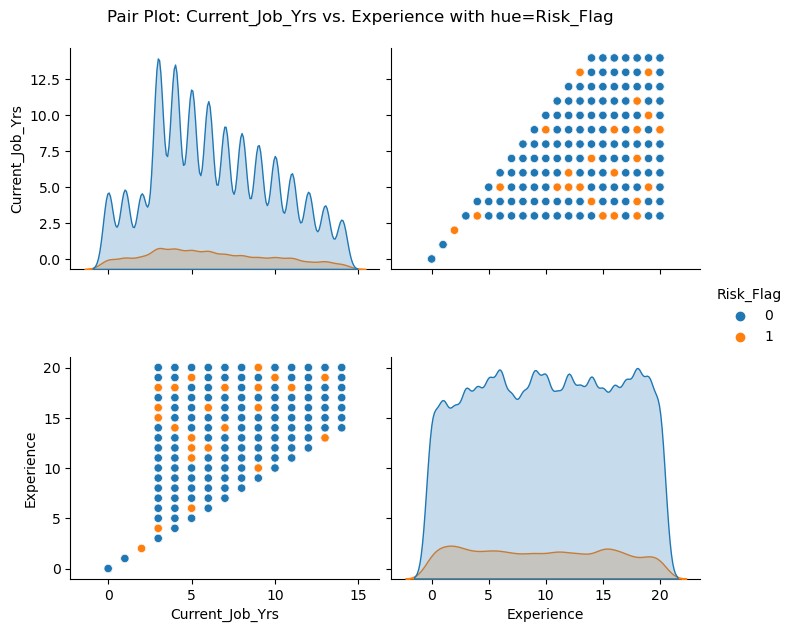

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pair plot with increased height and adjusted title position
pair_plot = sns.pairplot(df[nums], hue='Risk_Flag', vars=['Current_Job_Yrs', 'Experience'], height=3, aspect=1.2)
pair_plot.fig.subplots_adjust(hspace=0.4)

plt.xlabel('Current_Job_Yrs')
plt.ylabel('Experience')
plt.title('Pair Plot: Current_Job_Yrs vs. Experience with hue=Risk_Flag', y=2.5, x=-0.1, pad=3, fontsize=12 )

plt.show()


## 3.3. Category Plots

In [36]:
cats

['Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'City',
 'State',
 'Job_Duration_cat',
 'Experience_cat',
 'Income_cat',
 'Age_cat']

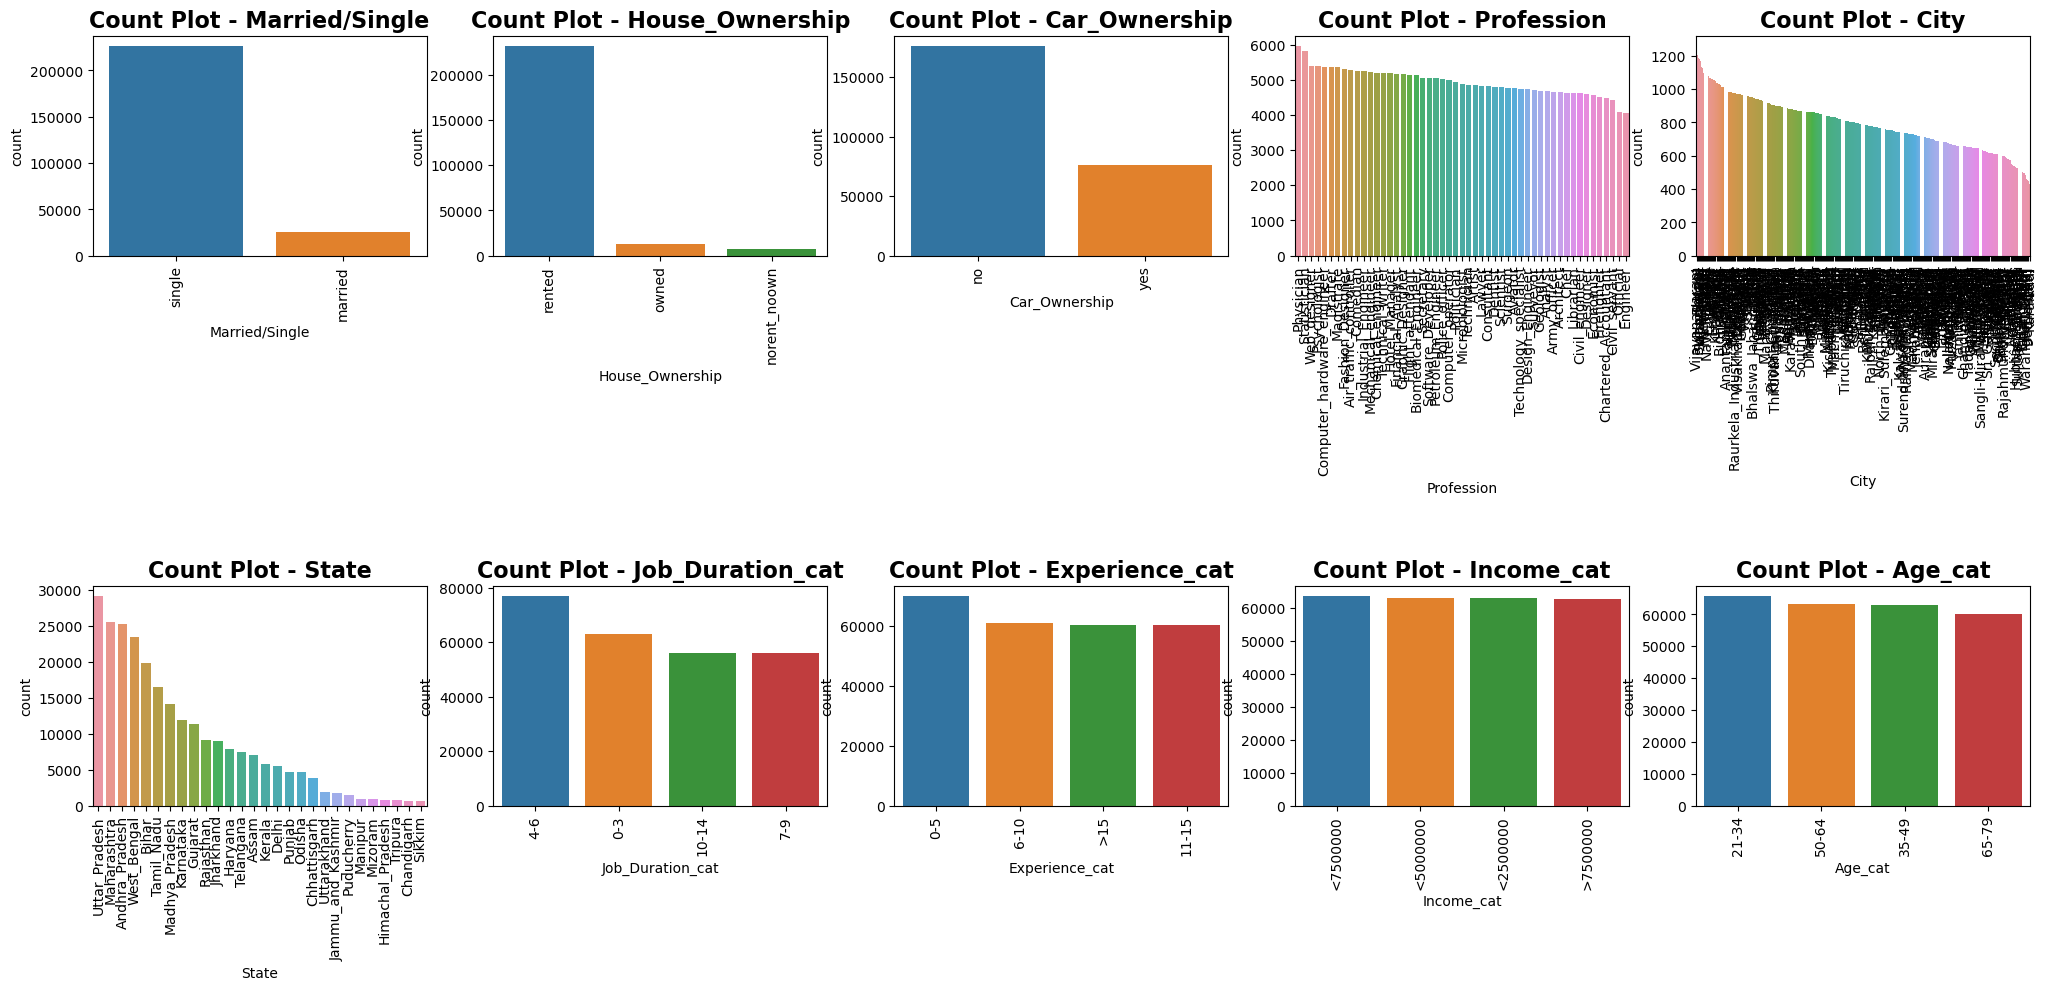

In [37]:
# Membuat dua baris dengan panjang 5 untuk chart pada baris pertama
# dan 1 untuk chart pada baris kedua
fig, axes = plt.subplots(2, 5, figsize=(25, 10), gridspec_kw={'hspace': 1.5})

# Membuat count plot untuk setiap kolom kategorikal pada baris pertama
for i, cat_col in enumerate(cats[:5]):
    sns.countplot(data=df, x=cat_col, ax=axes[0, i], order=df[cat_col].value_counts().index)
    axes[0, i].set_title(f'Count Plot - {cat_col}', fontsize=16, fontweight='bold')
    axes[0, i].tick_params(axis='x', labelrotation=90)  # Mengatur rotasi label x-axis untuk lebih mudah dibaca

# Membuat count plot untuk setiap kolom kategorikal pada baris kedua
for i, cat_col in enumerate(cats[5:]):
    sns.countplot(data=df, x=cat_col, ax=axes[1, i], order=df[cat_col].value_counts().index)
    axes[1, i].set_title(f'Count Plot - {cat_col}', fontsize=16, fontweight='bold')
    axes[1, i].tick_params(axis='x', labelrotation=90)  # Mengatur rotasi label x-axis untuk lebih mudah dibaca


plt.show()

In [38]:
df['Profession'].value_counts().head()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Name: Profession, dtype: int64

In [39]:
df['City'].value_counts().head()

Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa[29]      1180
Vijayawada       1172
Name: City, dtype: int64

In [40]:
df['State'].value_counts().head()

Uttar_Pradesh     29143
Maharashtra       25562
Andhra_Pradesh    25297
West_Bengal       23483
Bihar             19780
Name: State, dtype: int64

## Soal 3. Multivariete Analysis [ Kesimpulan ]

Correlation Heatmap
1. ada Korelasi yang signifikan pada experience & current_job_yrs
2. dengan nilai koefisien korelasi 0.65
3. Pada Categorical State besar seperti Uttar Pradesh, Maharashtra, Andhra_Pradesh, West_Bengal sebagai mayoritas populasi


# 4. Business Insight (30 poin)
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

## 4.1 EDA

In [41]:
risk1.describe(include=object)

Married/Single House_Ownership Car_Ownership      Profession   City  \
count           30996           30996         30996           30996  30996   
unique              2               3             2              51    317   
top            single          rented            no  Police_officer  Kochi   
freq            28360           29121         22561             826    243   

                State Job_Duration_cat Experience_cat Income_cat Age_cat  
count           30996            30996          30996      30996   30996  
unique             28                4              4          4       4  
top     Uttar_Pradesh              4-6            0-5   <2500000   21-34  
freq             3440             9049           9874       8057    8933

### 4.1.a. Analisis pada Customer Bermasalah

#### 1. Barplot Untuk Mencari Outlier Pada Customer Bermasalah

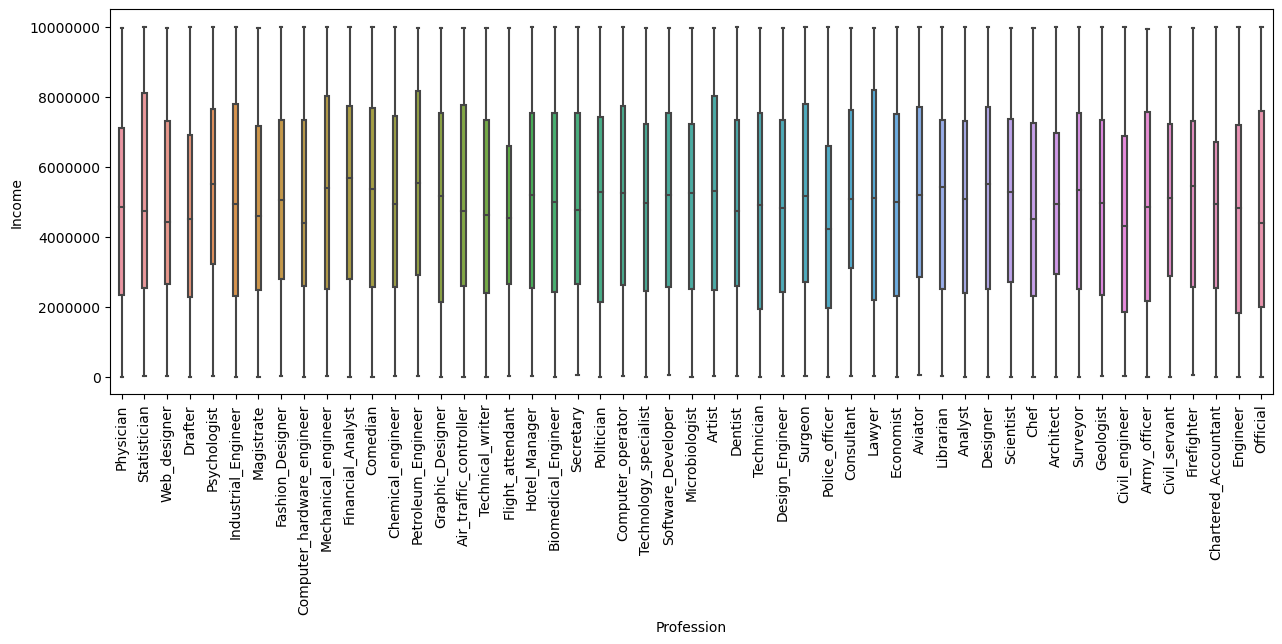

In [42]:
# Mendapatkan urutan label x yang diinginkan
r0_sorted_professions = risk0['Profession'].value_counts().index

# Mengatur urutan label x pada boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='Profession', y='Income', data=risk0, width=0.2, order=r0_sorted_professions)
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', style='plain', useOffset=False) #menghilangkan ie7 pada Y
plt.show()


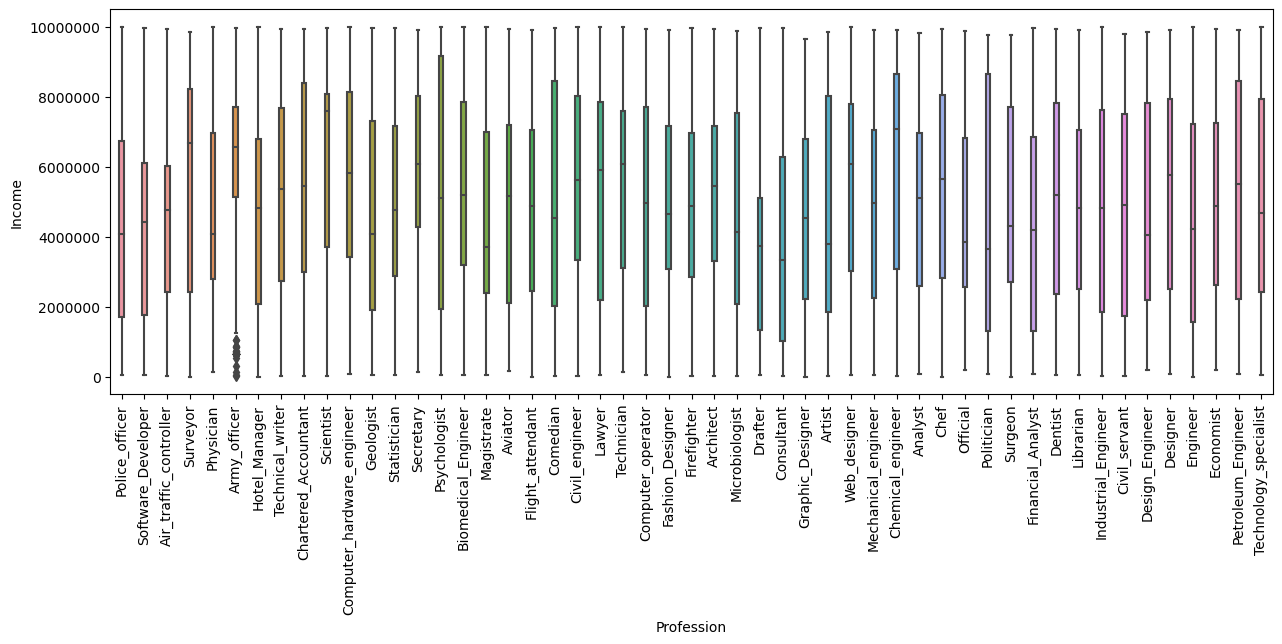

In [43]:
# Mendapatkan urutan label x yang diinginkan
r1_sorted_professions = risk1['Profession'].value_counts().index

# Mengatur urutan label x pada boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='Profession', y='Income', data=risk1, width=0.2, order=r1_sorted_professions)
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', style='plain', useOffset=False) #menghilangkan ie7 pada Y
plt.show()


Karena ditemukan distribusi yang tidak merata pada Income dari tiap-tiap Profession, bahkan ada outlier pada Army_officer, maka perlu dilihat skewnessnya dengan SNS agar lebih detail terhadap Customer Bermasalah.

#### 2. KDEplot Untuk Melihat Skewness dari Customer Bermasalah

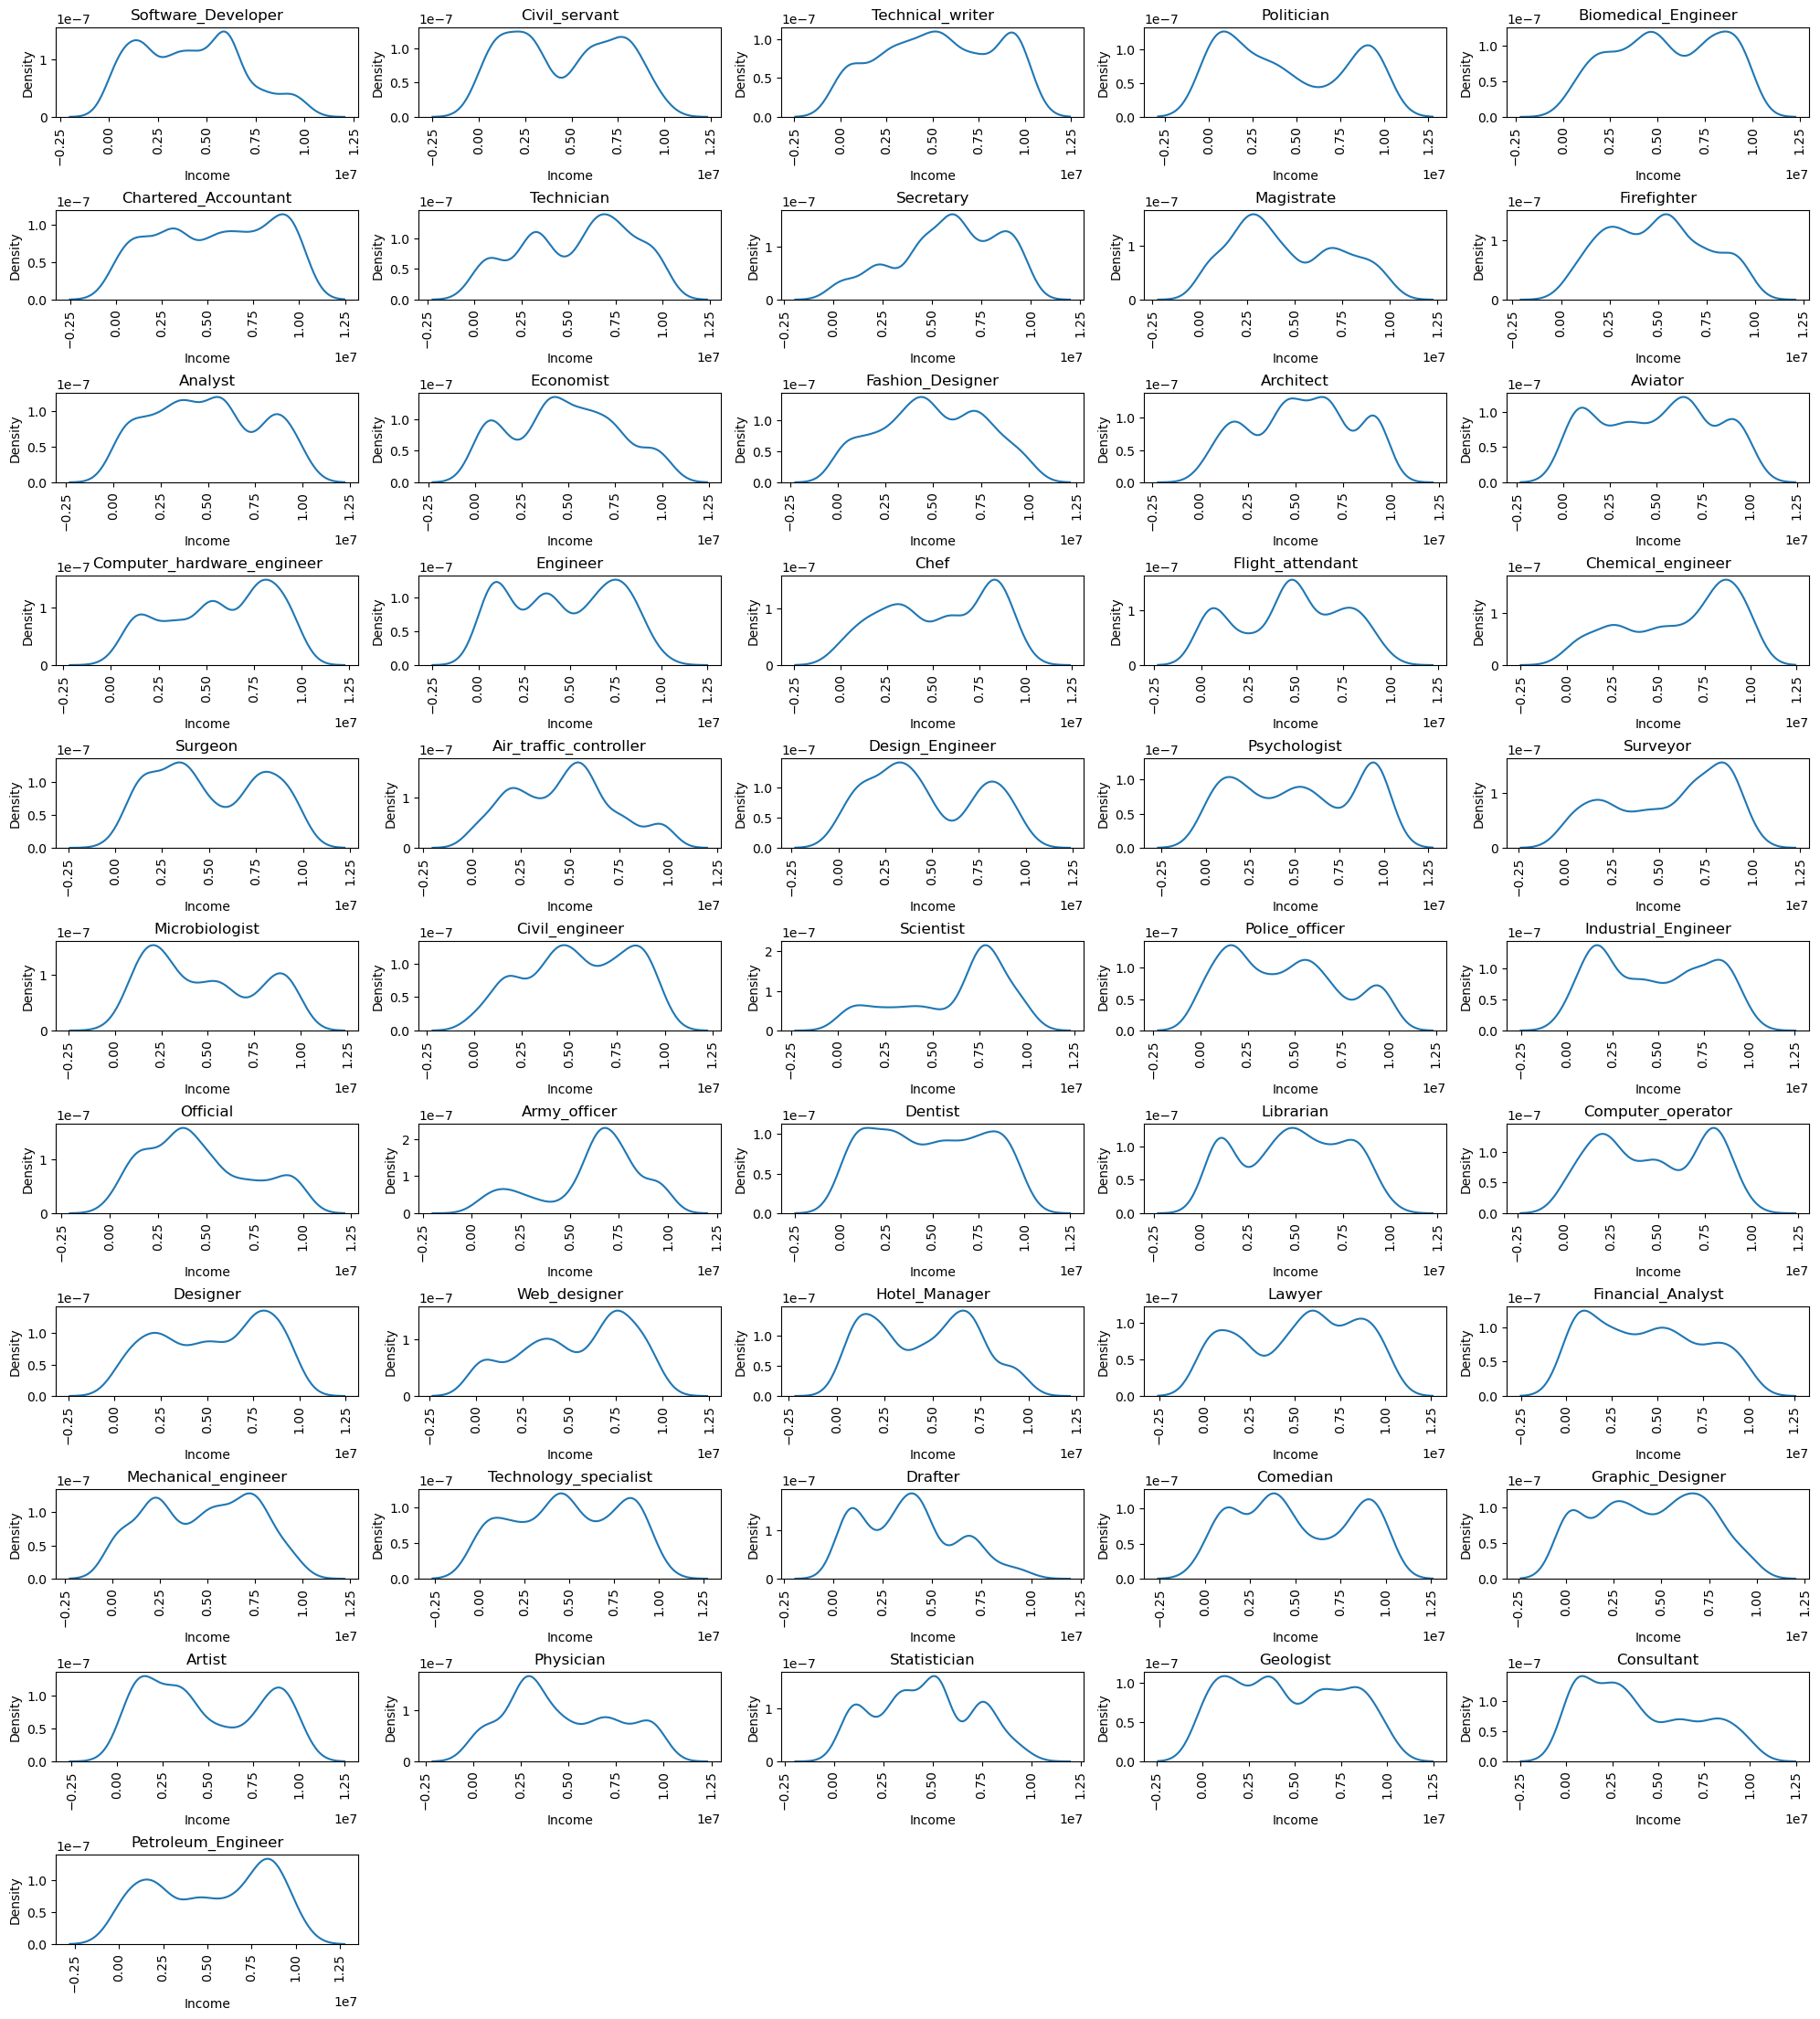

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Mendapatkan daftar unique professions
professions = risk1['Profession'].unique()

# Menghitung jumlah profesion
num_professions = len(professions)

# Menghitung jumlah baris
num_rows = math.ceil(num_professions / 5)

# Mengatur ukuran plot
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 2 * num_rows))

# Loop untuk membuat KDE plot pada setiap profession
for i, profession in enumerate(professions):
    row = i // 5
    col = i % 5
    if num_rows == 1:
        ax = axes[col]
    else:
        ax = axes[row, col]
    sns.kdeplot(data=risk1[risk1['Profession'] == profession], x='Income', ax=ax)
    ax.set_title(profession)
    ax.tick_params(axis='x', rotation=90)

# Menghapus subplot yang tidak digunakan pada baris terakhir jika jumlah profession tidak habis dibagi 5
if num_professions % 5 != 0:
    for j in range(num_professions % 5, 5):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()


#### 3. Mencari Nilai dan Jumlah Outlier Pada Nasabah Bermasalah dengan Transpose & Describe()

In [45]:
# Grouping by 'Profession' and calculating describe for each group
profession_stats = risk1.groupby('Profession')['Income'].describe()

# Calculate IQR
profession_stats['IQR'] = profession_stats['75%'] - profession_stats['25%']
profession_stats['IQR Lower'] = profession_stats['25%'] - 1.5 * profession_stats['IQR']
profession_stats['IQR Upper'] = profession_stats['75%'] + 1.5 * profession_stats['IQR']

# Outliers Confirmation
profession_stats['Outlier Lower'] = profession_stats['min'] < profession_stats['IQR Lower']
profession_stats['Outlier Upper'] = profession_stats['max'] > profession_stats['IQR Upper']

# Transposing the DataFrame to have professions as columns
profession_stats = profession_stats.transpose()

# Printing the statistics for each profession
profession_stats


Profession    Air_traffic_controller     Analyst   Architect Army_officer  \
count                         715.00      567.00      611.00       709.00   
mean                      4654549.55  4921895.34  5331138.42   6143383.92   
std                       2545605.48  2836006.97  2668486.37   2511282.23   
min                         33649.00    91459.00    25096.00     29519.00   
25%                       2442178.00  2607516.00  3317657.50   5129206.00   
50%                       4772948.00  5112098.00  5443970.00   6565653.00   
75%                       6012086.00  6967676.00  7159752.00   7716276.00   
max                       9926392.00  9829121.00  9945192.00   9967074.00   
IQR                       3569908.00  4360160.00  3842094.50   2587070.00   
IQR Lower                -2912684.00 -3932724.00 -2445484.25   1248601.00   
IQR Upper                11366948.00 13507916.00 12922893.75  11596881.00   
Outlier Lower                  False       False       False         True   
Outlier Upper                  False       False       False        False   

Profession         Artist     Aviator Biomedical_Engineer  \
count              596.00      642.00              654.00   
mean           4824664.78  4961315.87          5505449.23   
std            3155833.05  3022659.14          2780635.04   
min              45192.00   189977.00            51974.00   
25%            1871076.00  2111995.25          3205080.00   
50%            3805156.00  5165629.00          5184758.00   
75%            8022038.00  7202230.25          7839236.00   
max            9856035.00  9935192.00          9987812.00   
IQR            6150962.00  5090235.00          4634156.00   
IQR Lower     -7355367.00 -5523357.25         -3746154.00   
IQR Upper     17248481.00 14837582.75         14790470.00   
Outlier Lower       False       False               False   
Outlier Upper       False       False               False   

Profession    Chartered_Accountant        Chef Chemical_engineer  \
count                       690.00      563.00            581.00   
mean                    5401305.66  5308259.09        6183467.90   
std                     3137317.28  2898340.81        3001122.48   
min                       23621.00    15016.00          26926.00   
25%                     3006135.00  2838734.00        3090546.00   
50%                     5468664.00  5642075.00        7077760.00   
75%                     8378553.00  8053436.00        8653449.00   
max                     9922127.00  9935369.00        9914171.00   
IQR                     5372418.00  5214702.00        5562903.00   
IQR Lower              -5052492.00 -4983319.00       -5253808.50   
IQR Upper              16437180.00 15875489.00       16997803.50   
Outlier Lower                False       False             False   
Outlier Upper                False       False             False   

Profession    Civil_engineer Civil_servant    Comedian  \
count                 627.00        511.00      629.00   
mean              5507777.12    4611872.64  5073579.10   
std               2722160.75    2915942.81  3170067.50   
min                 48245.00      24703.00    21831.00   
25%               3338595.00    1743237.00  2024213.00   
50%               5639383.00    4915158.00  4528867.00   
75%               8030284.00    7517375.50  8450190.00   
max               9979065.00    9797863.00  9968362.00   
IQR               4691689.00    5774138.50  6425977.00   
IQR Lower        -3698938.50   -6917970.75 -7614752.50   
IQR Upper        15067817.50   16178583.25 18089155.50   
Outlier Lower          False         False       False   
Outlier Upper          False         False       False   

Profession    Computer_hardware_engineer Computer_operator  Consultant  \
count                             690.00            619.00      602.00   
mean                          5684864.13        4756030.24  3944649.05   
std                           2761473.82        2878335.38  3000298.70   
min 

In [46]:
risk1[(risk1['Profession']=='Army_officer') & (risk1['Income']<= 1248601) ].shape[0]

36

In [47]:
df[(df['Profession']=='Army_officer') & (df['Income']<= 1248601) ].shape[0]

623

#### Kesimpulan insight untuk Army Officer

Pada Data Risk1,  ditemukan outliers bawah pada Army_officer dengan total populasi sebanyak 623 orang dan 36 bermasalah dengan Loan.

### 4.2.b. Analisis Income Terhadap Feature Yang Lain

#### 1. Analisis Resiko Pada Profession dan Income pada Risk1 & df

In [33]:
Profession_stats_df = df.groupby(['Profession', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Profession_stats_df = Profession_stats_df.transpose()

Profession_stats_df


Profession  Air_traffic_controller  Analyst  Architect  Army_officer  Artist  \
Income_cat                                                                     
<2500000                      1298     1189        935          1211    1286   
<5000000                      1469     1097       1443          1030    1012   
<7500000                      1169     1388       1320          1156    1058   
>7500000                      1345      994        959          1264    1505   

Profession  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
Income_cat                                                             
<2500000       1007                 1262                  1099  1190   
<5000000       1276                 1270                  1140  1297   
<7500000       1282                 1240                  1313  1088   
>7500000       1193                 1355                   941  1060   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
Income_cat                                                               
<2500000                 1180            1301            997      1285   
<5000000                 1343            1140           1207      1253   
<7500000                 1273            1157           1179      1224   
>7500000                 1409            1018           1030      1497   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
Income_cat                                                              
<2500000                          1231               1259        1084   
<5000000                          1442               1148        1306   
<7500000                          1310               1180        1135   
>7500000                          1389               1403        1283   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
Income_cat                                                                     
<2500000       1201             1227      1093     1547       1182      1164   
<5000000       1311             1336       910     1488       1146       886   
<7500000       1113             1097      1331     1319       1129      1036   
>7500000       1157             1069      1264     1005       1116       962   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
Income_cat                                                     
<2500000                1179               1261         1098   
<5000000                1451               1148         1029   
<7500000                1569               1321         1412   
>7500000                1105               1437          968   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
Income_cat                                                                 
<2500000                1277       1256              1514           1216   
<5000000                1616       1176              1043           1327   
<7500000                1376       1199              1352           1405   
>7500000                 859       1041              1257           1230   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
Income_cat                                                       
<2500000                   1419    1378       1154        1409   
<5000000                   1230     942        963        1526   
<7500000                   1121    1034       1494        1288   
>7500000                   1480    1464       1017        1134   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
Income_cat                                                                      
<2500000                   1326            1231      1180                1083   
<5000000                   1065            1096      1073                1094   
<7500000                   1302            1543       745                1181   
>7500000                   1524            1011      1089                1683

In [34]:


Profession_stats_1 = risk1.groupby(['Profession', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Profession_stats_1 = Profession_stats_1 .transpose()

Profession_stats_1 


Profession  Air_traffic_controller  Analyst  Architect  Army_officer  Artist  \
Income_cat                                                                     
<2500000                       195      136        127           112     200   
<5000000                       188      143        142            46     139   
<7500000                       228      150        212           329      67   
>7500000                       104      138        130           222     190   

Profession  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
Income_cat                                                             
<2500000        167                  128                   155   121   
<5000000        129                  182                   144   131   
<7500000        209                  133                   178   117   
>7500000        137                  211                   213   194   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
Income_cat                                                               
<2500000                   90             119            143       166   
<5000000                   97             150            114       182   
<7500000                  123             159            126        79   
>7500000                  271             199            128       202   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
Income_cat                                                              
<2500000                           135                192         242   
<5000000                           135                144         156   
<7500000                           176                110          90   
>7500000                           244                173         114   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
Income_cat                                                                     
<2500000        153              130       123      199        111       139   
<5000000        107              191       110      253        141       119   
<7500000        129               53       119      109        133       122   
>7500000        135              132       150       44         69        98   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
Income_cat                                                     
<2500000                 132                195          134   
<5000000                 184                103          187   
<7500000                 180                124          190   
>7500000                 116                111          101   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
Income_cat                                                                 
<2500000                 176        211               194            203   
<5000000                 159        157               133            169   
<7500000                 175        153               171            241   
>7500000                 124        153                98             88   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
Income_cat                                                       
<2500000                    178     187        129         196   
<5000000                     93      86        135         207   
<7500000                    115     159        141         111   
>7500000                    132     192        116         129   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
Income_cat                                                                      
<2500000                    174             177       124                 139   
<5000000                    127             163       215                  69   
<7500000                    168              95       109                  60   
>7500000                    113             172       107                 161

In [35]:
Profession_stats_df_percentage = Profession_stats_1.div(Profession_stats_df, axis=0) * 100

Profession_stats_df_percentage

Profession  Air_traffic_controller  Analyst  Architect  Army_officer  Artist  \
Income_cat                                                                     
<2500000                     15.02    11.44      13.58          9.25   15.55   
<5000000                     12.80    13.04       9.84          4.47   13.74   
<7500000                     19.50    10.81      16.06         28.46    6.33   
>7500000                      7.73    13.88      13.56         17.56   12.62   

Profession  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
Income_cat                                                             
<2500000      16.58                10.14                 14.10 10.17   
<5000000      10.11                14.33                 12.63 10.10   
<7500000      16.30                10.73                 13.56 10.75   
>7500000      11.48                15.57                 22.64 18.30   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
Income_cat                                                               
<2500000                 7.63            9.15          14.34     12.92   
<5000000                 7.22           13.16           9.44     14.53   
<7500000                 9.66           13.74          10.69      6.45   
>7500000                19.23           19.55          12.43     13.49   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
Income_cat                                                              
<2500000                         10.97              15.25       22.32   
<5000000                          9.36              12.54       11.94   
<7500000                         13.44               9.32        7.93   
>7500000                         17.57              12.33        8.89   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
Income_cat                                                                     
<2500000      12.74            10.59     11.25    12.86       9.39     11.94   
<5000000       8.16            14.30     12.09    17.00      12.30     13.43   
<7500000      11.59             4.83      8.94     8.26      11.78     11.78   
>7500000      11.67            12.35     11.87     4.38       6.18     10.19   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
Income_cat                                                     
<2500000               11.20              15.46        12.20   
<5000000               12.68               8.97        18.17   
<7500000               11.47               9.39        13.46   
>7500000               10.50               7.72        10.43   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
Income_cat                                                                 
<2500000               13.78      16.80             12.81          16.69   
<5000000                9.84      13.35             12.75          12.74   
<7500000               12.72      12.76             12.65          17.15   
>7500000               14.44      14.70              7.80           7.15   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
Income_cat                                                       
<2500000                  12.54   13.57      11.18       13.91   
<5000000                   7.56    9.13      14.02       13.56   
<7500000                  10.26   15.38       9.44        8.62   
>7500000                   8.92   13.11      11.41       11.38   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
Income_cat                                                                      
<2500000                  13.12           14.38     10.51               12.83   
<5000000                  11.92           14.87     20.04                6.31   
<7500000                  12.90            6.16     14.63                5.08   
>7500000                   7.41           17.01      9.83                9.57

In [36]:
# Filter the values below 5% using a boolean mask
Profession_below_10_percent = Profession_stats_df_percentage[Profession_stats_df_percentage < 10]

Profession_below_10_percent = Profession_below_10_percent.reset_index()
Profession_below_10_percent

Profession Income_cat  Air_traffic_controller  Analyst  Architect  \
0            <2500000                     NaN      NaN        NaN   
1            <5000000                     NaN      NaN       9.84   
2            <7500000                     NaN      NaN        NaN   
3            >7500000                    7.73      NaN        NaN   

Profession  Army_officer  Artist  Aviator  Biomedical_Engineer  \
0                   9.25     NaN      NaN                  NaN   
1                   4.47     NaN      NaN                  NaN   
2                    NaN    6.33      NaN                  NaN   
3                    NaN     NaN      NaN                  NaN   

Profession  Chartered_Accountant  Chef  Chemical_engineer  Civil_engineer  \
0                            NaN   NaN               7.63            9.15   
1                            NaN   NaN               7.22             NaN   
2                            NaN   NaN               9.66             NaN   
3                            NaN   NaN                NaN             NaN   

Profession  Civil_servant  Comedian  Computer_hardware_engineer  \
0                     NaN       NaN                         NaN   
1                    9.44       NaN                        9.36   
2                     NaN      6.45                         NaN   
3                     NaN       NaN                         NaN   

Profession  Computer_operator  Consultant  Dentist  Design_Engineer  Designer  \
0                         NaN         NaN      NaN              NaN       NaN   
1                         NaN         NaN     8.16              NaN       NaN   
2                        9.32        7.93      NaN             4.83      8.94   
3                         NaN        8.89      NaN              NaN       NaN   

Profession  Drafter  Economist  Engineer  Fashion_Designer  Financial_Analyst  \
0               NaN       9.39       NaN               NaN                NaN   
1               NaN        NaN       NaN               NaN               8.97   
2              8.26        NaN       NaN               NaN               9.39   
3              4.38       6.18       NaN               NaN               7.72   

Profession  Firefighter  Flight_attendant  Geologist  Graphic_Designer  \
0                   NaN               NaN        NaN               NaN   
1                   NaN              9.84        NaN               NaN   
2                   NaN               NaN        NaN               NaN   
3                   NaN               NaN        NaN              7.80   

Profession  Hotel_Manager  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
0                     NaN                  NaN     NaN        NaN         NaN   
1                     NaN                 7.56    9.13        NaN         NaN   
2                     NaN                  NaN     NaN       9.44        8.62   
3                    7.15                 8.92     NaN        NaN         NaN   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
0                           NaN             NaN       NaN                 NaN   
1                           NaN             NaN       NaN                6.31   
2                           NaN            6.16       NaN                5.08   
3                          7.41             NaN      9.83                9.57   

Profession  Physician  Police_officer  Politician  Psychologist  Scientist  \
0                 NaN             NaN         NaN           NaN        NaN   
1                 NaN             NaN         NaN          8.17       9.69   
2                9.39             NaN        3.96          9.42       9.62   
3                 NaN             NaN         NaN           NaN        NaN   

Profession  Secretary  Software_Developer  Statistician  Surgeon  Surveyor  \
0                8.48                 NaN           NaN      NaN       NaN   
1                9.66                 NaN           NaN    

In [184]:
Profession_below_10_percent.reset_index()

Profession  index Income_cat  Air_traffic_controller  Analyst  Architect  \
0               0   <2500000                     NaN      NaN        NaN   
1               1   <5000000                     NaN      NaN       9.84   
2               2   <7500000                     NaN      NaN        NaN   
3               3   >7500000                    7.73      NaN        NaN   

Profession  Army_officer  Artist  Aviator  Biomedical_Engineer  \
0                   9.25     NaN      NaN                  NaN   
1                   4.47     NaN      NaN                  NaN   
2                    NaN    6.33      NaN                  NaN   
3                    NaN     NaN      NaN                  NaN   

Profession  Chartered_Accountant  Chef  Chemical_engineer  Civil_engineer  \
0                            NaN   NaN               7.63            9.15   
1                            NaN   NaN               7.22             NaN   
2                            NaN   NaN               9.66             NaN   
3                            NaN   NaN                NaN             NaN   

Profession  Civil_servant  Comedian  Computer_hardware_engineer  \
0                     NaN       NaN                         NaN   
1                    9.44       NaN                        9.36   
2                     NaN      6.45                         NaN   
3                     NaN       NaN                         NaN   

Profession  Computer_operator  Consultant  Dentist  Design_Engineer  Designer  \
0                         NaN         NaN      NaN              NaN       NaN   
1                         NaN         NaN     8.16              NaN       NaN   
2                        9.32        7.93      NaN             4.83      8.94   
3                         NaN        8.89      NaN              NaN       NaN   

Profession  Drafter  Economist  Engineer  Fashion_Designer  Financial_Analyst  \
0               NaN       9.39       NaN               NaN                NaN   
1               NaN        NaN       NaN               NaN               8.97   
2              8.26        NaN       NaN               NaN               9.39   
3              4.38       6.18       NaN               NaN               7.72   

Profession  Firefighter  Flight_attendant  Geologist  Graphic_Designer  \
0                   NaN               NaN        NaN               NaN   
1                   NaN              9.84        NaN               NaN   
2                   NaN               NaN        NaN               NaN   
3                   NaN               NaN        NaN              7.80   

Profession  Hotel_Manager  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
0                     NaN                  NaN     NaN        NaN         NaN   
1                     NaN                 7.56    9.13        NaN         NaN   
2                     NaN                  NaN     NaN       9.44        8.62   
3                    7.15                 8.92     NaN        NaN         NaN   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
0                           NaN             NaN       NaN                 NaN   
1                           NaN             NaN       NaN                6.31   
2                           NaN            6.16       NaN                5.08   
3                          7.41             NaN      9.83                9.57   

Profession  Physician  Police_officer  Politician  Psychologist  Scientist  \
0                 NaN             NaN         NaN           NaN        NaN   
1                 NaN             NaN         NaN          8.17       9.69   
2                9.39             NaN        3.96          9.42       9.62   
3                 NaN             NaN         NaN           NaN        NaN   

Profession  Secretary  Software_Developer  Statistician  Surgeon  Surveyor  \
0                8.48                 NaN           NaN      NaN       NaN   
1                9.66   

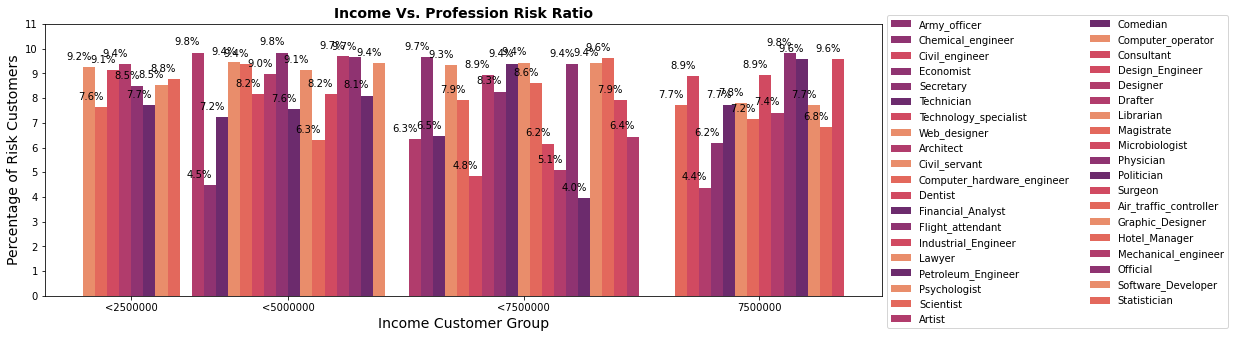

In [202]:
lol = Profession_below_10_percent.reset_index()
lol = lol.drop(['Income_cat'], axis=1)
fig, axc = plt.subplots(figsize=(15,5))
ax = plt.gca()
# width of bars
width = 1
x_ticks, x_ticks_pos = [], []
income_cat = ['<2500000', '<5000000', '<7500000', '7500000']
# counter for helping with x tick positions
count = 0
# go through each row of the dataframe
for idx, row in lol.iterrows():
    # this will be the first bar position for this row
    count += idx

    # this will be the start of the first bar for this row
    start_idx = count - width / 2
    # this will be the end of the last bar for this row
    end_idx = start_idx
    # for each column in the wanted columns,
    # if the row is not null,
    # add the bar to the plot
    # also update the end position of the bars for this row
    colors = sns.color_palette("flare")
    for column in lol.drop(["index"], axis=1).columns:
        if row[column] == row[column]:
            plot = plt.bar(count, row[column], width=width, label=column, color=colors[count % len(colors)])
            count += 1
            end_idx += width
            for p in plot.patches:
                x = p.get_x()+0.7
                z = p.get_height()+0.3
                label = '{:.1f}%'.format(p.get_height())
                plt.annotate(label, (x, z),ha='right', fontsize=10)
    # this checks if the row had any not NULL value in the desired columns
    # in other words, it checks if there was any bar for this row
    # if yes, add the center of all the row's bars and the row's name (A,B,C) to the respective lists
    if end_idx != start_idx:
        x_ticks_pos.append((end_idx + start_idx) / 2)
        x_ticks.append(row["index"])


plt.xticks(x_ticks_pos, income_cat)
plt.yticks(range(0,12,1),[str(i) for i in range(0,12,1)])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2,  bbox_to_anchor=(1, 1.05))
plt.xlabel('Income Customer Group', fontsize=14)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Income Vs. Profession Risk Ratio', fontweight="bold", fontsize=14)
#Label tiap category
plt.show()

In [37]:
# menyiapkan percentage untuk angka chart

p10 = Profession_stats_df_percentage
p10 = p10.T.reset_index()
p10.head()

Income_cat              Profession  <2500000  <5000000  <7500000  >7500000
0           Air_traffic_controller     15.02     12.80     19.50      7.73
1                          Analyst     11.44     13.04     10.81     13.88
2                        Architect     13.58      9.84     16.06     13.56
3                     Army_officer      9.25      4.47     28.46     17.56
4                           Artist     15.55     13.74      6.33     12.62

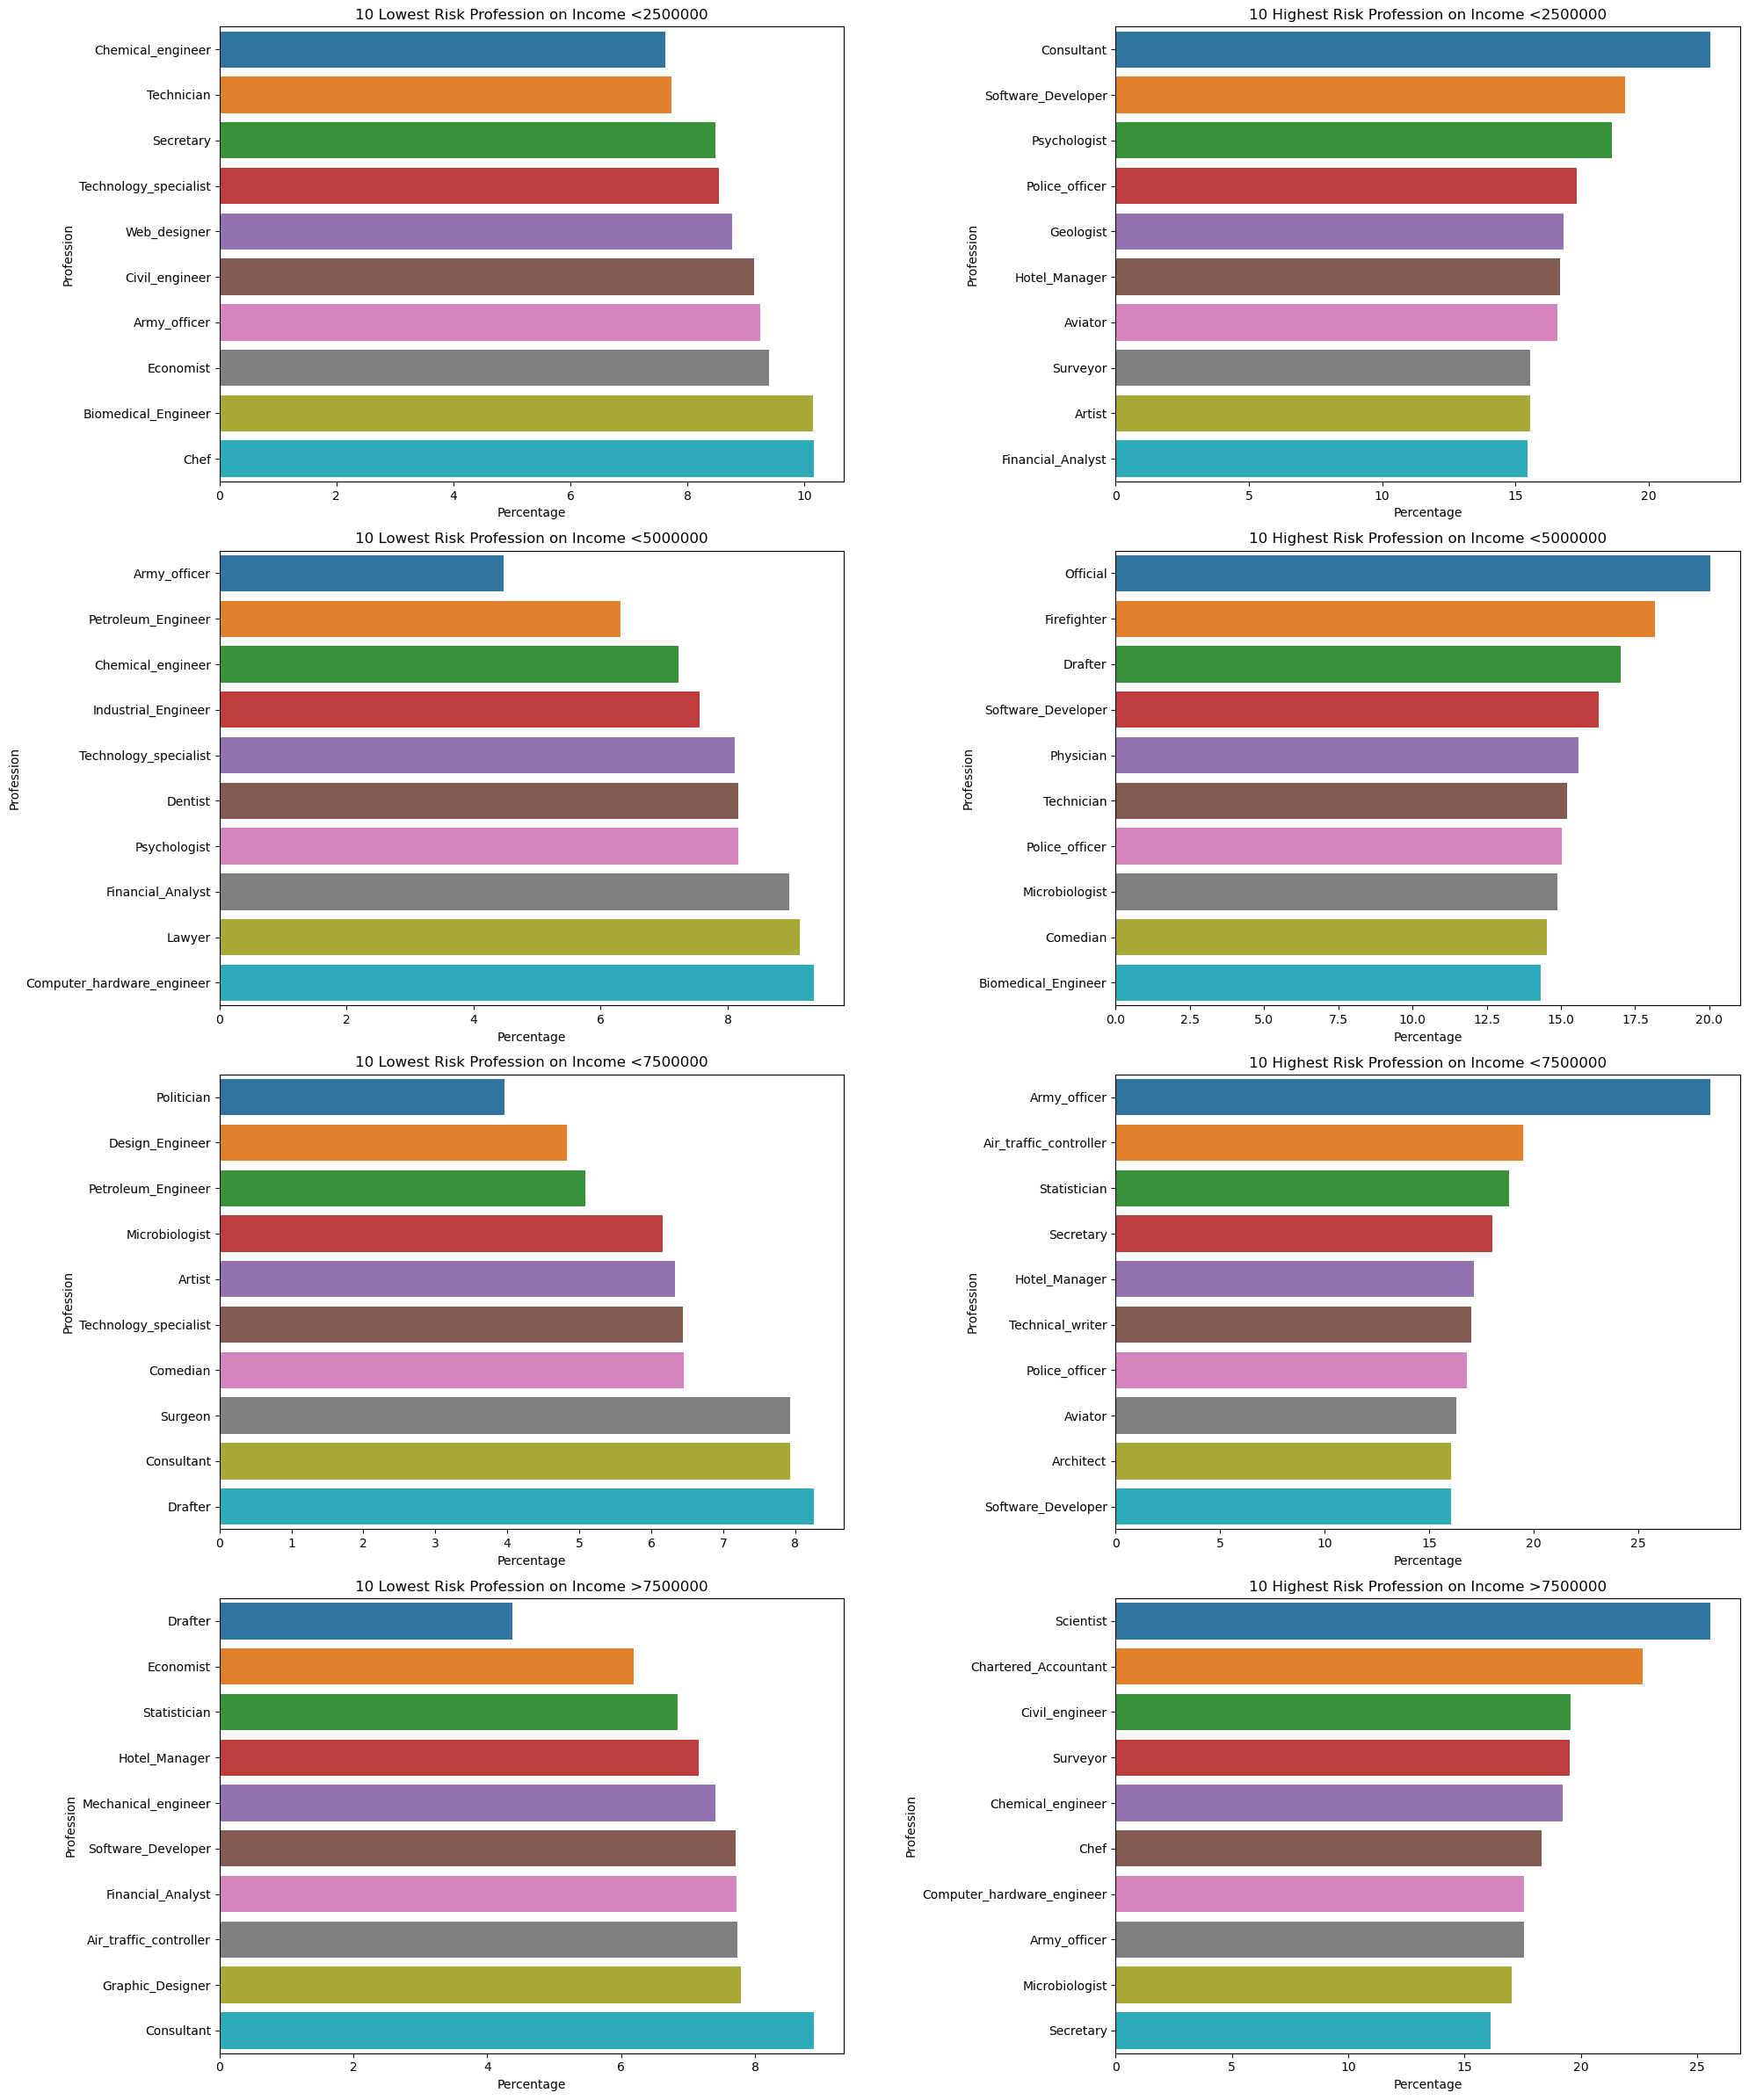

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of income categories
income_categories = ['<2500000', '<5000000', '<7500000', '>7500000']

# Create a figure to hold the subplots
plt.figure(figsize=(20, 6 * len(income_categories)))

# Iterate through the income categories
for i, income_category in enumerate(income_categories):
    # Get the data for the current income category
    data = p10[p10[income_category] > 0].head(10)
    low = p10[p10[income_category] > 0].sort_values(by=income_category, ascending=True).head(10)
    high = p10[p10[income_category] > 0].sort_values(by=income_category, ascending=False).head(10)
    
    # Create the subplot
    plt.subplot(len(income_categories), 2, 2 * i + 1)
    sns.barplot(x=income_category, y='Profession', data=low)
    
    #  # Add percentages to the bars
    # for index, value in enumerate(data[income_category]):
    #      plt.text(value, index, f'{value:.0f}%', fontsize=10, color='black')
    
    plt.title(f'10 Lowest Risk Profession on Income {income_category}')
    plt.xlabel('Percentage')
    plt.ylabel('Profession')

    # Create the second subplot for the highest risk chart
    plt.subplot(len(income_categories), 2, 2 * i + 2)
    sns.barplot(x=income_category, y='Profession', data=high)

    # Add percentages to the bars in the second subplot
    # for index, value in enumerate(data[income_category]):
    #     plt.text(value, index, f'{value:.2f}%', fontsize=10, color='white')

    plt.title(f'10 Highest Risk Profession on Income {income_category}')
    plt.xlabel('Percentage')
    plt.ylabel('Profession')

# Adjust the layout to avoid overlapping and add more space between subplots
plt.tight_layout(w_pad=5.0)

# Show the combined plot
plt.show()


In [54]:
#Checking Function

p10a = p10[p10['<2500000'] > 0 ].sort_values(by='<2500000', ascending=True).head(5)
p10a

Income_cat             Profession  <2500000  <5000000  <7500000  >7500000
9               Chemical_engineer      7.63      7.22      9.66     19.23
48                     Technician      7.73     15.20     14.71     14.34
42                      Secretary      8.48      9.66     18.02     16.11
49          Technology_specialist      8.54      8.11      6.44      9.58
50                   Web_designer      8.76      9.43     13.35     12.39

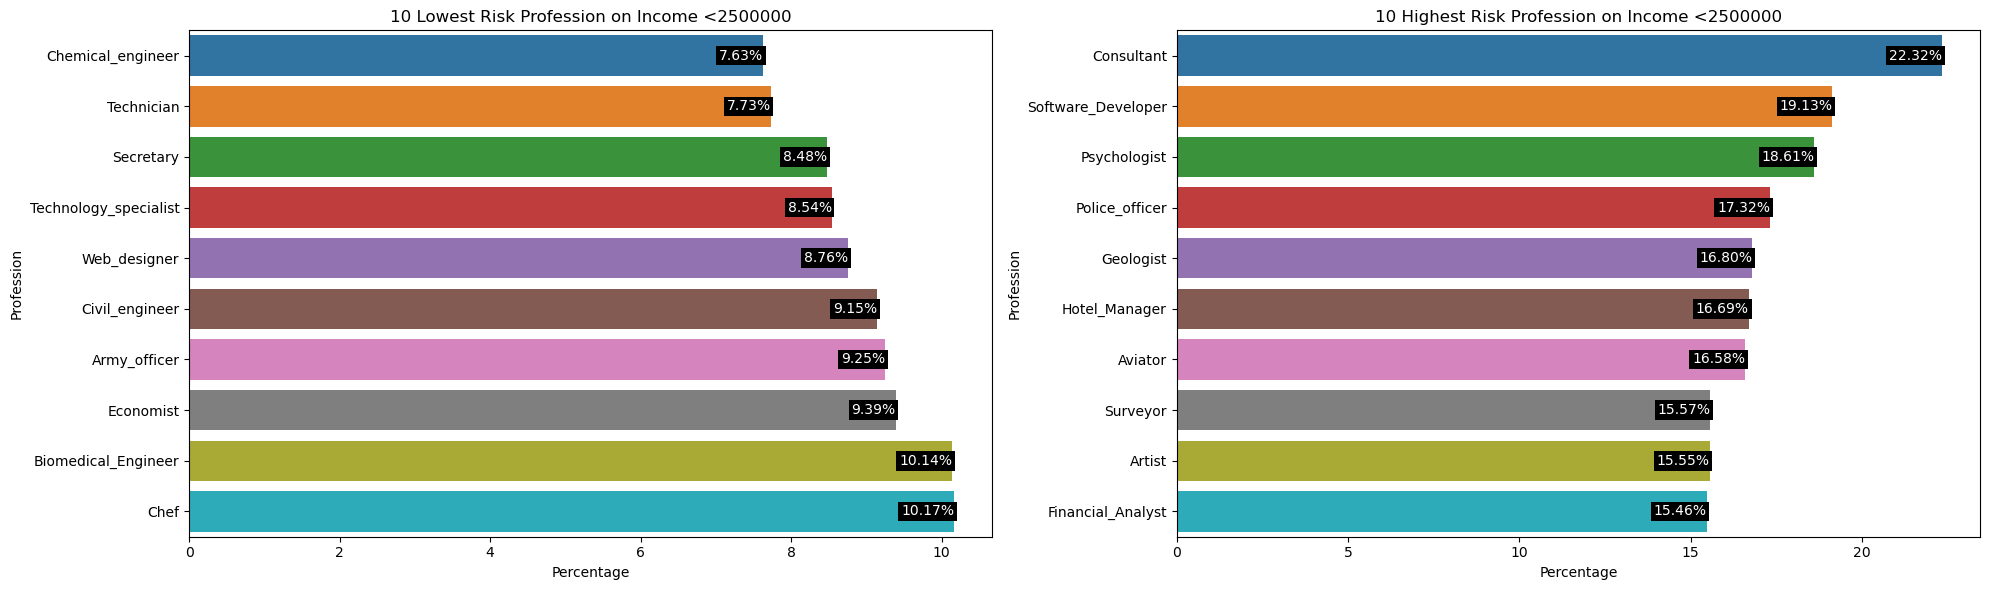

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

a = '<2500000'

plt.figure(figsize=(20, 6))
# 10 Lowest Risk Profession under '>5,000,000' of income
p10a_low = p10[p10[a] > 0].sort_values(by=a, ascending=True).head(10)

# Create the subplot
plt.subplot(1, 2, 1)
sns.barplot(x=a, y='Profession', data=p10a_low)

# Add percentages to the bars
for index, value in enumerate(p10a_low[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'10 Lowest Risk Profession on Income {a}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# 10 Highest Risk Profession under '>5,000,000' of income
p10a_high = p10[p10[a] > 0].sort_values(by=a, ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x=a, y='Profession', data=p10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(p10a_high[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'10 Highest Risk Profession on Income {a}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


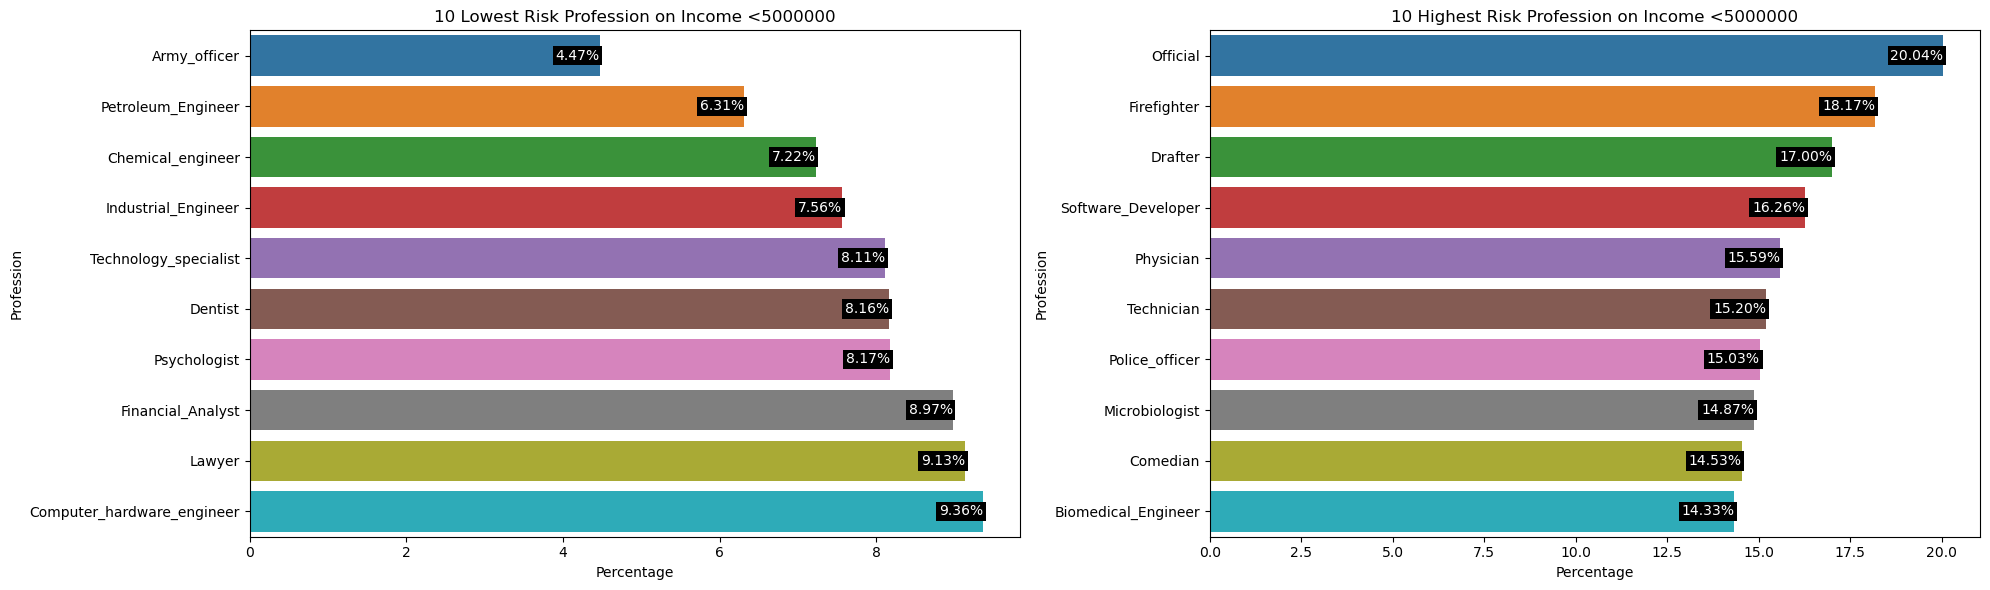

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

a = '<5000000'

plt.figure(figsize=(20, 6))
# 10 Lowest Risk Profession under '>5,000,000' of income
p10a_low = p10[p10[a] > 0].sort_values(by=a, ascending=True).head(10)

# Create the subplot
plt.subplot(1, 2, 1)
sns.barplot(x=a, y='Profession', data=p10a_low)

# Add percentages to the bars
for index, value in enumerate(p10a_low[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'10 Lowest Risk Profession on Income {a}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# 10 Highest Risk Profession under '>5,000,000' of income
p10a_high = p10[p10[a] > 0].sort_values(by=a, ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x=a, y='Profession', data=p10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(p10a_high[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'10 Highest Risk Profession on Income {a}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


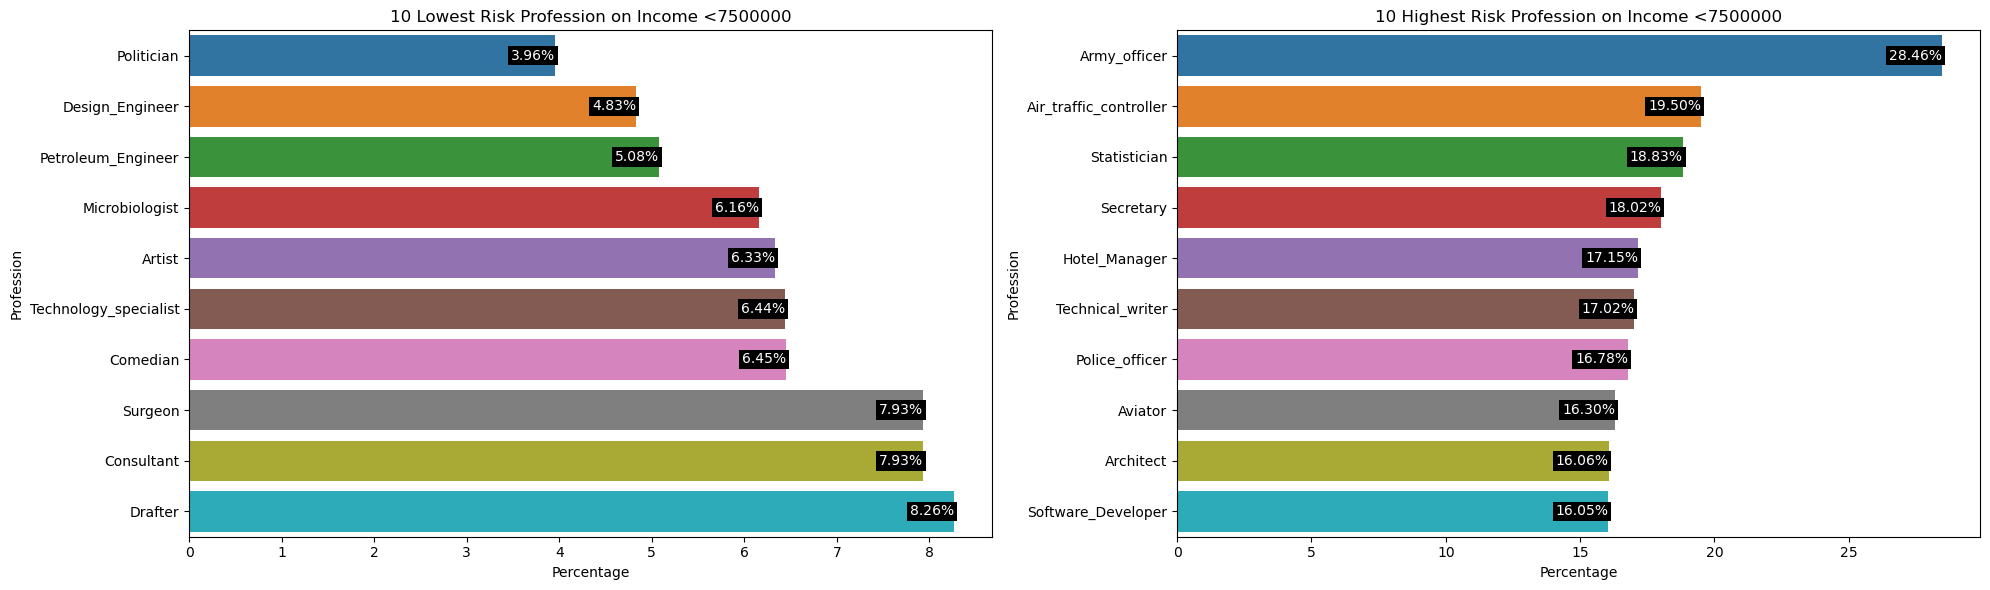

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

a = '<7500000'

plt.figure(figsize=(20, 6))
# 10 Lowest Risk Profession under '>5,000,000' of income
p10a_low = p10[p10[a] > 0].sort_values(by=a, ascending=True).head(10)

# Create the subplot
plt.subplot(1, 2, 1)
sns.barplot(x=a, y='Profession', data=p10a_low)

# Add percentages to the bars
for index, value in enumerate(p10a_low[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'10 Lowest Risk Profession on Income {a}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# 10 Highest Risk Profession under '>5,000,000' of income
p10a_high = p10[p10[a] > 0].sort_values(by=a, ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x=a, y='Profession', data=p10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(p10a_high[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'10 Highest Risk Profession on Income {a}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


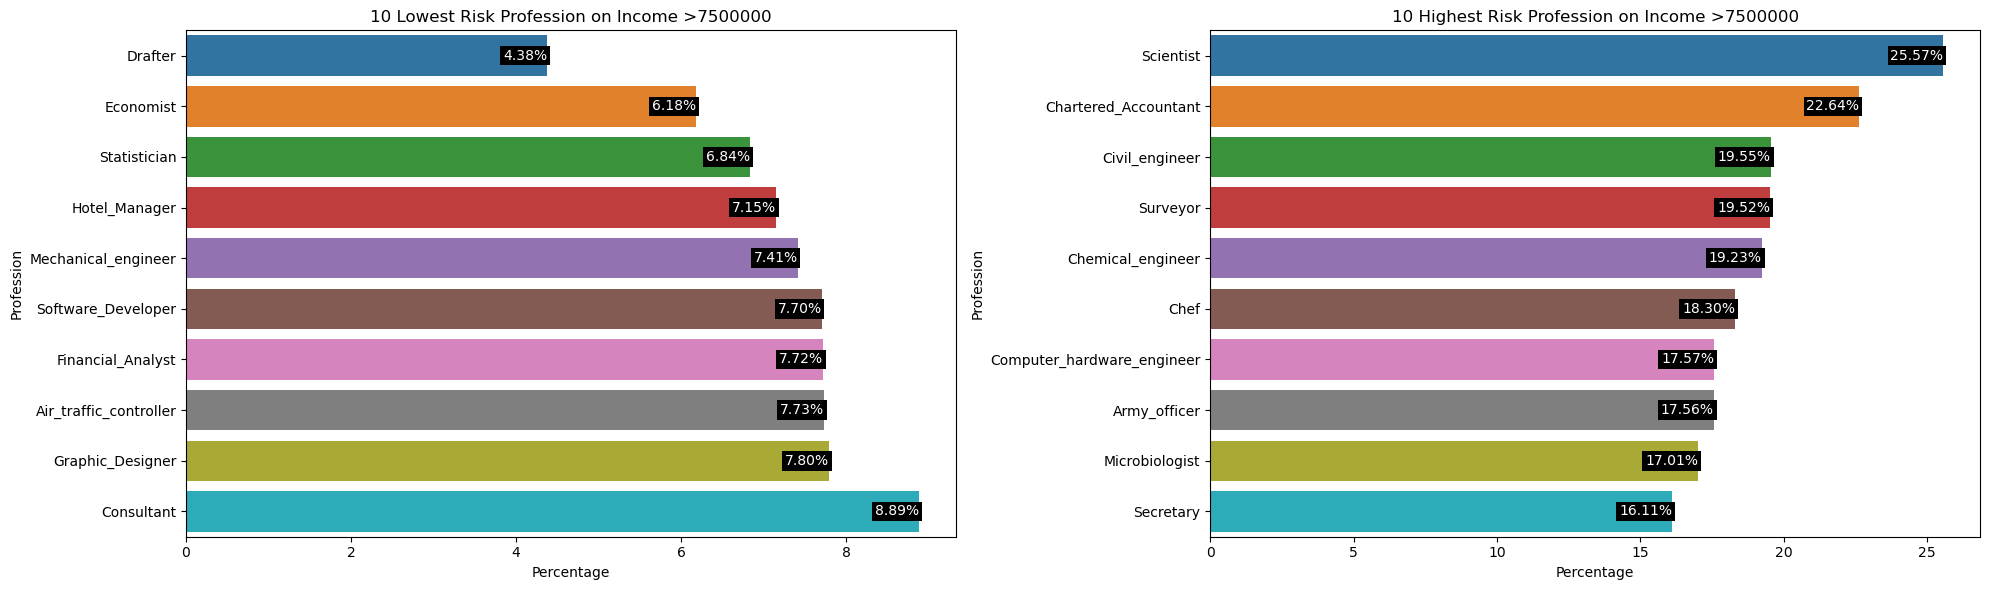

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

a = '>7500000'

plt.figure(figsize=(20, 6))
# 10 Lowest Risk Profession under '>5,000,000' of income
p10a_low = p10[p10[a] > 0].sort_values(by=a, ascending=True).head(10)

# Create the subplot
plt.subplot(1, 2, 1)
sns.barplot(x=a, y='Profession', data=p10a_low)

# Add percentages to the bars
for index, value in enumerate(p10a_low[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'10 Lowest Risk Profession on Income {a}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# 10 Highest Risk Profession under '>5,000,000' of income
p10a_high = p10[p10[a] > 0].sort_values(by=a, ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x=a, y='Profession', data=p10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(p10a_high[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'10 Highest Risk Profession on Income {a}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


#### Kesimpulan Analisa Profession Terhadap Income Pada Customer Bermasalah
1. Pada rentang income dibawah 2500000 : terendah adalah Chemical Engineer 7,63%, tertinggi adalah Consultant (22.32)
2. Pada rentang income 5000000 - 7500000 : terendah adalah Army_officer (4,47%), tertinggi adalah Official(20,04%)
3. Pada rentang income 5000000 - 7500000 : terendah adalah Politician (3,96), tertinggi adalah Army_officer (28,46%)
4. Pada rentang income 5000000 - 7500000 : terendah adalah Drafter (4.38%), tertinggi adalah Scientist (25,57%)

##### 1.a. Army Officer Bermasalah

In [58]:
risk1[(risk1['Profession'] == 'Army_officer') & (risk1['Income'] <= 1248601)].describe(include=object)

Married/Single House_Ownership Car_Ownership    Profession       City  \
count              36              36            36            36         36   
unique              2               2             2             1         14   
top            single          rented            no  Army_officer  Siwan[32]   
freq               34              35            34            36         22   

        State Job_Duration_cat Experience_cat Income_cat Age_cat  
count      36               36             36         36      36  
unique     10                3              4          1       4  
top     Bihar            10-14            >15   <2500000   65-79  
freq       23               25             25         36      25

In [59]:
risk1[(risk1['Profession'] == 'Army_officer') & (risk1['Income'] <= 1248601)].describe()

Id     Income   Age  Experience  Current_Job_Yrs  \
count     36.00      36.00 36.00       36.00            36.00   
mean  143658.69  652896.25 63.89       13.42            10.56   
std    90209.02  213755.86 12.52        5.49             4.95   
min     3122.00   29519.00 24.00        0.00             0.00   
25%    59769.75  670260.00 60.75       15.00             6.00   
50%   162363.00  670260.00 70.00       16.00            14.00   
75%   230710.75  676329.00 70.00       16.00            14.00   
max   249451.00 1059560.00 79.00       19.00            14.00   

       Current_House_Yrs  Risk_Flag  
count              36.00      36.00  
mean               13.08       1.00  
std                 1.38       0.00  
min                10.00       1.00  
25%                12.75       1.00  
50%                14.00       1.00  
75%                14.00       1.00  
max                14.00       1.00

In [332]:
army_outliers = pd.DataFrame(risk1[(risk1['Profession'] == 'Army_officer') & (risk1['Income'] <= 1248601)].sort_values(by='Age_cat', ascending=False)) #mencari jumlah outlier dengan menggunakan angka IQR Lower 1248601

In [335]:
army_outliers.describe(include=object)

Married/Single House_Ownership Car_Ownership    Profession       City  \
count              36              36            36            36         36   
unique              2               2             2             1         14   
top            single          rented            no  Army_officer  Siwan[32]   
freq               34              35            34            36         22   

        State Job_Duration_cat Experience_cat Income_cat Age_cat  
count      36               36             36         36      36  
unique     10                3              4          1       4  
top     Bihar            10-14            >15   <2500000   65-79  
freq       23               25             25         36      25

In [61]:
ao4 = risk1[(risk1['Profession'] == 'Army_officer') & (risk1['Income'] <= 1248601) & (risk1['Age_cat'] == '65-79')].shape[0]
ao3 = risk1[(risk1['Profession'] == 'Army_officer') & (risk1['Income'] <= 1248601) & (risk1['Age_cat'] == '50-64')].shape[0]
ao2 = risk1[(risk1['Profession'] == 'Army_officer') & (risk1['Income'] <= 1248601) & (risk1['Age_cat'] == '35-49')].shape[0]
ao1 = risk1[(risk1['Profession'] == 'Army_officer') & (risk1['Income'] <= 1248601) & (risk1['Age_cat'] == '21-34')].shape[0]


print(f'Pada Army Officer, terdapat {ao4} customer bermasalah pada rentang umur 66-79 dan {ao3} orang pada rentang 50-65. Sedangkan pada rentang 21-34 & 35-49 masing-masing {ao1} & {ao2}')


Pada Army Officer, terdapat 25 customer bermasalah pada rentang umur 66-79 dan 7 orang pada rentang 50-65. Sedangkan pada rentang 21-34 & 35-49 masing-masing 2 & 2


In [62]:
aod = risk0[(risk0['Profession'] == 'Army_officer') & (risk0['Income'] <= 1248601) & (risk0['Age_cat'] == '65-79')].shape[0]
aoc = risk0[(risk0['Profession'] == 'Army_officer') & (risk0['Income'] <= 1248601) & (risk0['Age_cat'] == '50-64')].shape[0]
aob = risk0[(risk0['Profession'] == 'Army_officer') & (risk0['Income'] <= 1248601) & (risk0['Age_cat'] == '35-49')].shape[0]
aoa = risk0[(risk0['Profession'] == 'Army_officer') & (risk0['Income'] <= 1248601) & (risk0['Age_cat'] == '21-34')].shape[0]


print(f'Pada Army Officer, terdapat {aod} customer lancar pada rentang umur 66-79 dan {aoc} orang pada rentang 50-65. Sedangkan pada rentang 21-34 & 35-49 masing-masing {aoa} & {aob}')


Pada Army Officer, terdapat 209 customer lancar pada rentang umur 66-79 dan 91 orang pada rentang 50-65. Sedangkan pada rentang 21-34 & 35-49 masing-masing 241 & 46


##### 1.b. Kesimpulan Terhadap Army Officer

Diperoleh kesimpulan bahwa, pensiunan Army_officer berumur 66-79 tahun atau yang memiliki income dibawah 2.500.000 dan mayoritas tinggal di City Siwan[32] dan State Bihar memiliki masalah dalam pembayaran pinjaman

#### 2. Analisis Resiko Pada City dan Income

In [188]:
City_stats_df = df.groupby(['City', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
City_stats_df = City_stats_df.transpose()

City_stats_df

City        Adoni  Agartala  Agra  Ahmedabad  Ahmednagar  Aizawl  Ajmer  \
Income_cat                                                                
<2500000      143       249   398         98         168     210    134   
<5000000      318       173   261        239         201     209    175   
<7500000      286       137   178        129          73     274    344   
>7500000      206       250   175        183         203     156    176   

City        Akola  Alappuzha  Aligarh  Allahabad  Alwar  Amaravati  Ambala  \
Income_cat                                                                   
<2500000      175        168      241        300    211        132     213   
<5000000      166        352      243        139    208        222     170   
<7500000      239         24      171        208    213        270     217   
>7500000      187        144      203         96    161        216     176   

City        Ambarnath  Ambattur  Amravati  Amritsar  Amroha  Anand  Anantapur  \
Income_cat                                                                      
<2500000          198       313        65       133     243    100         98   
<5000000          203       168       276       313     329    159        202   
<7500000          244       209        91       185     206    335        133   
>7500000          238       241       328        99     137    312        146   

City        Anantapuram[24]  Arrah  Asansol  Aurangabad  Aurangabad[39]  \
Income_cat                                                                
<2500000                209    356      250         174             167   
<5000000                258    171       32         198             172   
<7500000                352    247      174         176             204   
>7500000                175    202      201         287             165   

City        Avadi  Bahraich  Ballia  Bally  Bangalore  Baranagar  Barasat  \
Income_cat                                                                  
<2500000      109       174     318    244        142        135      173   
<5000000      135       268     204    169        173        313      176   
<7500000       62       290     135     31        278        283      246   
>7500000      361       238     173    237        134        204      268   

City        Bardhaman  Bareilly  Bathinda  Begusarai  Belgaum  Bellary  \
Income_cat                                                               
<2500000          141       251       316        135      104      248   
<5000000           92       249       141        205      207      319   
<7500000          286       435       267        239      354      170   
>7500000          170       101       120        166      127      328   

City        Berhampore  Berhampur  Bettiah[33]  Bhagalpur  \
Income_cat                                                  
<2500000           325        129          126        236   
<5000000           127        147          168        134   
<7500000           133         94           95        179   
>7500000           205        243           68        289   

City        Bhalswa_Jahangir_Pur  Bharatpur  Bhatpara  Bhavnagar  Bhilai  \
Income_cat                                                                 
<2500000                     455        320       211        204     200   
<5000000                      70        102       391        363     144   
<7500000                     148        173       176         64     277   
>7500000                     278        271        82        252     276   

City        Bhilwara  Bhimavaram  Bhind  Bhiwandi  Bhiwani  Bhopal  \
Income_cat                                                           
<2500000         124         210    178       103      403     282   
<5000000         174         140    171       102      100     326   
<7500000         220         137    209       129      166     287   
>7500000         239         119    175       321      101  

In [189]:
City_stats_1 = risk1.groupby(['City', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
City_stats_1 = City_stats_1.transpose()

City_stats_1

City        Adoni  Agartala  Agra  Ahmedabad  Ahmednagar  Aizawl  Ajmer  \
Income_cat                                                                
<2500000        9        46     9         34           3       4     31   
<5000000       16        23    28         47           5      26      8   
<7500000        7        31    38          4          25      60     46   
>7500000       71        36     6         48           5       4     30   

City        Akola  Alappuzha  Aligarh  Allahabad  Alwar  Amaravati  Ambala  \
Income_cat                                                                   
<2500000       45          3        7         12     47         24      33   
<5000000        7         33       43         26     44          9      28   
<7500000        6          4       40         29      6         11      24   
>7500000       10         50       14         30      7         10      33   

City        Ambarnath  Ambattur  Amravati  Amritsar  Amroha  Anand  Anantapur  \
Income_cat                                                                      
<2500000           21        39        18         4      27      3          8   
<5000000           22        18        32        29      23     49          6   
<7500000           58        19         7         7       4     19         27   
>7500000            6        36        66         7       7     23          7   

City        Anantapuram[24]  Arrah  Asansol  Aurangabad  Aurangabad[39]  \
Income_cat                                                                
<2500000                  6     27       24          23              24   
<5000000                 39      7        3           1               0   
<7500000                 29     25       39          25               4   
>7500000                  9      2        3          25              34   

City        Avadi  Bahraich  Ballia  Bally  Bangalore  Baranagar  Barasat  \
Income_cat                                                                  
<2500000        9        49      27      7          5          4       27   
<5000000        8         2      21     31          8         38       61   
<7500000        4        69      32      6          8         56       72   
>7500000       75        18       8      4          6          5       46   

City        Bardhaman  Bareilly  Bathinda  Begusarai  Belgaum  Bellary  \
Income_cat                                                               
<2500000           35        27        58          8        3       35   
<5000000           25         4         6         47        6        7   
<7500000           85        10         4          4       22        7   
>7500000            6         3         5         30        2       24   

City        Berhampore  Berhampur  Bettiah[33]  Bhagalpur  \
Income_cat                                                  
<2500000            23          8           26          5   
<5000000            24          8           58          6   
<7500000            46          5            6         24   
>7500000            24          5           32         10   

City        Bhalswa_Jahangir_Pur  Bharatpur  Bhatpara  Bhavnagar  Bhilai  \
Income_cat                                                                 
<2500000                       3          6        27         46      43   
<5000000                       7          3        67         54      25   
<7500000                      24         26         7          8      55   
>7500000                      31         49         2         19       4   

City        Bhilwara  Bhimavaram  Bhind  Bhiwandi  Bhiwani  Bhopal  \
Income_cat                                                           
<2500000           5           7     49         6       31      26   
<5000000           3          22     28        26        8      45   
<7500000          43          22     24        23       25      33   
>7500000          44           3     30        42        2  

In [190]:
City_stats_df_percentage = City_stats_1.div(City_stats_df, axis=0) * 100
City_stats_df_percentage

City        Adoni  Agartala  Agra  Ahmedabad  Ahmednagar  Aizawl  Ajmer  \
Income_cat                                                                
<2500000     6.29     18.47  2.26      34.69        1.79    1.90  23.13   
<5000000     5.03     13.29 10.73      19.67        2.49   12.44   4.57   
<7500000     2.45     22.63 21.35       3.10       34.25   21.90  13.37   
>7500000    34.47     14.40  3.43      26.23        2.46    2.56  17.05   

City        Akola  Alappuzha  Aligarh  Allahabad  Alwar  Amaravati  Ambala  \
Income_cat                                                                   
<2500000    25.71       1.79     2.90       4.00  22.27      18.18   15.49   
<5000000     4.22       9.38    17.70      18.71  21.15       4.05   16.47   
<7500000     2.51      16.67    23.39      13.94   2.82       4.07   11.06   
>7500000     5.35      34.72     6.90      31.25   4.35       4.63   18.75   

City        Ambarnath  Ambattur  Amravati  Amritsar  Amroha  Anand  Anantapur  \
Income_cat                                                                      
<2500000        10.61     12.46     27.69      3.01   11.11   3.00       8.16   
<5000000        10.84     10.71     11.59      9.27    6.99  30.82       2.97   
<7500000        23.77      9.09      7.69      3.78    1.94   5.67      20.30   
>7500000         2.52     14.94     20.12      7.07    5.11   7.37       4.79   

City        Anantapuram[24]  Arrah  Asansol  Aurangabad  Aurangabad[39]  \
Income_cat                                                                
<2500000               2.87   7.58     9.60       13.22           14.37   
<5000000              15.12   4.09     9.38        0.51            0.00   
<7500000               8.24  10.12    22.41       14.20            1.96   
>7500000               5.14   0.99     1.49        8.71           20.61   

City        Avadi  Bahraich  Ballia  Bally  Bangalore  Baranagar  Barasat  \
Income_cat                                                                  
<2500000     8.26     28.16    8.49   2.87       3.52       2.96    15.61   
<5000000     5.93      0.75   10.29  18.34       4.62      12.14    34.66   
<7500000     6.45     23.79   23.70  19.35       2.88      19.79    29.27   
>7500000    20.78      7.56    4.62   1.69       4.48       2.45    17.16   

City        Bardhaman  Bareilly  Bathinda  Begusarai  Belgaum  Bellary  \
Income_cat                                                               
<2500000        24.82     10.76     18.35       5.93     2.88    14.11   
<5000000        27.17      1.61      4.26      22.93     2.90     2.19   
<7500000        29.72      2.30      1.50       1.67     6.21     4.12   
>7500000         3.53      2.97      4.17      18.07     1.57     7.32   

City        Berhampore  Berhampur  Bettiah[33]  Bhagalpur  \
Income_cat                                                  
<2500000          7.08       6.20        20.63       2.12   
<5000000         18.90       5.44        34.52       4.48   
<7500000         34.59       5.32         6.32      13.41   
>7500000         11.71       2.06        47.06       3.46   

City        Bhalswa_Jahangir_Pur  Bharatpur  Bhatpara  Bhavnagar  Bhilai  \
Income_cat                                                                 
<2500000                    0.66       1.88     12.80      22.55   21.50   
<5000000                   10.00       2.94     17.14      14.88   17.36   
<7500000                   16.22      15.03      3.98      12.50   19.86   
>7500000                   11.15      18.08      2.44       7.54    1.45   

City        Bhilwara  Bhimavaram  Bhind  Bhiwandi  Bhiwani  Bhopal  \
Income_cat                                                           
<2500000        4.03        3.33  27.53      5.83     7.69    9.22   
<5000000        1.72       15.71  16.37     25.49     8.00   13.80   
<7500000       19.55       16.06  11.48     17.83    15.06   11.50   
>7500000       18.41        2.52  17.14     13.08     1.98  

##### Mendapatkan Jumlah City dengan < 10% per Income Category

In [191]:
# Filter the values below 10% using a boolean mask
City_below_5_percent = City_stats_df_percentage[City_stats_df_percentage < 10]
City_below_5_percent['Count_City'] = City_below_5_percent[City_below_5_percent.notna()].count(axis=1)
City_below_5_percent['Count_City%'] = round(100 * City_below_5_percent[City_below_5_percent.notna()].count(axis=1) / (risk1['City'].nunique()),2)
City_below_5_percent

City        Adoni  Agartala  Agra  Ahmedabad  Ahmednagar  Aizawl  Ajmer  \
Income_cat                                                                
<2500000     6.29       NaN  2.26        NaN        1.79    1.90    NaN   
<5000000     5.03       NaN   NaN        NaN        2.49     NaN   4.57   
<7500000     2.45       NaN   NaN       3.10         NaN     NaN    NaN   
>7500000      NaN       NaN  3.43        NaN        2.46    2.56    NaN   

City        Akola  Alappuzha  Aligarh  Allahabad  Alwar  Amaravati  Ambala  \
Income_cat                                                                   
<2500000      NaN       1.79     2.90       4.00    NaN        NaN     NaN   
<5000000     4.22       9.38      NaN        NaN    NaN       4.05     NaN   
<7500000     2.51        NaN      NaN        NaN   2.82       4.07     NaN   
>7500000     5.35        NaN     6.90        NaN   4.35       4.63     NaN   

City        Ambarnath  Ambattur  Amravati  Amritsar  Amroha  Anand  Anantapur  \
Income_cat                                                                      
<2500000          NaN       NaN       NaN      3.01     NaN   3.00       8.16   
<5000000          NaN       NaN       NaN      9.27    6.99    NaN       2.97   
<7500000          NaN      9.09      7.69      3.78    1.94   5.67        NaN   
>7500000         2.52       NaN       NaN      7.07    5.11   7.37       4.79   

City        Anantapuram[24]  Arrah  Asansol  Aurangabad  Aurangabad[39]  \
Income_cat                                                                
<2500000               2.87   7.58     9.60         NaN             NaN   
<5000000                NaN   4.09     9.38        0.51            0.00   
<7500000               8.24    NaN      NaN         NaN            1.96   
>7500000               5.14   0.99     1.49        8.71             NaN   

City        Avadi  Bahraich  Ballia  Bally  Bangalore  Baranagar  Barasat  \
Income_cat                                                                  
<2500000     8.26       NaN    8.49   2.87       3.52       2.96      NaN   
<5000000     5.93      0.75     NaN    NaN       4.62        NaN      NaN   
<7500000     6.45       NaN     NaN    NaN       2.88        NaN      NaN   
>7500000      NaN      7.56    4.62   1.69       4.48       2.45      NaN   

City        Bardhaman  Bareilly  Bathinda  Begusarai  Belgaum  Bellary  \
Income_cat                                                               
<2500000          NaN       NaN       NaN       5.93     2.88      NaN   
<5000000          NaN      1.61      4.26        NaN     2.90     2.19   
<7500000          NaN      2.30      1.50       1.67     6.21     4.12   
>7500000         3.53      2.97      4.17        NaN     1.57     7.32   

City        Berhampore  Berhampur  Bettiah[33]  Bhagalpur  \
Income_cat                                                  
<2500000          7.08       6.20          NaN       2.12   
<5000000           NaN       5.44          NaN       4.48   
<7500000           NaN       5.32         6.32        NaN   
>7500000           NaN       2.06          NaN       3.46   

City        Bhalswa_Jahangir_Pur  Bharatpur  Bhatpara  Bhavnagar  Bhilai  \
Income_cat                                                                 
<2500000                    0.66       1.88       NaN        NaN     NaN   
<5000000                     NaN       2.94       NaN        NaN     NaN   
<7500000                     NaN        NaN      3.98        NaN     NaN   
>7500000                     NaN        NaN      2.44       7.54    1.45   

City        Bhilwara  Bhimavaram  Bhind  Bhiwandi  Bhiwani  Bhopal  \
Income_cat                                                           
<2500000        4.03        3.33    NaN      5.83     7.69    9.22   
<5000000        1.72         NaN    NaN       NaN     8.00     NaN   
<7500000         NaN         NaN    NaN       NaN      NaN     NaN   
>7500000         NaN        2.52    NaN       NaN     1.98  

##### Mendapatkan Nama City < 5% per Income Category

In [67]:
# Assuming you have already calculated City_stats_df_percentage and City_stats_df
# Filter the values below 5% using a boolean mask
City_below_5_percent = City_stats_df_percentage[City_stats_df_percentage < 5]

# Create a new column 'Sum_City' and set it to the sum of each row (axis=1)
City_below_5_percent['Name_City'] = City_below_5_percent[City_below_5_percent.notna()].sum(axis=1)

# Get the names of the columns with values below 5% and assign them to 'Sum_City'
City_below_5_percent['Name_City'] = City_below_5_percent.apply(lambda row: ', '.join(row.index[row.notna()]), axis=1)

City_below_5_percent


City        Adoni  Agartala  Agra  Ahmedabad  Ahmednagar  Aizawl  Ajmer  \
Income_cat                                                                
<2500000      NaN       NaN  2.26        NaN        1.79    1.90    NaN   
<5000000      NaN       NaN   NaN        NaN        2.49     NaN   4.57   
<7500000     2.45       NaN   NaN       3.10         NaN     NaN    NaN   
>7500000      NaN       NaN  3.43        NaN        2.46    2.56    NaN   

City        Akola  Alappuzha  Aligarh  Allahabad  Alwar  Amaravati  Ambala  \
Income_cat                                                                   
<2500000      NaN       1.79     2.90       4.00    NaN        NaN     NaN   
<5000000     4.22        NaN      NaN        NaN    NaN       4.05     NaN   
<7500000     2.51        NaN      NaN        NaN   2.82       4.07     NaN   
>7500000      NaN        NaN      NaN        NaN   4.35       4.63     NaN   

City        Ambarnath  Ambattur  Amravati  Amritsar  Amroha  Anand  Anantapur  \
Income_cat                                                                      
<2500000          NaN       NaN       NaN      3.01     NaN   3.00        NaN   
<5000000          NaN       NaN       NaN       NaN     NaN    NaN       2.97   
<7500000          NaN       NaN       NaN      3.78    1.94    NaN        NaN   
>7500000         2.52       NaN       NaN       NaN     NaN    NaN       4.79   

City        Anantapuram[24]  Arrah  Asansol  Aurangabad  Aurangabad[39]  \
Income_cat                                                                
<2500000               2.87    NaN      NaN         NaN             NaN   
<5000000                NaN   4.09      NaN        0.51            0.00   
<7500000                NaN    NaN      NaN         NaN            1.96   
>7500000                NaN   0.99     1.49         NaN             NaN   

City        Avadi  Bahraich  Ballia  Bally  Bangalore  Baranagar  Barasat  \
Income_cat                                                                  
<2500000      NaN       NaN     NaN   2.87       3.52       2.96      NaN   
<5000000      NaN      0.75     NaN    NaN       4.62        NaN      NaN   
<7500000      NaN       NaN     NaN    NaN       2.88        NaN      NaN   
>7500000      NaN       NaN    4.62   1.69       4.48       2.45      NaN   

City        Bardhaman  Bareilly  Bathinda  Begusarai  Belgaum  Bellary  \
Income_cat                                                               
<2500000          NaN       NaN       NaN        NaN     2.88      NaN   
<5000000          NaN      1.61      4.26        NaN     2.90     2.19   
<7500000          NaN      2.30      1.50       1.67      NaN     4.12   
>7500000         3.53      2.97      4.17        NaN     1.57      NaN   

City        Berhampore  Berhampur  Bettiah[33]  Bhagalpur  \
Income_cat                                                  
<2500000           NaN        NaN          NaN       2.12   
<5000000           NaN        NaN          NaN       4.48   
<7500000           NaN        NaN          NaN        NaN   
>7500000           NaN       2.06          NaN       3.46   

City        Bhalswa_Jahangir_Pur  Bharatpur  Bhatpara  Bhavnagar  Bhilai  \
Income_cat                                                                 
<2500000                    0.66       1.88       NaN        NaN     NaN   
<5000000                     NaN       2.94       NaN        NaN     NaN   
<7500000                     NaN        NaN      3.98        NaN     NaN   
>7500000                     NaN        NaN      2.44        NaN    1.45   

City        Bhilwara  Bhimavaram  Bhind  Bhiwandi  Bhiwani  Bhopal  \
Income_cat                                                           
<2500000        4.03        3.33    NaN       NaN      NaN     NaN   
<5000000        1.72         NaN    NaN       NaN      NaN     NaN   
<7500000         NaN         NaN    NaN       NaN      NaN     NaN   
>7500000         NaN        2.52    NaN       NaN     1.98  

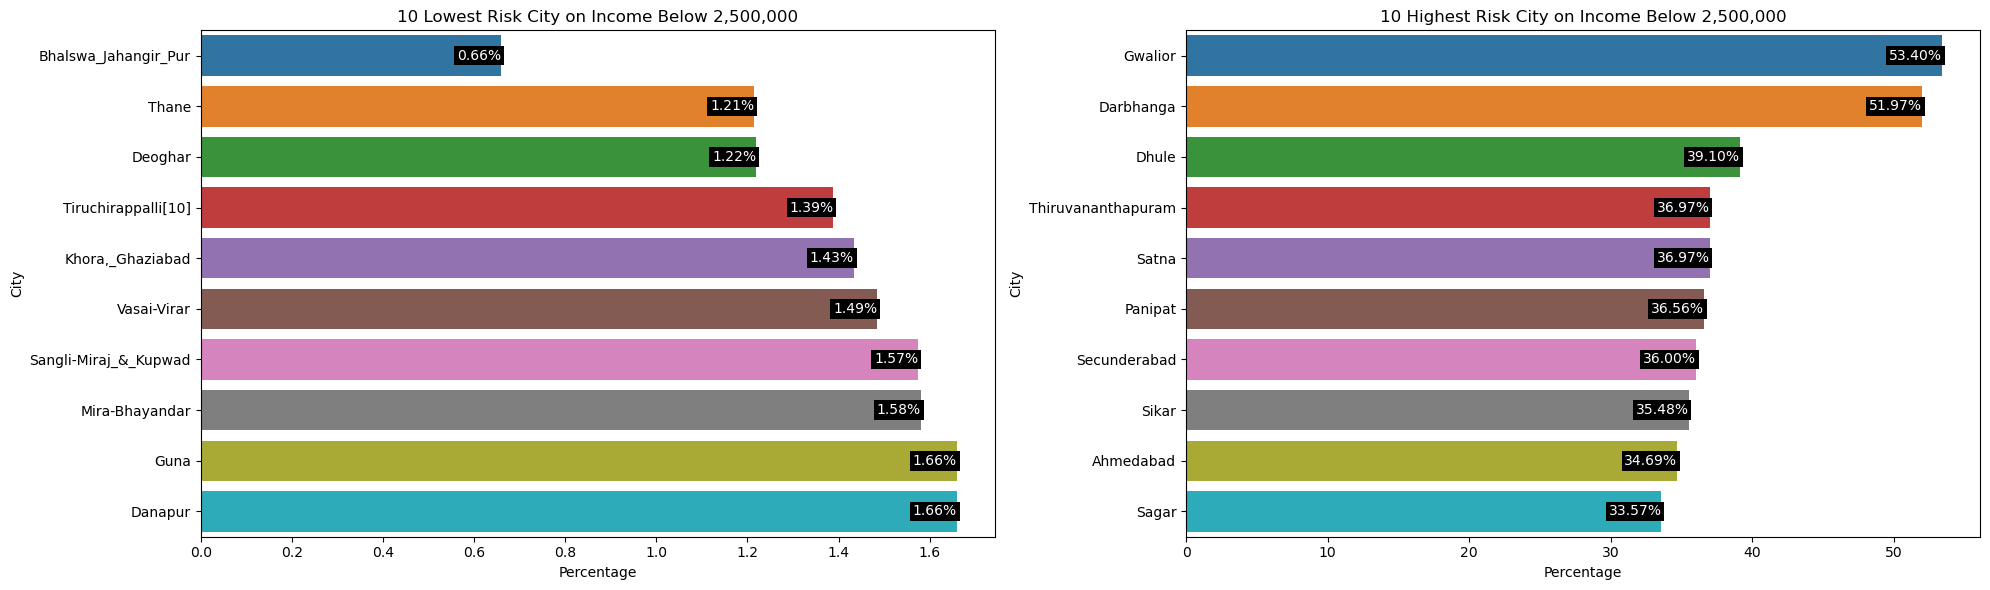

In [68]:
# City_stats_df_percentage

# menyiapkan percentage untuk angka chart

c10 = City_stats_df_percentage
c10 = c10.T.reset_index()
c10.head()
# Chart for Income Below 2,500,000

plt.figure(figsize = (20, 6))
# 10 Lowest Risk City under '>2500000' of income
c10a_low = c10[c10['<2500000'] > 0].sort_values(by='<2500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='<2500000', y='City', data=c10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(c10a_low['<2500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Lowest Risk City on Income Below 2,500,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# 10 Highest Risk City under '>2500000' of income
c10a_high = c10[c10['<2500000'] > 0].sort_values(by='<2500000', ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x='<2500000', y='City', data=c10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(c10a_high['<2500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Highest Risk City on Income Below 2,500,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

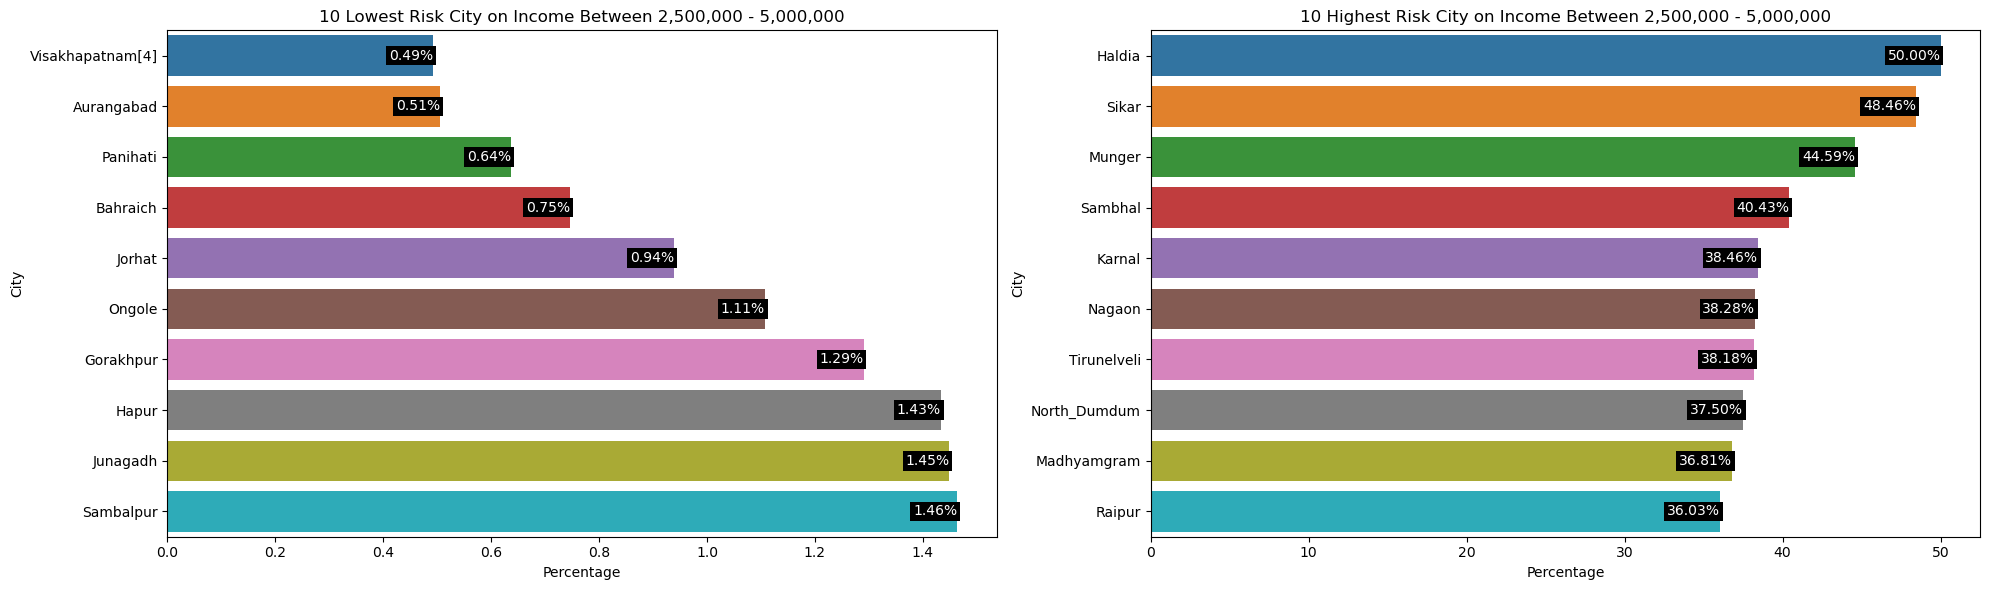

In [69]:
# City_stats_df_percentage

# menyiapkan percentage untuk angka chart

c10 = City_stats_df_percentage
c10 = c10.T.reset_index()
c10.head()
# Chart for Income Between 2,500,000 - 5,000,000

plt.figure(figsize = (20, 6))
# 10 Lowest Risk City Between 2,500,000 - 5,000,000
c10a_low = c10[c10['<5000000'] > 0].sort_values(by='<5000000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='<5000000', y='City', data=c10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(c10a_low['<5000000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Lowest Risk City on Income Between 2,500,000 - 5,000,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# 10 Highest Risk City Between 2,500,000 - 5,000,000
c10a_high = c10[c10['<5000000'] > 0].sort_values(by='<5000000', ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x='<5000000', y='City', data=c10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(c10a_high['<5000000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Highest Risk City on Income Between 2,500,000 - 5,000,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

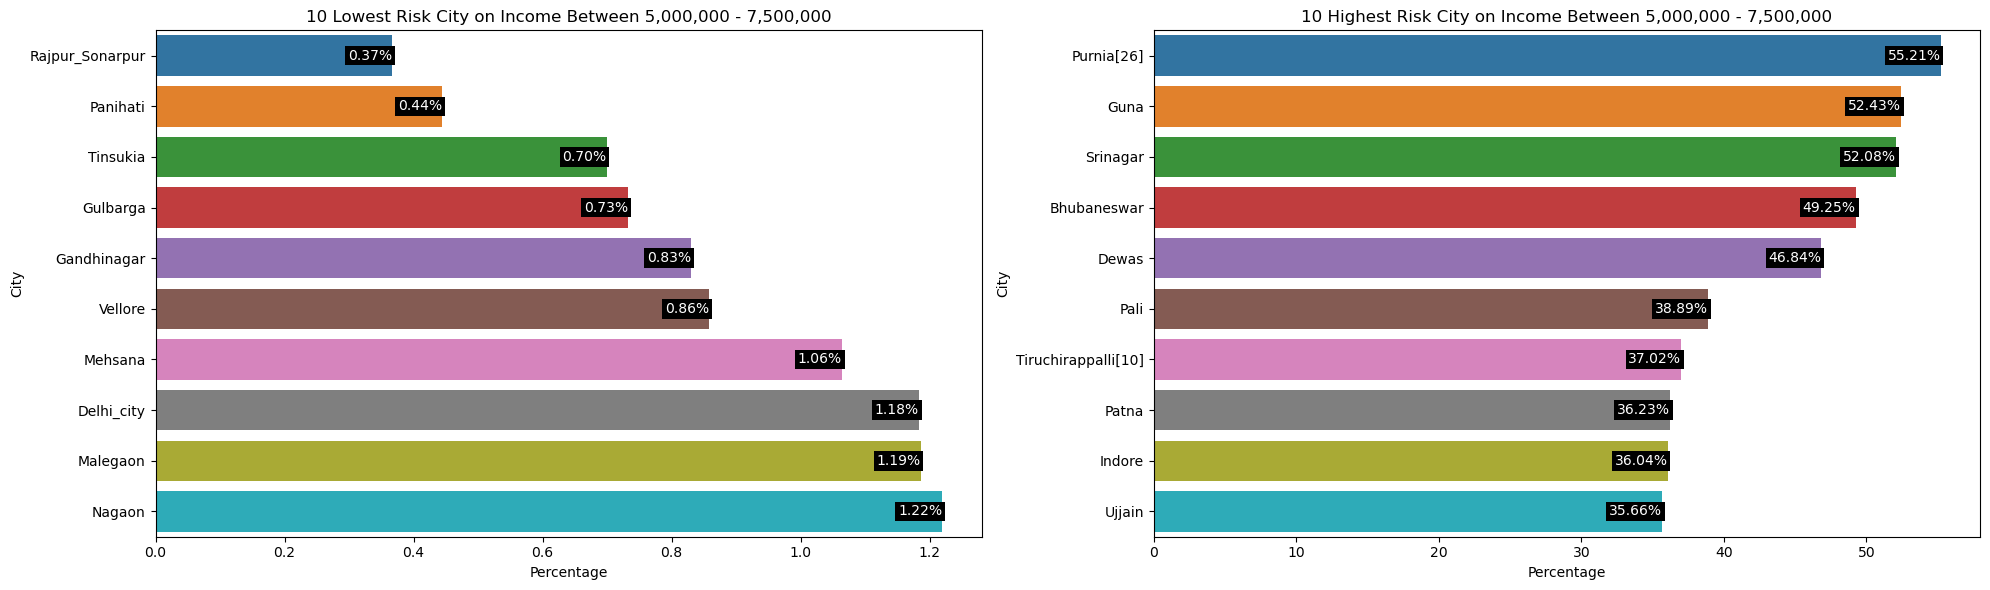

In [70]:
# City_stats_df_percentage

# menyiapkan percentage untuk angka chart

c10 = City_stats_df_percentage
c10 = c10.T.reset_index()
c10.head()
# Chart for Income Between 5,000,000 - 7,500,000

plt.figure(figsize = (20, 6))
# 10 Lowest Risk City Between 5,000,000 - 7,500,000
c10a_low = c10[c10['<7500000'] > 0].sort_values(by='<7500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='<7500000', y='City', data=c10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(c10a_low['<7500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Lowest Risk City on Income Between 5,000,000 - 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# 10 Highest Risk City Between 5,000,000 - 7,500,000
c10a_high = c10[c10['<7500000'] > 0].sort_values(by='<7500000', ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x='<7500000', y='City', data=c10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(c10a_high['<7500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Highest Risk City on Income Between 5,000,000 - 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

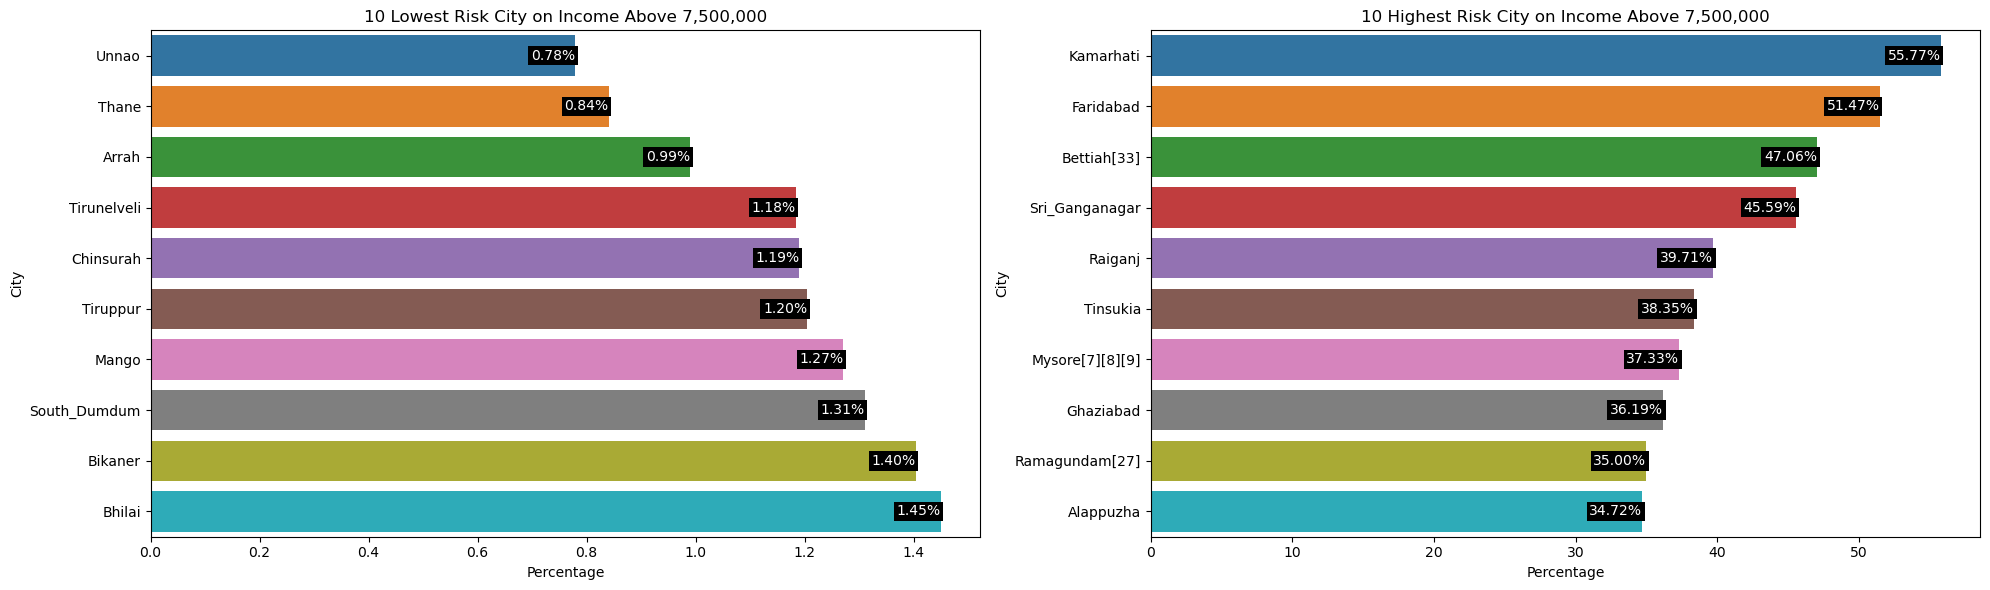

In [71]:
# City_stats_df_percentage

# menyiapkan percentage untuk angka chart

c10 = City_stats_df_percentage
c10 = c10.T.reset_index()
c10.head()
# Chart for Income Above 7,500,000

plt.figure(figsize = (20, 6))
# 10 Lowest Risk City Above 7,500,000
c10a_low = c10[c10['>7500000'] > 0].sort_values(by='>7500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='>7500000', y='City', data=c10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(c10a_low['>7500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Lowest Risk City on Income Above 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# 10 Highest Risk City Above 7,500,000
c10a_high = c10[c10['>7500000'] > 0].sort_values(by='>7500000', ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x='>7500000', y='City', data=c10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(c10a_high['>7500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Highest Risk City on Income Above 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

#### Kesimpulan Analisa City Terhadap Income Pada Customer Bermasalah 

1. Pada kategori income dibawah 2,500,000 : resiko terendah adalah Bhalswasa JP (0.66%), resiko tertinggi adalah consultant (53.40%)
2. Pada kategori income 2,500,000 - 5,000,000 : resiko terendah adalah Visakhpatnam (0.49%), resiko tertinggi adalah Haldia (50.00%)
3. Pada kategori income 5,000,000 - 7,500,000 : resiko terendah adalah  Rajpur_sonarpur (0.37%), resiko tertinggi adalah Purnia (55.21%)
4. Pada kategori income diatas 7,500,000 : resiko terendah adalah Unnao (0.78%), resiko tertinggi adalah Kamarhati (55.77%)

#### 3. Analisis Resiko Pada State & Income

In [195]:
State_stats_df = df.groupby(['State', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
State_stats_df = State_stats_df.transpose()

State_stats_df

State       Andhra_Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Income_cat                                                                  
<2500000              5848   1877   4906         246          1171   1498   
<5000000              6586   1932   5035         143           722   1312   
<7500000              6422   1454   4843         202           889   1171   
>7500000              6441   1799   4996          65          1052   1509   

State       Gujarat  Haryana  Himachal_Pradesh  Jammu_and_Kashmir  Jharkhand  \
Income_cat                                                                     
<2500000       2839     2125               284                516       2428   
<5000000       2567     1874               245                552       1764   
<7500000       3362     2049               132                262       2097   
>7500000       2640     1842               172                450       2676   

State       Karnataka  Kerala  Madhya_Pradesh  Maharashtra  Manipur  Mizoram  \
Income_cat                                                                     
<2500000         2682    1329            3613         6119      101      210   
<5000000         3469    1431            3696         6233      133      209   
<7500000         2948    1654            3330         6520      349      274   
>7500000         2756    1391            3483         6690      266      156   

State       Odisha  Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  \
Income_cat                                                              
<2500000      1302         490    1214       2102     183        4313   
<5000000      1037         444    1136       2130     115        3754   
<7500000      1182         273    1430       2476     211        4359   
>7500000      1137         226     940       2466      99        4111   

State       Telangana  Tripura  Uttar_Pradesh  Uttarakhand  West_Bengal  
Income_cat                                                               
<2500000         1692      249           7477          517         5629  
<5000000         2136      173           7874          487         5809  
<7500000         1999      137           7063          377         5996  
>7500000         1697      250           6729          493         6049

In [196]:
State_stats_1 = risk1.groupby(['State', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
State_stats_1 = State_stats_1.transpose()

State_stats_1

State       Andhra_Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Income_cat                                                                  
<2500000               768    301    670           9           199     84   
<5000000               754    203    631           7           133    160   
<7500000               635     96    582          39            98     80   
>7500000               778    330    700           6            81    250   

State       Gujarat  Haryana  Himachal_Pradesh  Jammu_and_Kashmir  Jharkhand  \
Income_cat                                                                     
<2500000        355      342                47                 57        245   
<5000000        359      147                 4                109        246   
<7500000        296      253                 6                 55        384   
>7500000        333      238                54                 62        320   

State       Karnataka  Kerala  Madhya_Pradesh  Maharashtra  Manipur  Mizoram  \
Income_cat                                                                     
<2500000          255     264             564          822        8        4   
<5000000          362     162             500          606       37       26   
<7500000          225     263             528          739       82       60   
>7500000          347     281             588          728       56        4   

State       Odisha  Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  \
Income_cat                                                              
<2500000       179          47     176        274       9         425   
<5000000       139          52      93        256       7         458   
<7500000       290          11      85        366       8         364   
>7500000        56          57      71        396       4         459   

State       Telangana  Tripura  Uttar_Pradesh  Uttarakhand  West_Bengal  
Income_cat                                                               
<2500000          280       46            889           63          675  
<5000000          246       23            863           50          857  
<7500000          270       31            825           11          854  
>7500000          183       36            863            9          623

In [197]:
State_stats_df_percentage = State_stats_1.div(State_stats_df, axis=0) * 100
State_stats_df_percentage

State       Andhra_Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Income_cat                                                                  
<2500000             13.13  16.04  13.66        3.66         16.99   5.61   
<5000000             11.45  10.51  12.53        4.90         18.42  12.20   
<7500000              9.89   6.60  12.02       19.31         11.02   6.83   
>7500000             12.08  18.34  14.01        9.23          7.70  16.57   

State       Gujarat  Haryana  Himachal_Pradesh  Jammu_and_Kashmir  Jharkhand  \
Income_cat                                                                     
<2500000      12.50    16.09             16.55              11.05      10.09   
<5000000      13.99     7.84              1.63              19.75      13.95   
<7500000       8.80    12.35              4.55              20.99      18.31   
>7500000      12.61    12.92             31.40              13.78      11.96   

State       Karnataka  Kerala  Madhya_Pradesh  Maharashtra  Manipur  Mizoram  \
Income_cat                                                                     
<2500000         9.51   19.86           15.61        13.43     7.92     1.90   
<5000000        10.44   11.32           13.53         9.72    27.82    12.44   
<7500000         7.63   15.90           15.86        11.33    23.50    21.90   
>7500000        12.59   20.20           16.88        10.88    21.05     2.56   

State       Odisha  Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  \
Income_cat                                                              
<2500000     13.75        9.59   14.50      13.04    4.92        9.85   
<5000000     13.40       11.71    8.19      12.02    6.09       12.20   
<7500000     24.53        4.03    5.94      14.78    3.79        8.35   
>7500000      4.93       25.22    7.55      16.06    4.04       11.17   

State       Telangana  Tripura  Uttar_Pradesh  Uttarakhand  West_Bengal  
Income_cat                                                               
<2500000        16.55    18.47          11.89        12.19        11.99  
<5000000        11.52    13.29          10.96        10.27        14.75  
<7500000        13.51    22.63          11.68         2.92        14.24  
>7500000        10.78    14.40          12.83         1.83        10.30

In [198]:
# Filter the values below 5% using a boolean mask
State_below_5_percent = State_stats_df_percentage[State_stats_df_percentage < 10]

State_below_5_percent


State       Andhra_Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Income_cat                                                                  
<2500000               NaN    NaN    NaN        3.66           NaN   5.61   
<5000000               NaN    NaN    NaN        4.90           NaN    NaN   
<7500000              9.89   6.60    NaN         NaN           NaN   6.83   
>7500000               NaN    NaN    NaN        9.23          7.70    NaN   

State       Gujarat  Haryana  Himachal_Pradesh  Jammu_and_Kashmir  Jharkhand  \
Income_cat                                                                     
<2500000        NaN      NaN               NaN                NaN        NaN   
<5000000        NaN     7.84              1.63                NaN        NaN   
<7500000       8.80      NaN              4.55                NaN        NaN   
>7500000        NaN      NaN               NaN                NaN        NaN   

State       Karnataka  Kerala  Madhya_Pradesh  Maharashtra  Manipur  Mizoram  \
Income_cat                                                                     
<2500000         9.51     NaN             NaN          NaN     7.92     1.90   
<5000000          NaN     NaN             NaN         9.72      NaN      NaN   
<7500000         7.63     NaN             NaN          NaN      NaN      NaN   
>7500000          NaN     NaN             NaN          NaN      NaN     2.56   

State       Odisha  Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  \
Income_cat                                                              
<2500000       NaN        9.59     NaN        NaN    4.92        9.85   
<5000000       NaN         NaN    8.19        NaN    6.09         NaN   
<7500000       NaN        4.03    5.94        NaN    3.79        8.35   
>7500000      4.93         NaN    7.55        NaN    4.04         NaN   

State       Telangana  Tripura  Uttar_Pradesh  Uttarakhand  West_Bengal  
Income_cat                                                               
<2500000          NaN      NaN            NaN          NaN          NaN  
<5000000          NaN      NaN            NaN          NaN          NaN  
<7500000          NaN      NaN            NaN         2.92          NaN  
>7500000          NaN      NaN            NaN         1.83          NaN

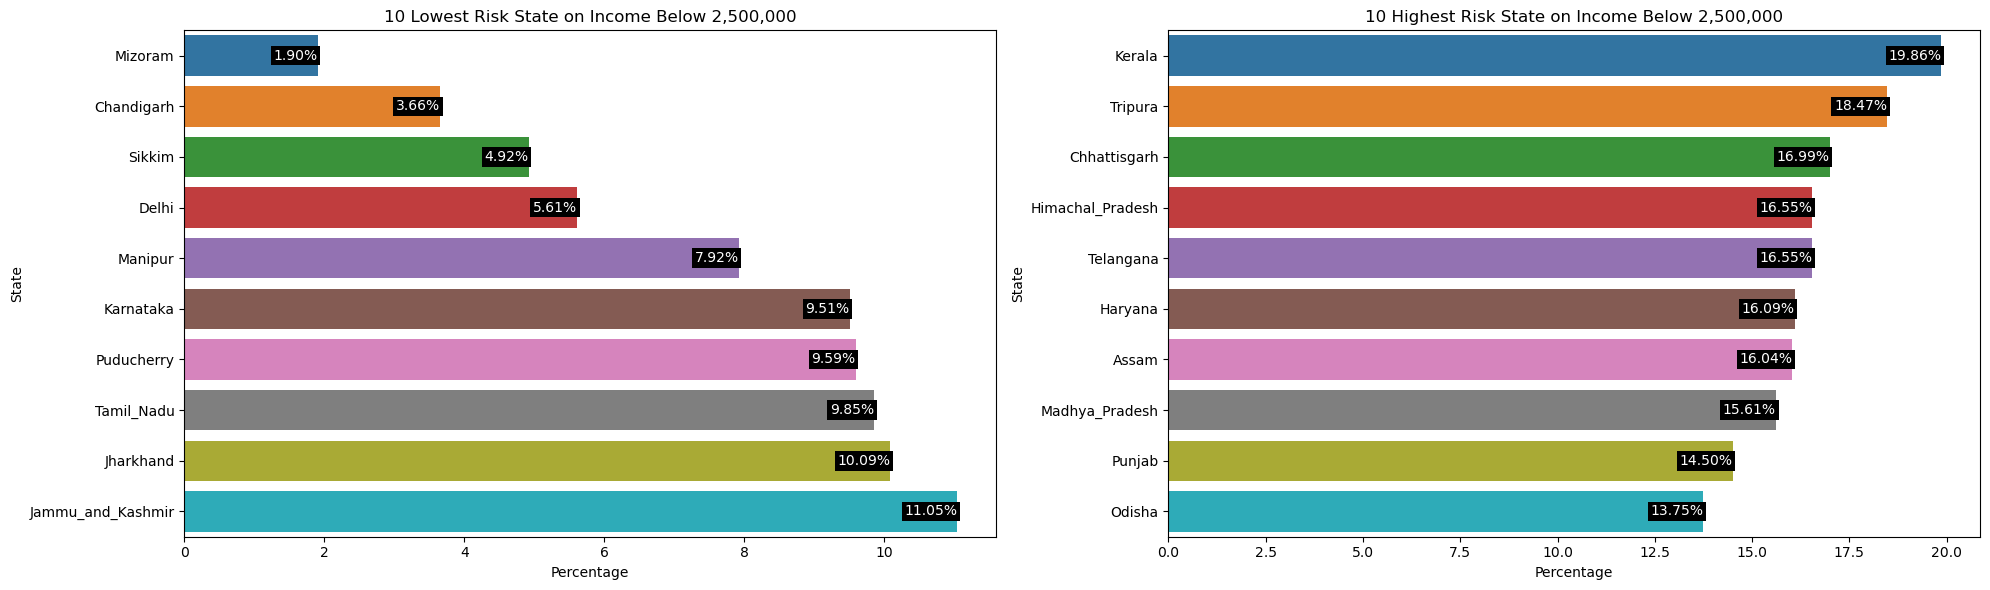

In [76]:
# State_stats_df_percentage

# menyiapkan percentage untuk angka chart

s10 = State_stats_df_percentage
s10 = s10.T.reset_index()
s10.head()
# Chart for Income Below 2,500,000

plt.figure(figsize = (20, 6))
# 10 Lowest Risk State Below 2,500,000
s10a_low = s10[s10['<2500000'] > 0].sort_values(by='<2500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='<2500000', y='State', data=s10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(s10a_low['<2500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Lowest Risk State on Income Below 2,500,000')
plt.xlabel('Percentage')
plt.ylabel('State')

# 10 Highest Risk State Below 2,500,000
s10a_high = s10[s10['<2500000'] > 0].sort_values(by='<2500000', ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x='<2500000', y='State', data=s10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(s10a_high['<2500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Highest Risk State on Income Below 2,500,000')
plt.xlabel('Percentage')
plt.ylabel('State')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

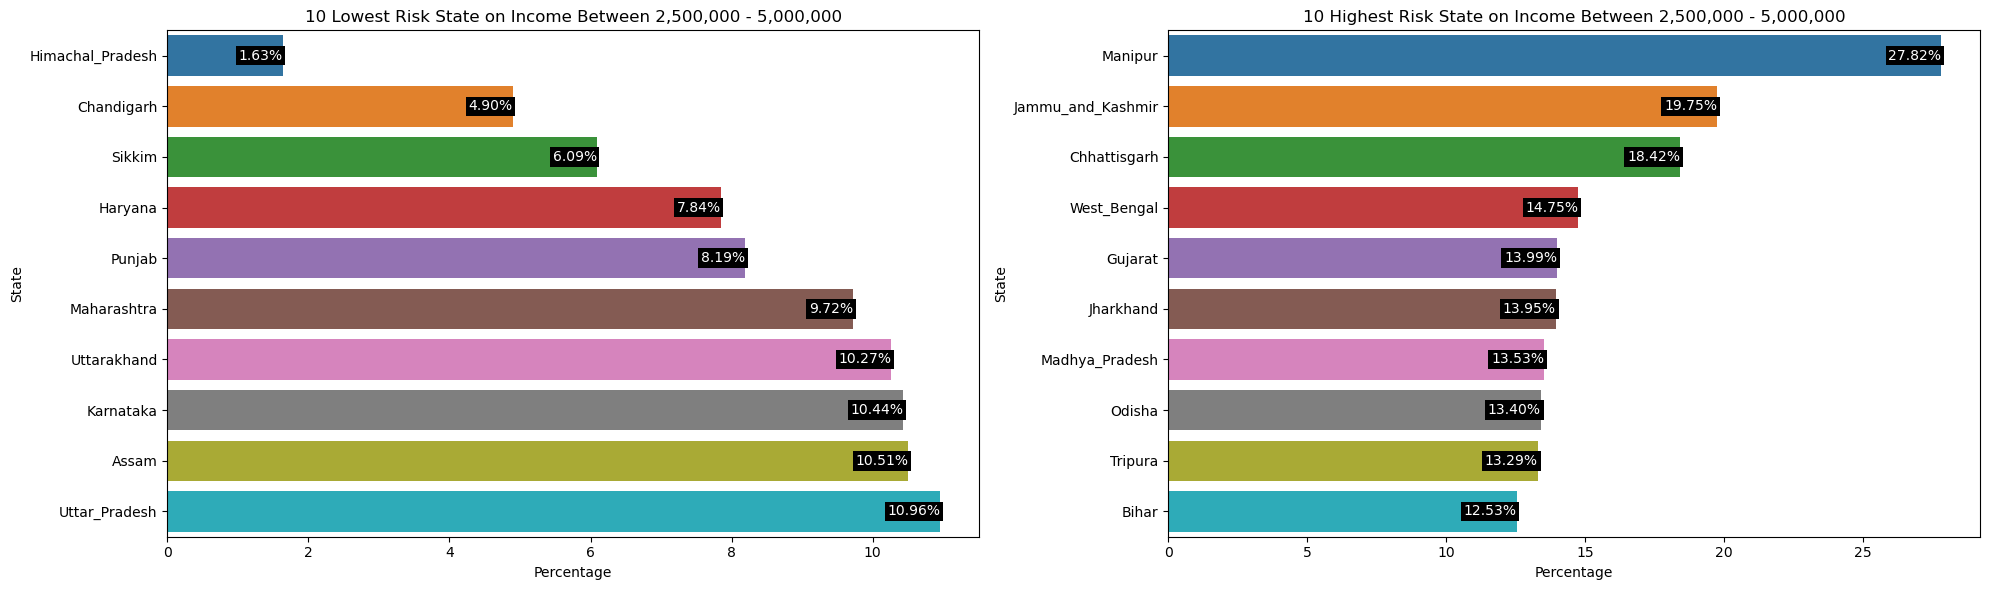

In [77]:
# State_stats_df_percentage

# menyiapkan percentage untuk angka chart

s10 = State_stats_df_percentage
s10 = s10.T.reset_index()
s10.head()
# Chart for Income Between 2,500,000 - 5,000,000

plt.figure(figsize = (20, 6))
# 10 Lowest Risk State Between 2,500,000 - 5,000,000
s10a_low = s10[s10['<5000000'] > 0].sort_values(by='<5000000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='<5000000', y='State', data=s10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(s10a_low['<5000000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Lowest Risk State on Income Between 2,500,000 - 5,000,000')
plt.xlabel('Percentage')
plt.ylabel('State')

# 10 Highest Risk State Between 2,500,000 - 5,000,000
s10a_high = s10[s10['<5000000'] > 0].sort_values(by='<5000000', ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x='<5000000', y='State', data=s10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(s10a_high['<5000000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Highest Risk State on Income Between 2,500,000 - 5,000,000')
plt.xlabel('Percentage')
plt.ylabel('State')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

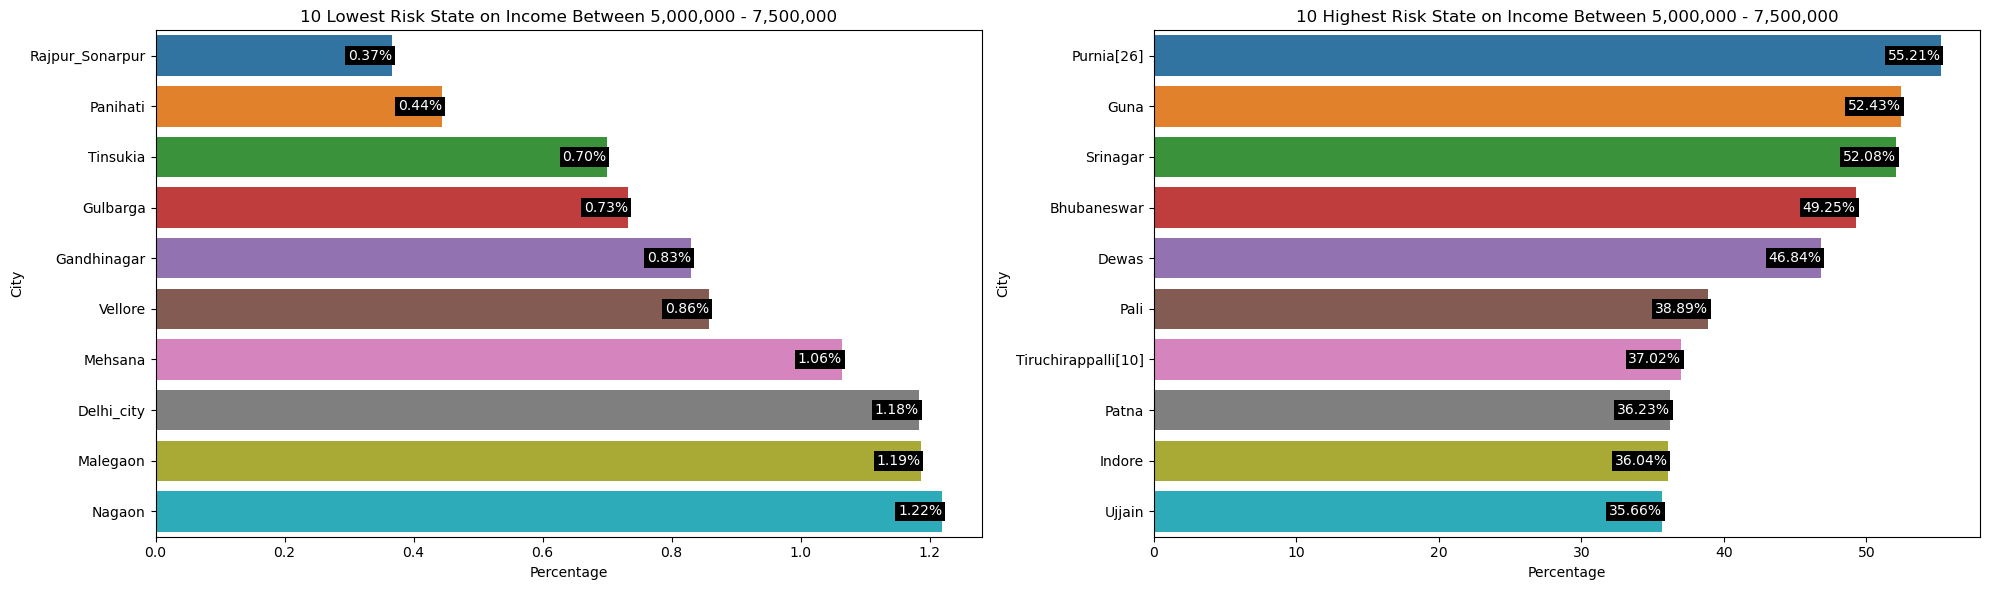

In [78]:
# City_stats_df_percentage

# menyiapkan percentage untuk angka chart

c10 = City_stats_df_percentage
c10 = c10.T.reset_index()
c10.head()
# Chart for Income Between 5,000,000 - 7,500,000

plt.figure(figsize = (20, 6))
# 10 Lowest Risk City Between 5,000,000 - 7,500,000
c10a_low = c10[c10['<7500000'] > 0].sort_values(by='<7500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='<7500000', y='City', data=c10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(c10a_low['<7500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Lowest Risk State on Income Between 5,000,000 - 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# 10 Highest Risk City Between 5,000,000 - 7,500,000
c10a_high = c10[c10['<7500000'] > 0].sort_values(by='<7500000', ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x='<7500000', y='City', data=c10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(c10a_high['<7500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Highest Risk State on Income Between 5,000,000 - 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('City')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

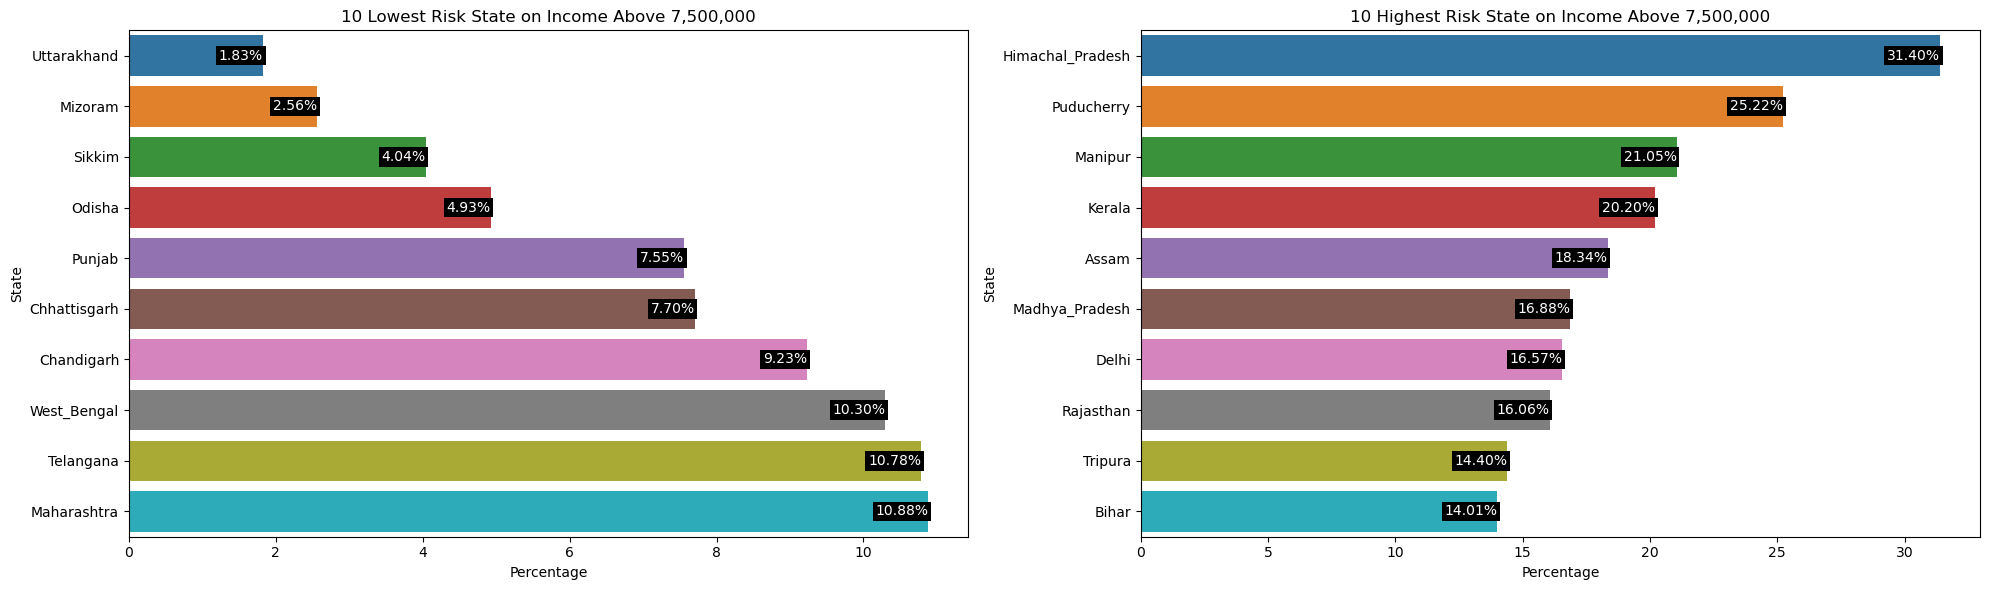

In [79]:
# State_stats_df_percentage

# menyiapkan percentage untuk angka chart

s10 = State_stats_df_percentage
s10 = s10.T.reset_index()
s10.head()

# Chart for Income Above 7,500,000
plt.figure(figsize = (20, 6))
# 10 Lowest Risk State Above 7,500,000
s10a_low = s10[s10['>7500000'] > 0].sort_values(by='>7500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='>7500000', y='State', data=s10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(s10a_low['>7500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Lowest Risk State on Income Above 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('State')

# 10 Highest Risk State Above 7,500,000
s10a_high = s10[s10['>7500000'] > 0].sort_values(by='>7500000', ascending=False).head(10)

# Create the second subplot for the highest risk chart
plt.subplot(1, 2, 2)
sns.barplot(x='>7500000', y='State', data=s10a_high)

# Add percentages to the bars in the second subplot
for index, value in enumerate(s10a_high['>7500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('10 Highest Risk State on Income Above 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('State')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

#### Kesimpulan Analisa State Terhadap Income Pada Customer Bermasalah

1. Untuk income kategori Below 2,500,000       : terendah Mizoram(1,90%), tertinggi Kerala (19,86%)
2. Untuk income kategori 2,500,000 - 5,000,000 : terendah Himachal Pradesh(1,63%), tertinggi Manipur (27,82%)
3. Untuk income kategori 5,000,000 - 7,500,000 : terendah Rajnarpur Sonarpur(0,37%), tertinggi Purnia (55,21%)
4. Untuk income kategori above 7,500,000       : terendah Uttarakhand (1,83%), Himachal_Pradesh (31,40%)

#### 4. Analisis Resiko Pada Job Duration dan Income

In [128]:
Job_stats_df = df.groupby(['Job_Duration_cat', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Job_stats_df = Job_stats_df.transpose()

Job_stats_df

Job_Duration_cat    0-3  10-14    4-6    7-9
Income_cat                                  
<2500000          15572  13954  19202  14232
<5000000          15153  13859  20077  13909
<7500000          16764  13849  18392  14456
>7500000          15676  14321  19250  13334

In [129]:
Job_stats_1 = risk1.groupby(['Job_Duration_cat', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Job_stats_1 = Job_stats_1.transpose()

Job_stats_1

Job_Duration_cat   0-3  10-14   4-6   7-9
Income_cat                               
<2500000          2021   1661  2473  1902
<5000000          2125   1612  2180  1573
<7500000          2272   1880  1884  1500
>7500000          2267   1733  2512  1401

In [130]:
Job_stats_df_percentage = Job_stats_1.div(Job_stats_df, axis=0) * 100
Job_stats_df_percentage

Job_Duration_cat   0-3  10-14   4-6   7-9
Income_cat                               
<2500000         12.98  11.90 12.88 13.36
<5000000         14.02  11.63 10.86 11.31
<7500000         13.55  13.57 10.24 10.38
>7500000         14.46  12.10 13.05 10.51

In [131]:
# Filter the values below 5% using a boolean mask
Job_below_5_percent = Job_stats_df_percentage[Job_stats_df_percentage < 10]

Job_below_5_percent


Job_Duration_cat  0-3  10-14  4-6  7-9
Income_cat                            
<2500000          NaN    NaN  NaN  NaN
<5000000          NaN    NaN  NaN  NaN
<7500000          NaN    NaN  NaN  NaN
>7500000          NaN    NaN  NaN  NaN

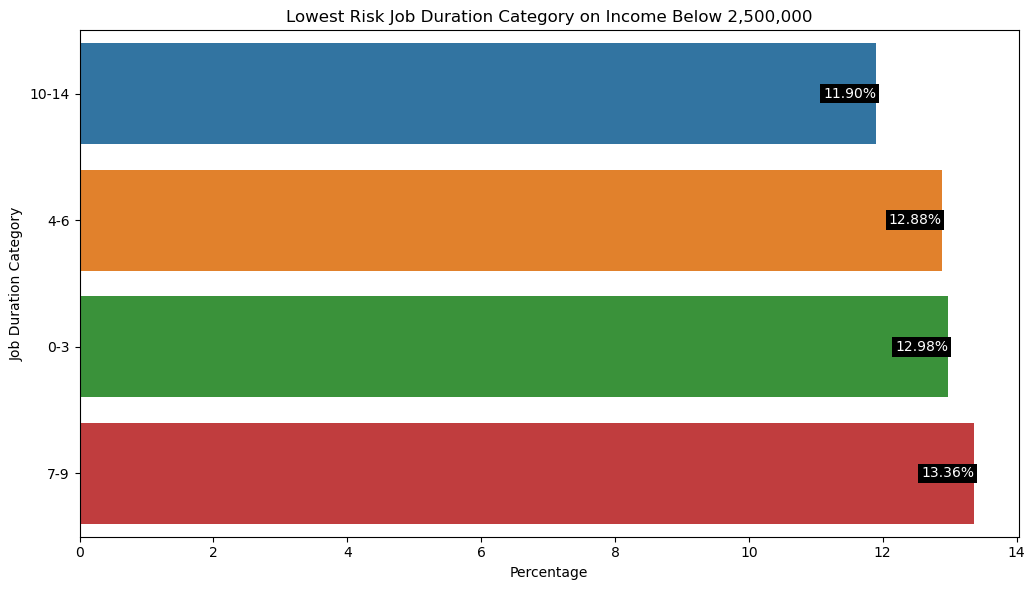

In [349]:
# menyiapkan percentage untuk angka chart

j10 = Job_stats_df_percentage
j10 = j10.T.reset_index()
j10.head()

in_cat = '<2500000'

# Chart for Income Below 2,500,000

plt.figure(figsize = (20, 6))

# 10 Lowest Risk Job under '<2500000' of income
j10a_low = j10[j10['<2500000'] > 0].sort_values(by='<2500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='<2500000', y='Job_Duration_cat', data=j10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(j10a_low['<2500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('Lowest Risk Job Duration Category on Income Below 2,500,000')
plt.xlabel('Percentage')
plt.ylabel('Job Duration Category')

# 10 Highest Risk Jobunder '>2500000' of income
j10a_high = j10[j10['<2500000'] > 0].sort_values(by='<2500000', ascending=False).head(10)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


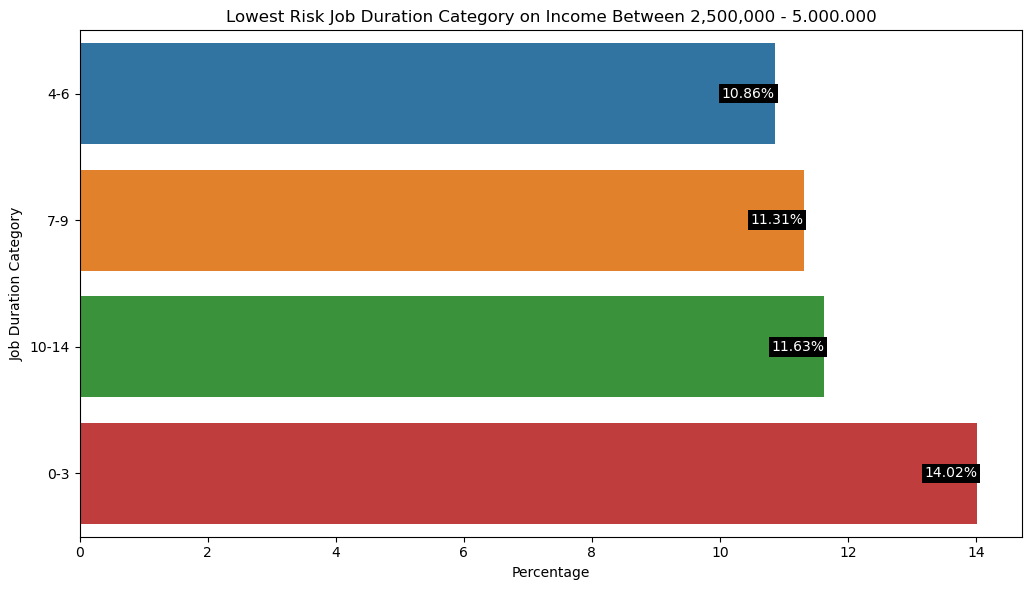

In [347]:
# menyiapkan percentage untuk angka chart

j10 = Job_stats_df_percentage
j10 = j10.T.reset_index()
j10.head()

in_cat = '<5000000'

# Chart for Income Below 2,500,000

plt.figure(figsize = (20, 6))

# 10 Lowest Risk Job under '<2500000' of income
j10a_low = j10[j10['<5000000'] > 0].sort_values(by='<5000000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x='<5000000', y='Job_Duration_cat', data=j10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(j10a_low['<5000000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('Lowest Risk Job Duration Category on Income Between 2,500,000 - 5.000.000')
plt.xlabel('Percentage')
plt.ylabel('Job Duration Category')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


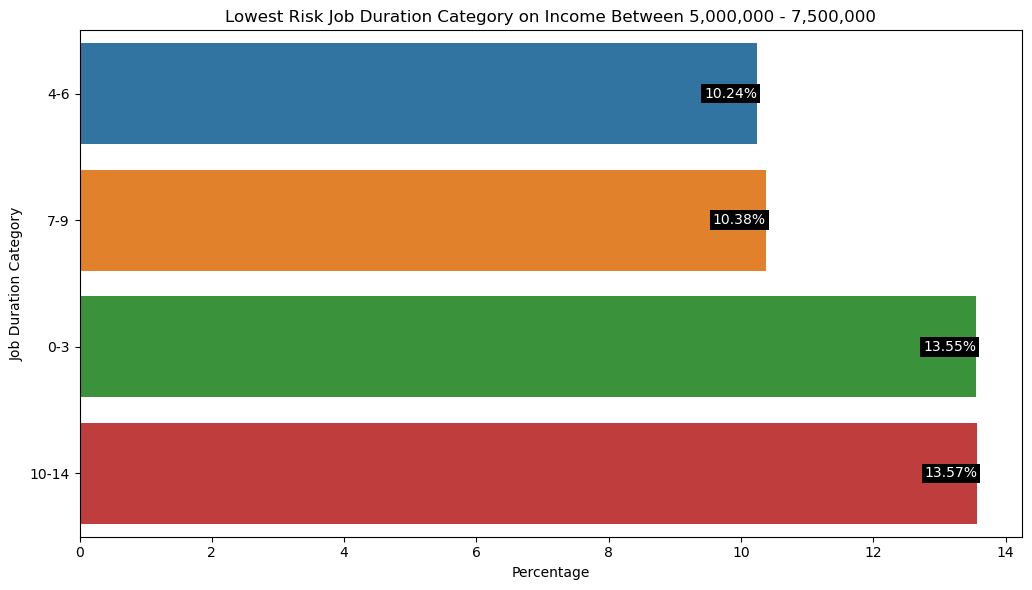

In [346]:
# menyiapkan percentage untuk angka chart

j10 = Job_stats_df_percentage
j10 = j10.T.reset_index()
j10.head()

a = '<7500000'

# Chart for Income Below 2,500,000

plt.figure(figsize = (20, 6))

# 10 Lowest Risk Job under '<2500000' of income
j10a_low = j10[j10[a] > 0].sort_values(by=a, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x=a, y='Job_Duration_cat', data=j10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(j10a_low[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('Lowest Risk Job Duration Category on Income Between 5,000,000 - 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('Job Duration Category')

# 10 Highest Risk Jobunder '>2500000' of income
j10a_high = j10[j10[a] > 0].sort_values(by=a, ascending=False).head(10)


# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


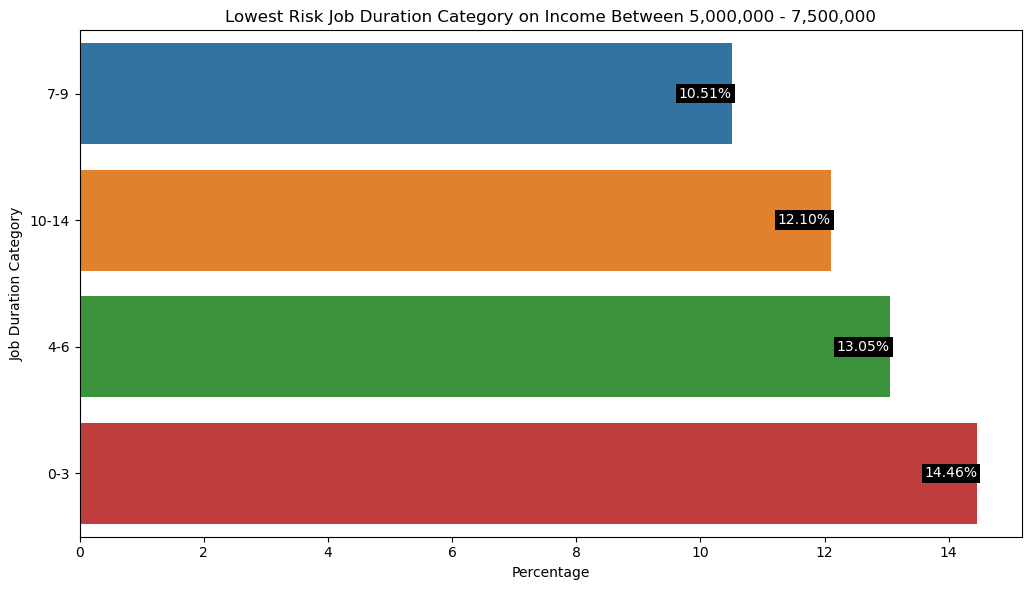

In [348]:
# menyiapkan percentage untuk angka chart

j10 = Job_stats_df_percentage
j10 = j10.T.reset_index()
j10.head()

a = '>7500000'

# Chart for Income Below 2,500,000

plt.figure(figsize = (20, 6))

# 10 Lowest Risk Job under '<2500000' of income
j10a_low = j10[j10[a] > 0].sort_values(by=a, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
plt.subplot(1, 2, 1)
sns.barplot(x=a, y='Job_Duration_cat', data=j10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(j10a_low[a]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('Lowest Risk Job Duration Category on Income Between 5,000,000 - 7,500,000')
plt.xlabel('Percentage')
plt.ylabel('Job Duration Category')

# 10 Highest Risk Jobunder '>2500000' of income
j10a_high = j10[j10[a] > 0].sort_values(by=a, ascending=False).head(10)


# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


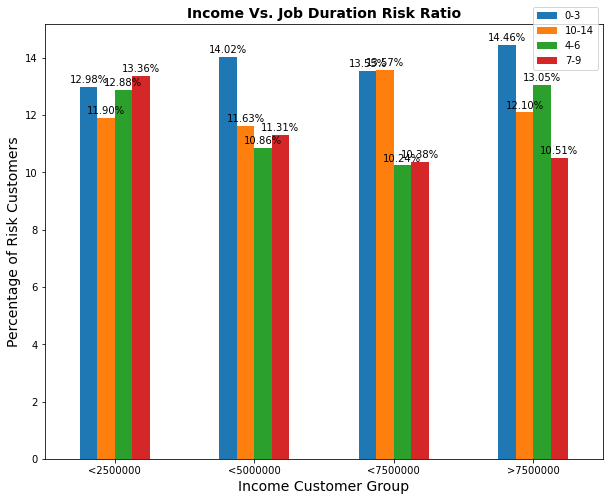

In [152]:
job_income_rat = Job_stats_df_percentage.reset_index()
ax = job_income_rat.plot(x="Income_cat", y=['0-3', '10-14', '4-6', '7-9'], kind="bar", figsize = (10, 8))

plt.xlabel('Income Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Income Vs. Job Duration Risk Ratio', fontweight="bold", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1.05))
for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt='%.2f%%')

plt.show()

#### Kesimpulan Analisa Job Duration Terhadap Income Pada Customer Bermasalah

Semua kategori mencatat resiko diatas threshold 10%, namun untuk kategori 2,500,000 - 7,500,000 adalah prospektif terbaik dengan persentase yang tidak terlalu jauh berbeda 

#### 5. Analisis Resiko Pada Experience dan Income

In [142]:
Experience_stats_df = df.groupby(['Experience_cat', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Experience_stats_df = Experience_stats_df.transpose()

Experience_stats_df

Experience_cat    0-5  11-15   6-10    >15
Income_cat                                
<2500000        17771  14364  15795  15030
<5000000        16922  15405  15397  15274
<7500000        18139  14689  15381  15252
>7500000        17190  15866  14606  14919

In [143]:
Experience_stats_1 = risk1.groupby(['Experience_cat', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Experience_stats_1 = Experience_stats_1.transpose()

Experience_stats_1

Experience_cat   0-5  11-15  6-10   >15
Income_cat                             
<2500000        2568   1800  1905  1784
<5000000        2262   2063  1569  1596
<7500000        2427   1733  1773  1603
>7500000        2617   1835  1821  1640

In [144]:
Experience_stats_df_percentage = Experience_stats_1.div(Experience_stats_df, axis=0) * 100
Experience_stats_df_percentage

Experience_cat   0-5  11-15  6-10   >15
Income_cat                             
<2500000       14.45  12.53 12.06 11.87
<5000000       13.37  13.39 10.19 10.45
<7500000       13.38  11.80 11.53 10.51
>7500000       15.22  11.57 12.47 10.99

In [145]:
# Filter the values below 5% using a boolean mask
Experience_below_5_percent = Experience_stats_df_percentage[Experience_stats_df_percentage < 10]

Experience_below_5_percent


Experience_cat  0-5  11-15  6-10  >15
Income_cat                           
<2500000        NaN    NaN   NaN  NaN
<5000000        NaN    NaN   NaN  NaN
<7500000        NaN    NaN   NaN  NaN
>7500000        NaN    NaN   NaN  NaN

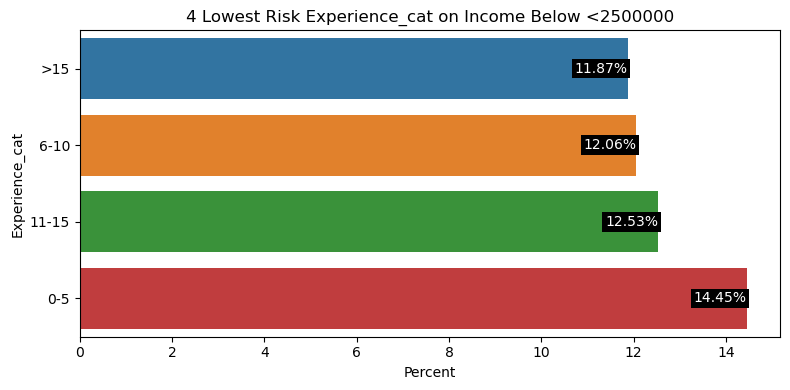

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

table = 'Experience_cat'
ctg = '<2500000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
x10 = Experience_stats_df_percentage
x10 = x10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 4))

# 10 Lowest Risk {table} under {ctg} of income
x10a_low = x10[x10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=x10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(x10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


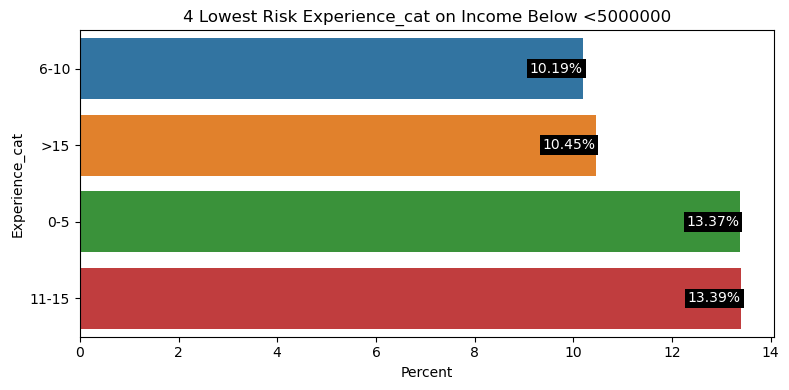

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns


table = 'Experience_cat'
ctg = '<5000000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
x10 = Experience_stats_df_percentage
x10 = x10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 4))

# 10 Lowest Risk {table} under {ctg} of income
x10a_low = x10[x10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=x10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(x10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


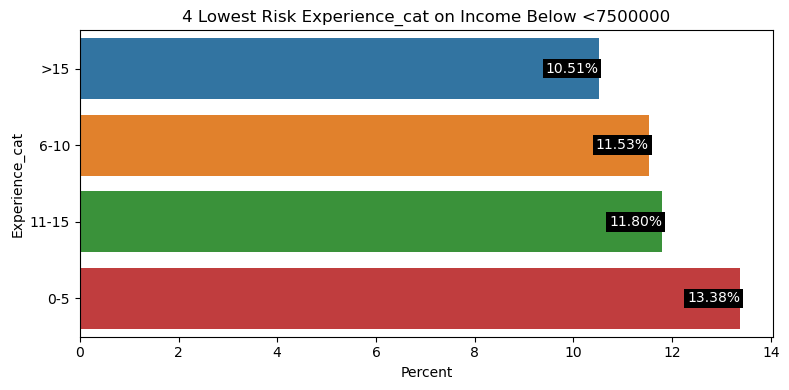

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns


table = 'Experience_cat'
ctg = '<7500000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
x10 = Experience_stats_df_percentage
x10 = x10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 4))

# 10 Lowest Risk {table} under {ctg} of income
x10a_low = x10[x10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=x10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(x10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


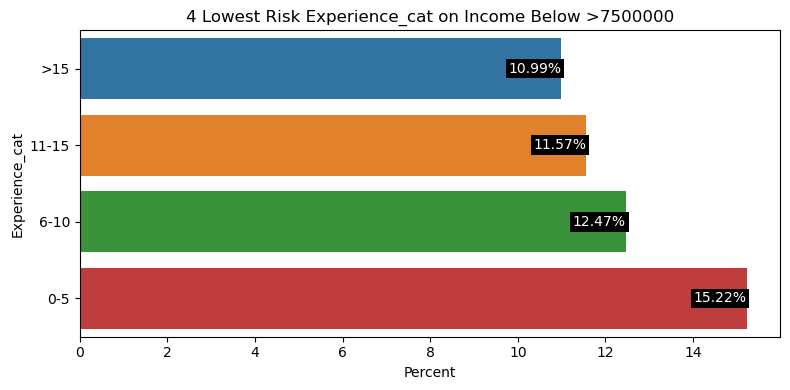

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns


table = 'Experience_cat'
ctg = '>7500000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
x10 = Experience_stats_df_percentage
x10 = x10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 4))

# 10 Lowest Risk {table} under {ctg} of income
x10a_low = x10[x10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=x10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(x10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


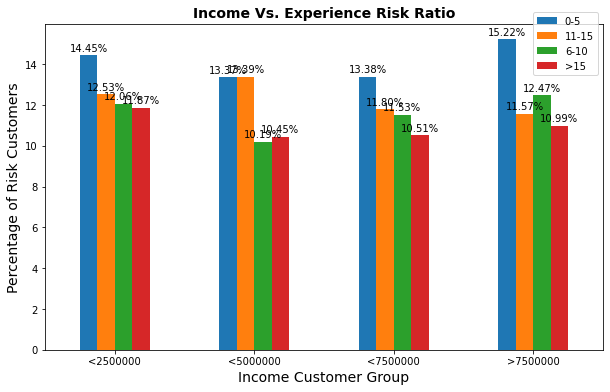

In [161]:
exp_income_rat = Experience_stats_df_percentage.reset_index()
ax = exp_income_rat.plot(x="Income_cat", y=['0-5', '11-15', '6-10',	'>15'], kind="bar", figsize = (10, 6))

plt.xlabel('Income Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Income Vs. Experience Risk Ratio', fontweight="bold", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1.05))
for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt='%.2f%%')

plt.show()

#### Kesimpulan Analisis Resiko Pada Experience Terhadap Income Pada Customer Bermasalah

Experience_cat dengan rentang 0-5 tahun sebagai pemilik resiko tertinggi (<2500000, <7500000, >7500000)
Experience_cat dengan lebih dari 15 tahun sebagai pemilik resiko terendah (<2500000, <7500000, >7500000)
Experience_cat dengan rentang 6-10 tahun sebagai pemilik resiko terendah pada kategori income dibawah 5000000

#### 6. Analisis Resiko Pada Age Category dan Income

In [147]:
Age_stats_df = df.groupby(['Age_cat', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Age_stats_df = Age_stats_df.transpose()

Age_stats_df

Age_cat     21-34  35-49  50-64  65-79
Income_cat                            
<2500000    16674  15818  14991  15477
<5000000    16202  15257  16394  15145
<7500000    16932  16407  15588  14534
>7500000    15918  15440  16156  15067

In [148]:
Age_stats_1 = risk1.groupby(['Age_cat', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Age_stats_1 = Age_stats_1.transpose()

Age_stats_1

Age_cat     21-34  35-49  50-64  65-79
Income_cat                            
<2500000     2363   2228   1756   1710
<5000000     2068   1674   1960   1788
<7500000     2309   1753   1882   1592
>7500000     2193   1834   1956   1930

In [149]:
Age_stats_df_percentage = Age_stats_1.div(Age_stats_df, axis=0) * 100
Age_stats_df_percentage

Age_cat     21-34  35-49  50-64  65-79
Income_cat                            
<2500000    14.17  14.09  11.71  11.05
<5000000    12.76  10.97  11.96  11.81
<7500000    13.64  10.68  12.07  10.95
>7500000    13.78  11.88  12.11  12.81

In [150]:
# Filter the values below 5% using a boolean mask
Age_below_5_percent = Age_stats_df_percentage[Experience_stats_df_percentage < 5]

Age_below_5_percent


Age_cat     21-34  35-49  50-64  65-79
Income_cat                            
<2500000      NaN    NaN    NaN    NaN
<5000000      NaN    NaN    NaN    NaN
<7500000      NaN    NaN    NaN    NaN
>7500000      NaN    NaN    NaN    NaN

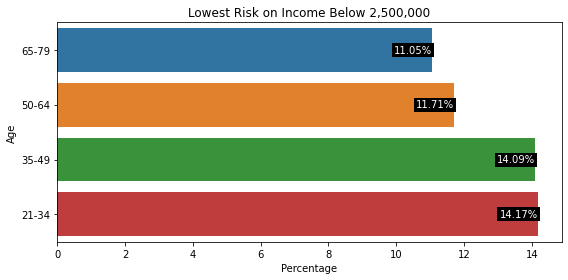

In [52]:
# menyiapkan percentage untuk angka chart

a10 = Age_stats_df_percentage
a10 = a10.T.reset_index()
a10.head()


# Chart for Income Below 2,500,000

plt.figure(figsize = (8, 4))

# 10 Lowest Risk Age under '<2500000' of income
a10a_low = a10[a10['<2500000'] > 0].sort_values(by='<2500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart

sns.barplot(x='<2500000', y='Age_cat', data=a10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(a10a_low['<2500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('Lowest Risk on Income Below 2,500,000')
plt.xlabel('Percentage')
plt.ylabel('Age')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


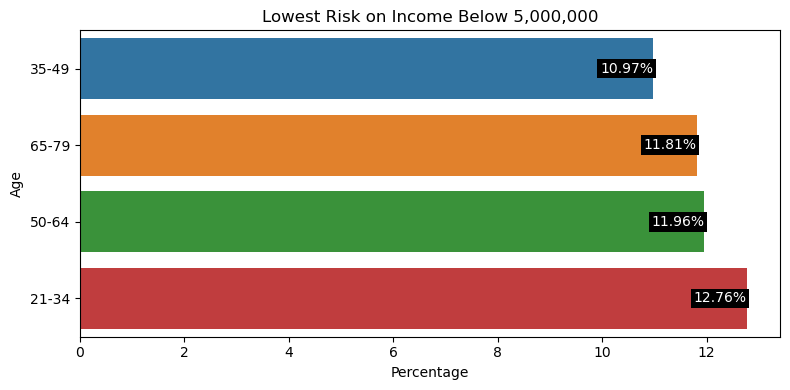

In [352]:
# menyiapkan percentage untuk angka chart

a10 = Age_stats_df_percentage
a10 = a10.T.reset_index()
a10.head()


# Chart for Income Below 5,000,000

plt.figure(figsize = (8, 4))

# 10 Lowest Risk Age under '<5000000' of income
a10a_low = a10[a10['<5000000'] > 0].sort_values(by='<5000000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart

sns.barplot(x='<5000000', y='Age_cat', data=a10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(a10a_low['<5000000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('Lowest Risk on Income Below 5,000,000')
plt.xlabel('Percentage')
plt.ylabel('Age')


# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


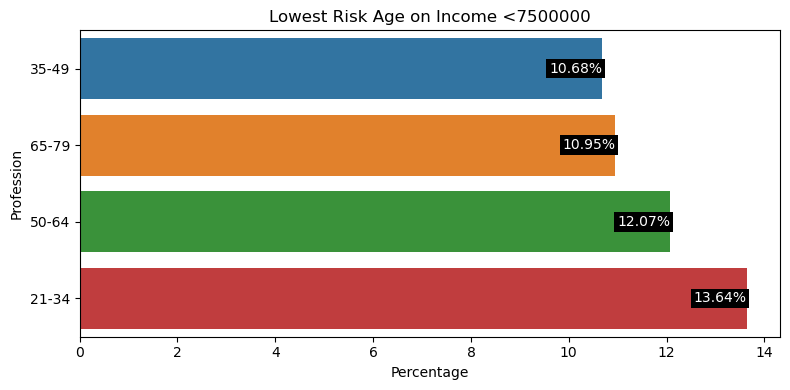

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

income_category = '<7500000'

plt.figure(figsize=(8, 4))
# 10 Lowest Risk Age under '>7,500,000' of income
a10a_low = a10[a10[income_category] > 0].sort_values(by=income_category, ascending=True).head(10)

# Create the first subplot for the lowest risk chart

sns.barplot(x=income_category, y='Age_cat', data=a10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(a10a_low[income_category]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'Lowest Risk Age on Income {income_category}')
plt.xlabel('Percentage')
plt.ylabel('Profession')


# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


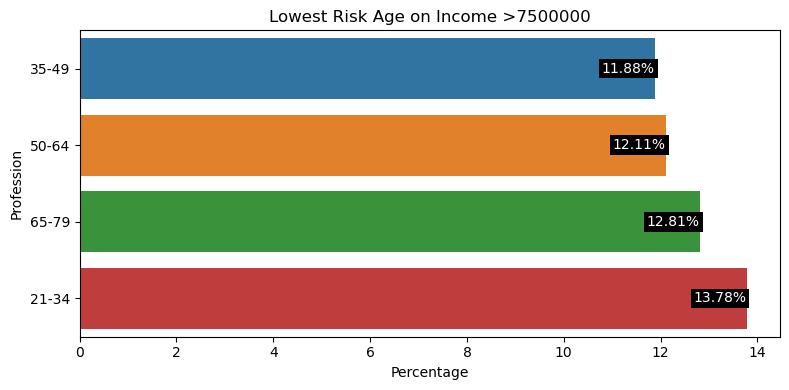

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

income_category = '>7500000'

plt.figure(figsize=(8, 4))
# 10 Lowest Risk Age under '>7,500,000' of income
a10a_low = a10[a10[income_category] > 0].sort_values(by=income_category, ascending=True).head(10)

# Create the first subplot for the lowest risk chart

sns.barplot(x=income_category, y='Age_cat', data=a10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(a10a_low[income_category]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'Lowest Risk Age on Income {income_category}')
plt.xlabel('Percentage')
plt.ylabel('Profession')

# 10 Highest Risk Age under '>7,500,000' of income
a10a_high = a10[a10[income_category] > 0].sort_values(by=income_category, ascending=False).head(10)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


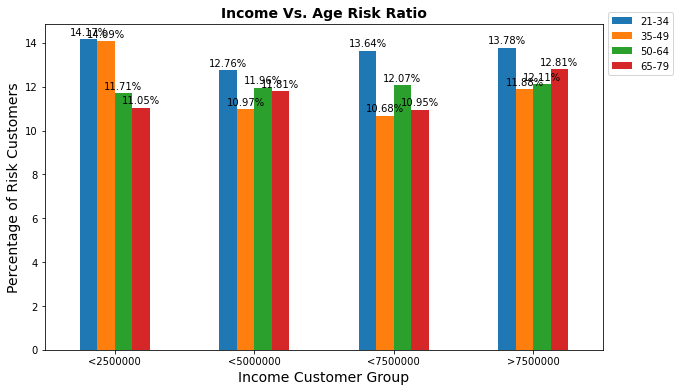

In [172]:
ages_income_rat = Age_stats_df_percentage.reset_index()
ax = ages_income_rat.plot(x="Income_cat", y=['21-34',	'35-49', '50-64', '65-79'], kind="bar", figsize = (10, 6))

plt.xlabel('Income Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Income Vs. Age Risk Ratio', fontweight="bold", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1.05))
for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt='%.2f%%')

plt.show()

#### Kesimpulan Analisa Age Category Terhadap Income Pada Customer Bermasalah

untuk income di bawah 2,500,000 kategori usia 65 - 79 terbaik, tapi untuk kategori income diatas 2,500,000 rentang usia 35-49 adalah yang paling prospektif

#### 7. Analisis Resiko Pada Status dan Income

In [95]:
df.head(1)

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   

            Profession  City           State  Current_Job_Yrs  \
0  Mechanical_engineer  Rewa  Madhya_Pradesh                3   

   Current_House_Yrs  Risk_Flag Job_Duration_cat Experience_cat Income_cat  \
0                 13          0              0-3            0-5   <2500000   

  Age_cat  
0   21-34

In [96]:
Status_stats_df = df.groupby(['Married/Single', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Status_stats_df = Status_stats_df.transpose()

Status_stats_df

Married/Single  married  single
Income_cat                     
<2500000           6679   56281
<5000000           6210   56788
<7500000           6481   56980
>7500000           6358   56223

In [97]:
Status_stats_1 = risk1.groupby(['Married/Single', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Status_stats_1 = Status_stats_1.transpose()

Status_stats_1

Married/Single  married  single
Income_cat                     
<2500000            692    7365
<5000000            786    6704
<7500000            652    6884
>7500000            506    7407

In [98]:
Status_stats_df_percentage = Status_stats_1.div(Status_stats_df, axis=0) * 100
Status_stats_df_percentage

Married/Single  married  single
Income_cat                     
<2500000          10.36   13.09
<5000000          12.66   11.81
<7500000          10.06   12.08
>7500000           7.96   13.17

In [99]:
# Filter the values below 5% using a boolean mask
Status_below_5_percent = Status_stats_df_percentage[Status_stats_df_percentage < 5]

Status_below_5_percent


Married/Single  married  single
Income_cat                     
<2500000            NaN     NaN
<5000000            NaN     NaN
<7500000            NaN     NaN
>7500000            NaN     NaN

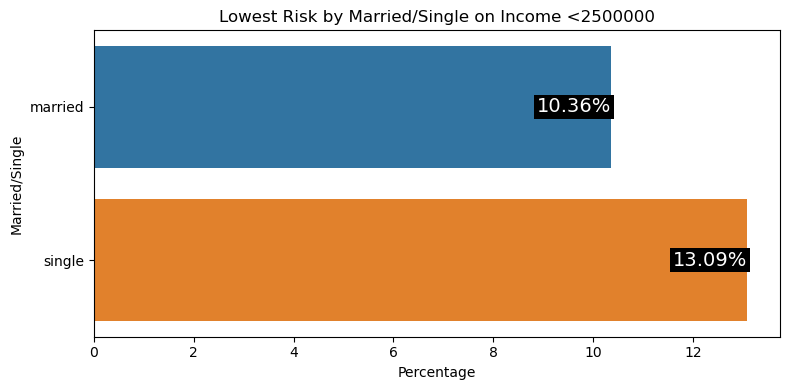

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

# menyiapkan percentMarital Status untuk angka chart
m10 = Status_stats_df_percentage
m10 = m10.T.reset_index()

y_var = 'Married/Single'
income_category = '<2500000'

plt.figure(figsize=(8, 4))
# 10 Lowest Risk Married/Single under '>2,500,000' of income
m10a_low = m10[m10[income_category] > 0].sort_values(by=income_category, ascending=True)

# Create the first subplot for the lowest risk chart
sns.barplot(x=income_category, y=y_var, data=m10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(m10a_low[income_category]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=14, color='white')

plt.title(f'Lowest Risk by {y_var} on Income {income_category}')
plt.xlabel('Percentage')
plt.ylabel(y_var)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


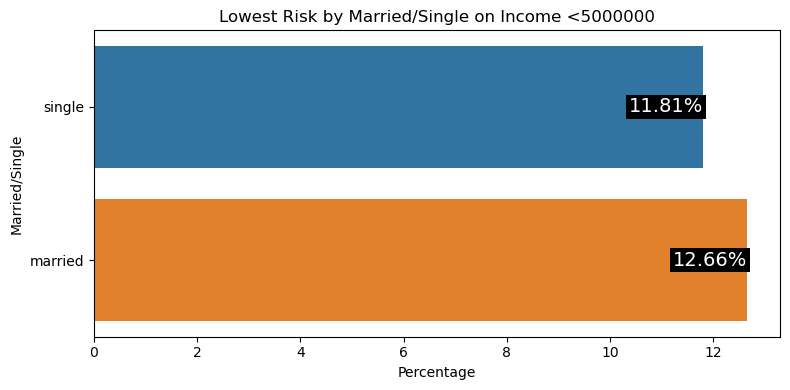

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

# menyiapkan percentMarital Status untuk angka chart
m10 = Status_stats_df_percentage
m10 = m10.T.reset_index()

y_var = 'Married/Single'
income_category = '<5000000'

plt.figure(figsize=(8, 4))
# 10 Lowest Risk Married/Single under '>2,500,000' of income
m10a_low = m10[m10[income_category] > 0].sort_values(by=income_category, ascending=True)

# Create the first subplot for the lowest risk chart
sns.barplot(x=income_category, y=y_var, data=m10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(m10a_low[income_category]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=14, color='white')

plt.title(f'Lowest Risk by {y_var} on Income {income_category}')
plt.xlabel('Percentage')
plt.ylabel(y_var)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


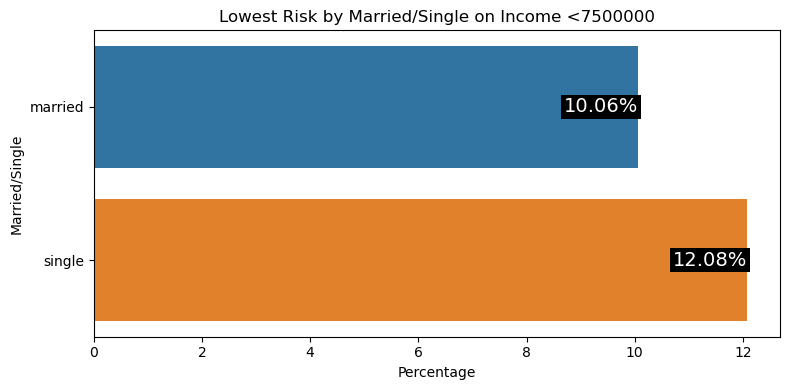

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

# menyiapkan percentMarital Status untuk angka chart
m10 = Status_stats_df_percentage
m10 = m10.T.reset_index()

y_var = 'Married/Single'
income_category = '<7500000'

plt.figure(figsize=(8, 4))
# 10 Lowest Risk Married/Single under '>2,500,000' of income
m10a_low = m10[m10[income_category] > 0].sort_values(by=income_category, ascending=True)

# Create the first subplot for the lowest risk chart
sns.barplot(x=income_category, y=y_var, data=m10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(m10a_low[income_category]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=14, color='white')

plt.title(f'Lowest Risk by {y_var} on Income {income_category}')
plt.xlabel('Percentage')
plt.ylabel(y_var)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


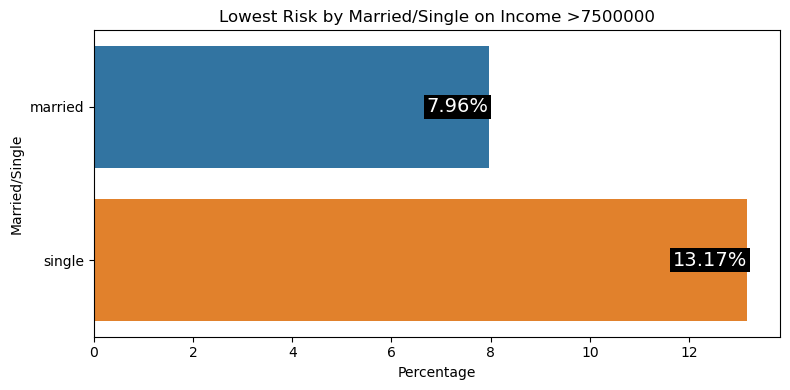

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

# menyiapkan percentMarital Status untuk angka chart
m10 = Status_stats_df_percentage
m10 = m10.T.reset_index()

y_var = 'Married/Single'
income_category = '>7500000'

plt.figure(figsize=(8, 4))
# 10 Lowest Risk Married/Single under '>2,500,000' of income
m10a_low = m10[m10[income_category] > 0].sort_values(by=income_category, ascending=True)

# Create the first subplot for the lowest risk chart
sns.barplot(x=income_category, y=y_var, data=m10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(m10a_low[income_category]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=14, color='white')

plt.title(f'Lowest Risk by {y_var} on Income {income_category}')
plt.xlabel('Percentage')
plt.ylabel(y_var)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


#### Kesimpulan Analisa Status Married/Single Category Terhadap Income Pada Customer Bermasalah

Orang yang menikah lebih prospektif dibanding yang single

#### 8. Analisis Resiko Pada House Ownership dan Income

In [154]:
House_stats_df = df.groupby(['House_Ownership', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
House_stats_df = House_stats_df.transpose()
House_stats_df

House_Ownership  norent_noown  owned  rented
Income_cat                                  
<2500000                 2039   3062   57859
<5000000                 2049   3398   57551
<7500000                 1537   3520   58404
>7500000                 1559   2938   58084

In [155]:
House_stats_1 = risk1.groupby(['House_Ownership', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
House_stats_1 = House_stats_1.transpose()

House_stats_1

House_Ownership  norent_noown  owned  rented
Income_cat                                  
<2500000                  239    380    7438
<5000000                  196    271    7023
<7500000                  157    236    7143
>7500000                  123    273    7517

In [156]:
House_stats_df_percentage = House_stats_1.div(House_stats_df, axis=0) * 100
House_stats_df_percentage

House_Ownership  norent_noown  owned  rented
Income_cat                                  
<2500000                11.72  12.41   12.86
<5000000                 9.57   7.98   12.20
<7500000                10.21   6.70   12.23
>7500000                 7.89   9.29   12.94

In [176]:
# Filter the values below 5% using a boolean mask
House_below_5_percent = House_stats_df_percentage[House_stats_df_percentage < 10]

House_below_5_percent

House_Ownership  norent_noown  owned  rented
Income_cat                                  
<2500000                  NaN    NaN     NaN
<5000000                 9.57   7.98     NaN
<7500000                  NaN   6.70     NaN
>7500000                 7.89   9.29     NaN

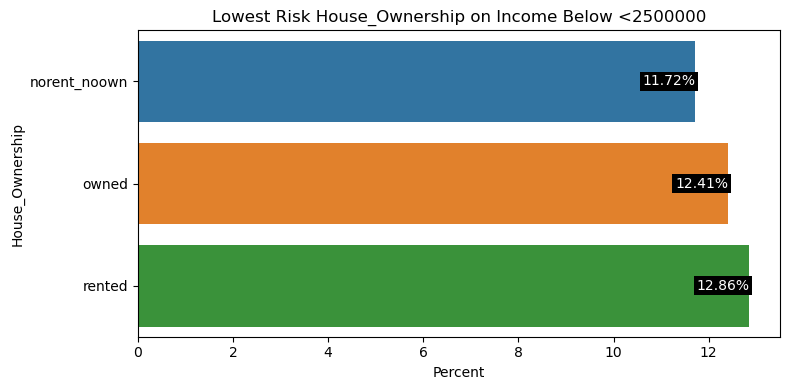

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns

table = 'House_Ownership'
ctg = '<2500000'

# menyiapkan percent {table} untuk angka chart
h10 = House_stats_df_percentage
h10 = h10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 4))

# 10 Lowest Risk {table} under {ctg} of income
h10a_low = h10[h10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
sns.barplot(x=ctg, y=table, data=h10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(h10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)

# 10 Highest Risk House Ownership under '<2500000' of income
h10a_high = h10[h10[ctg] > 0].sort_values(by=ctg, ascending=False).head(10)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


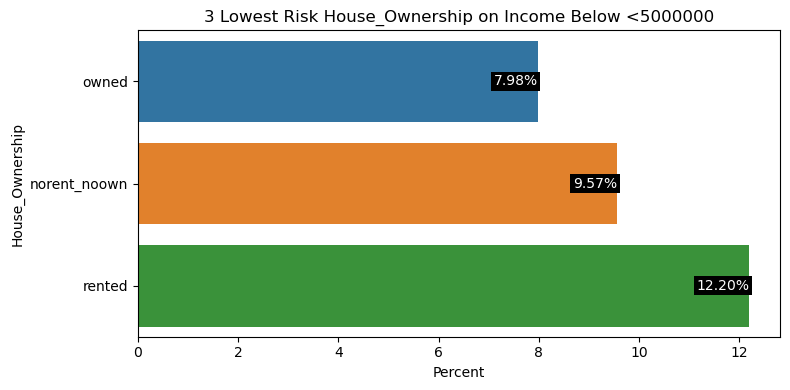

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns

table = 'House_Ownership'
ctg = '<5000000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
h10 = House_stats_df_percentage
h10 = h10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 4))

# 10 Lowest Risk {table} under {ctg} of income
h10a_low = h10[h10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart

sns.barplot(x=ctg, y=table, data=h10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(h10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)

# 10 Highest Risk House Ownership under '<2500000' of income
h10a_high = h10[h10[ctg] > 0].sort_values(by=ctg, ascending=False).head(10)


# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


In [167]:
df[table].nunique()

3

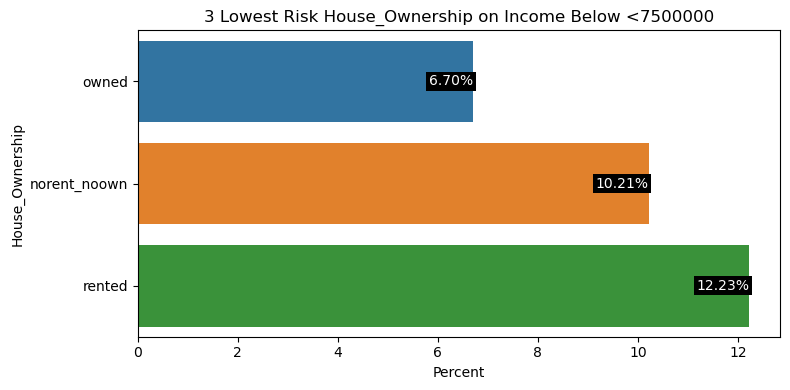

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns


table = 'House_Ownership'
ctg = '<7500000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
h10 = House_stats_df_percentage
h10 = h10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 4))

# 10 Lowest Risk {table} under {ctg} of income
h10a_low = h10[h10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=h10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(h10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


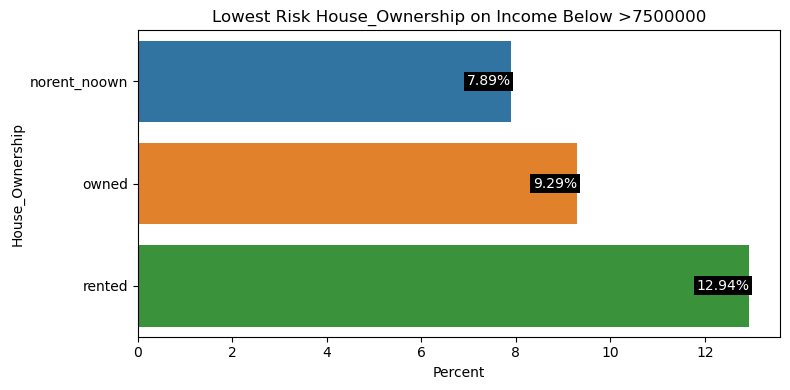

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns

table = 'House_Ownership'
ctg = '>7500000'

# menyiapkan percent {table} untuk angka chart
h10 = House_stats_df_percentage
h10 = h10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 4))

# 10 Lowest Risk {table} under {ctg} of income
h10a_low = h10[h10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=h10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(h10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


In [106]:
# Persentase Kepemilikan Rumah Pada Customer Resiko
house_proportion1 = df.groupby('House_Ownership')['Risk_Flag'].value_counts(normalize=True)[:,1]
house_proportion1

House_Ownership
norent_noown   0.10
owned          0.09
rented         0.13
Name: Risk_Flag, dtype: float64

In [107]:
# Persentase Kepemilikan Rumah Pada Customer Non-Resiko
house_proportion0 = df.groupby('House_Ownership')['Risk_Flag'].value_counts(normalize=True)[:,0]
house_proportion0

House_Ownership
norent_noown   0.90
owned          0.91
rented         0.87
Name: Risk_Flag, dtype: float64

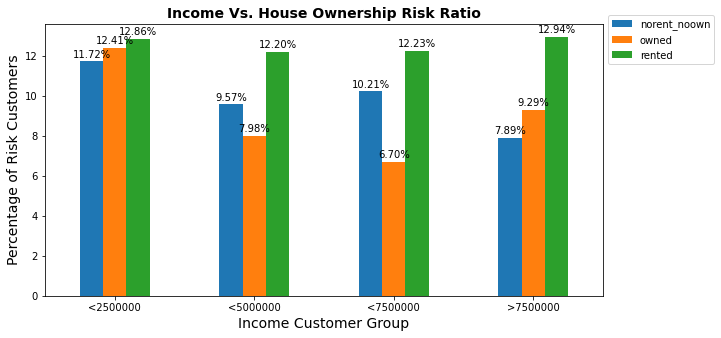

In [177]:
houses_income_rat = House_stats_df_percentage.reset_index()
ax = houses_income_rat.plot(x="Income_cat", y=['norent_noown',	'owned',	'rented'], kind="bar", figsize = (10, 5))

plt.xlabel('Income Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Income Vs. House Ownership Risk Ratio', fontweight="bold", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1.05))
for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt='%.2f%%')

plt.show()

#### Kesimpulan Analisa Status House Ownership Category Terhadap Income Pada Customer Bermasalah

Customer yang berkategori norent_noown paling prospektif, diikuti dengan owned. Sedangkan rented paling tinggi resikonya 

#### 9. Analisis Resiko Pada Car Owned dan Income

In [173]:
Car_stats_df = df.groupby(['Car_Ownership', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Car_stats_df = Car_stats_df.transpose()

Car_stats_df

Car_Ownership     no    yes
Income_cat                 
<2500000       44125  18835
<5000000       43421  19577
<7500000       45016  18445
>7500000       43438  19143

In [174]:
Car_stats_1 = risk1.groupby(['Car_Ownership', 'Income_cat'])['Income_cat'].count().unstack(fill_value=0)
Car_stats_1 = Car_stats_1.transpose()

Car_stats_1

Car_Ownership    no   yes
Income_cat               
<2500000       5698  2359
<5000000       5483  2007
<7500000       5532  2004
>7500000       5848  2065

In [175]:
Car_stats_df_percentage = Car_stats_1.div(Car_stats_df, axis=0) * 100
Car_stats_df_percentage

Car_Ownership    no   yes
Income_cat               
<2500000      12.91 12.52
<5000000      12.63 10.25
<7500000      12.29 10.86
>7500000      13.46 10.79

In [176]:
# Filter the values below 5% using a boolean mask
Car_below_5_percent = Car_stats_df_percentage[Car_stats_df_percentage < 5]

Car_below_5_percent

Car_Ownership  no  yes
Income_cat            
<2500000      NaN  NaN
<5000000      NaN  NaN
<7500000      NaN  NaN
>7500000      NaN  NaN

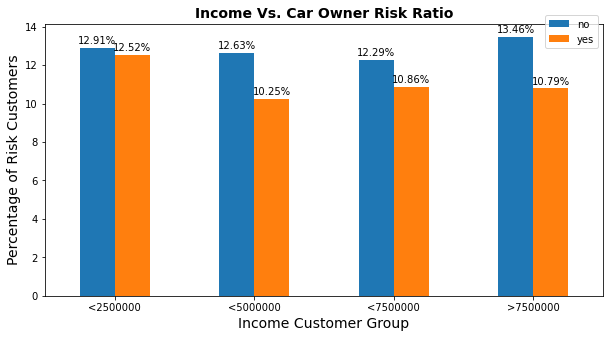

In [179]:
car_income_rat = Car_stats_df_percentage.reset_index()
ax = car_income_rat.plot(x="Income_cat", y=['no', 'yes'], kind="bar", figsize = (10, 5))

plt.xlabel('Income Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Income Vs. Car Owner Risk Ratio', fontweight="bold", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1.05))
for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt='%.2f%%')

plt.show()

In [112]:
Car_proportion1 = df.groupby('Car_Ownership')['Risk_Flag'].value_counts(normalize=True)[:,1]
Car_proportion1

Car_Ownership
no    0.13
yes   0.11
Name: Risk_Flag, dtype: float64

In [113]:
Car_proportion0 = df.groupby('Car_Ownership')['Risk_Flag'].value_counts(normalize=True)[:,0]
Car_proportion0

Car_Ownership
no    0.87
yes   0.89
Name: Risk_Flag, dtype: float64

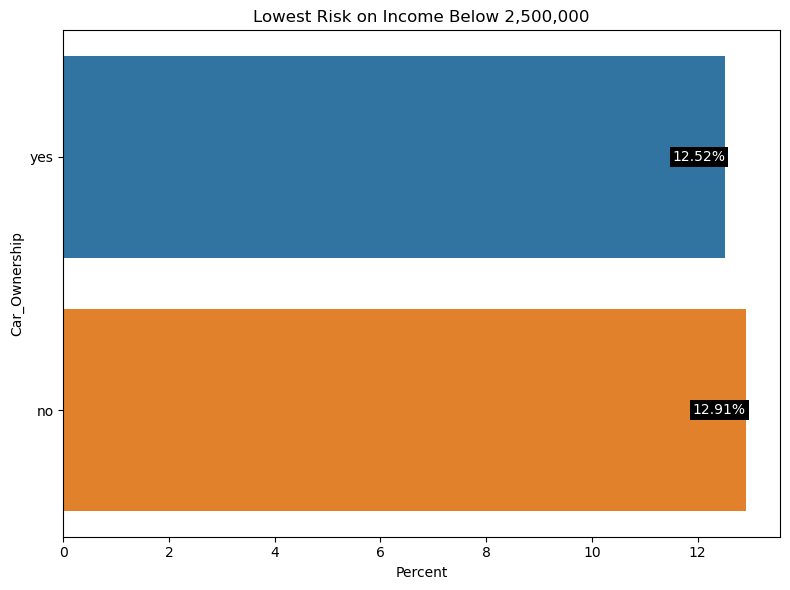

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data in the 'Car_stats_df_percentage' DataFrame

# menyiapkan percent Car Ownership untuk angka chart
car10 = Car_stats_df_percentage
car = car10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 6))

# 10 Lowest Risk Car Ownership under '<2500000' of income
cara_low = car[car['<2500000'] > 0].sort_values(by='<2500000', ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x='<2500000', y='Car_Ownership', data=cara_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(cara_low['<2500000']):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title('Lowest Risk on Income Below 2,500,000')
plt.xlabel('Percent')
plt.ylabel('Car_Ownership')



# # Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


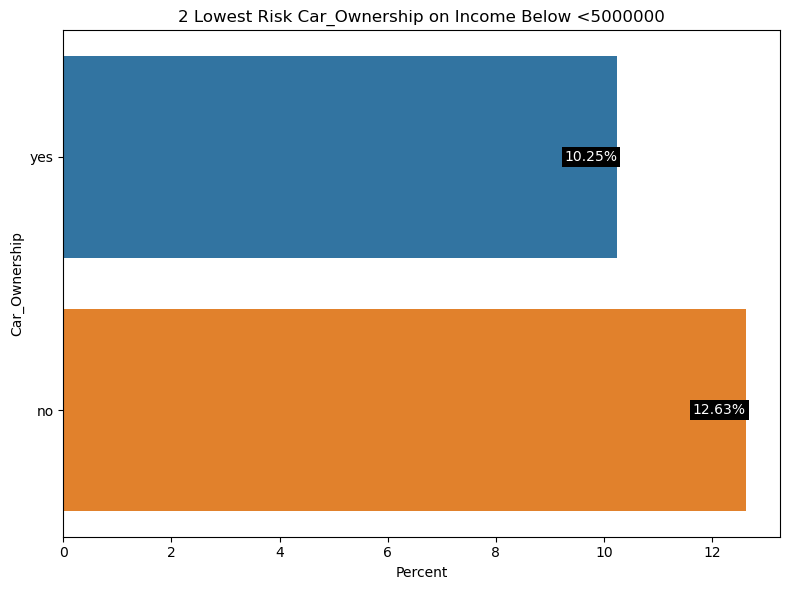

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns


table = 'Car_Ownership'
ctg = '<5000000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
cara10 = Car_stats_df_percentage
cara10 = cara10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 6))

# Lowest Risk {table} under {ctg} of income
cara10a_low = cara10[cara10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=cara10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(cara10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


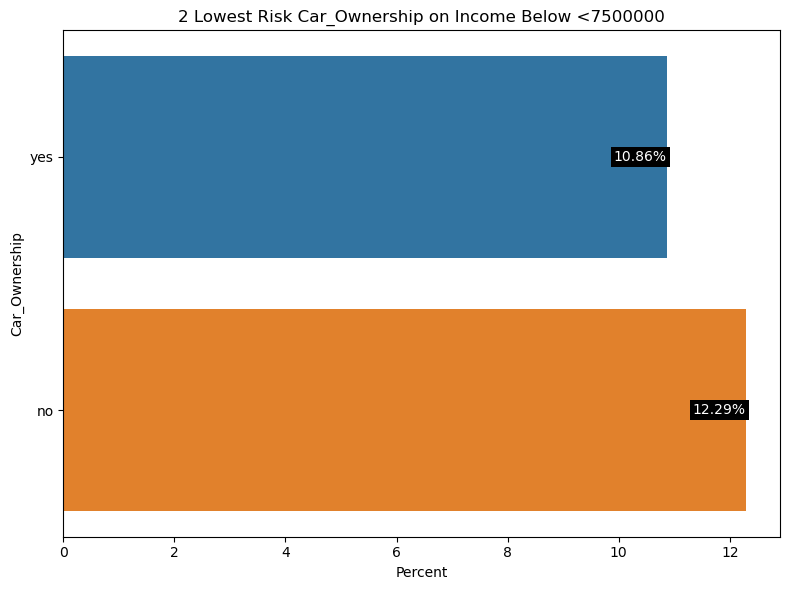

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns


table = 'Car_Ownership'
ctg = '<7500000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
cara10 = Car_stats_df_percentage
cara10 = cara10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 6))

# Lowest Risk {table} under {ctg} of income
cara10a_low = cara10[cara10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=cara10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(cara10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


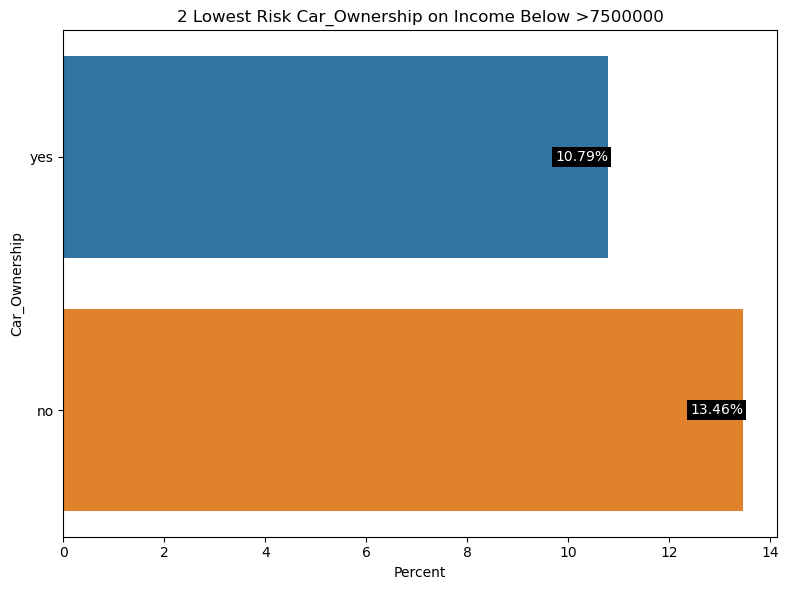

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns


table = 'Car_Ownership'
ctg = '>7500000'
n = df[table].nunique()

# menyiapkan percent {table} untuk angka chart
cara10 = Car_stats_df_percentage
cara10 = cara10.T.reset_index()

# Chart for Income Below 2,500,000
plt.figure(figsize=(8, 6))

# Lowest Risk {table} under {ctg} of income
cara10a_low = cara10[cara10[ctg] > 0].sort_values(by=ctg, ascending=True).head(10)

# Create the first subplot for the lowest risk chart
# plt.subplot(1, 2, 1)
sns.barplot(x=ctg, y=table, data=cara10a_low)

# Add percentages to the bars in the first subplot
for index, value in enumerate(cara10a_low[ctg]):
    plt.text(value, index, f'{value:.2f}%', ha='right', bbox=dict(facecolor='black', edgecolor='none', pad=2), va='center', fontsize=10, color='white')

plt.title(f'{n} Lowest Risk {table} on Income Below {ctg}')
plt.xlabel('Percent')
plt.ylabel(table)



# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


#### Kesimpulan Analisa Car Ownership Category Terhadap Income Pada Customer Bermasalah

Customer dengan Car_Ownership = Yes, memiliki kecendrungan lebih prospektif daripada yang No

#### 10. Mencari Customer Bermasalah pada Kategori Pengangguran / Pensiunan

In [115]:
risk1.eq(0).any()

Id                   False
Income               False
Age                  False
Experience            True
Married/Single       False
House_Ownership      False
Car_Ownership        False
Profession           False
City                 False
State                False
Current_Job_Yrs       True
Current_House_Yrs    False
Risk_Flag            False
Job_Duration_cat     False
Experience_cat       False
Income_cat           False
Age_cat              False
dtype: bool

In [116]:
risk1[risk1['Experience']==0].equals(risk1[risk1['Current_Job_Yrs']==0])


True

In [117]:
Jobless_dfa = df[df['Experience']==0]
Jobless1a = risk1[risk1['Experience']==0]

In [118]:
Jobless1a.describe()

Id     Income     Age  Experience  Current_Job_Yrs  \
count   1582.00    1582.00 1582.00     1582.00          1582.00   
mean  135525.37 5157373.13   46.34        0.00             0.00   
std    76654.30 2998341.12   18.93        0.00             0.00   
min      107.00   18215.00   21.00        0.00             0.00   
25%    69163.00 2162609.00   29.00        0.00             0.00   
50%   142377.00 5663627.00   42.00        0.00             0.00   
75%   211072.50 7908473.00   66.00        0.00             0.00   
max   251901.00 9970052.00   79.00        0.00             0.00   

       Current_House_Yrs  Risk_Flag  
count            1582.00    1582.00  
mean               11.98       1.00  
std                 1.41       0.00  
min                10.00       1.00  
25%                11.00       1.00  
50%                12.00       1.00  
75%                13.00       1.00  
max                14.00       1.00

In [119]:
Jobless_stats_dfa = Jobless_dfa.groupby(['Experience', 'State'])['Income_cat'].count().unstack(fill_value=0)
Jobless_stats1a = Jobless1a.groupby(['Experience', 'State'])['Income_cat'].count().unstack(fill_value=0)

In [120]:
Jobless_stats_dfa

State       Andhra_Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Experience                                                                  
0                     1287    259    889          69           322    281   

State       Gujarat  Haryana  Himachal_Pradesh  Jammu_and_Kashmir  Jharkhand  \
Experience                                                                     
0               505      348                 5                159        451   

State       Karnataka  Kerala  Madhya_Pradesh  Maharashtra  Manipur  Mizoram  \
Experience                                                                     
0                 498     369             610         1049       39       38   

State       Odisha  Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  \
Experience                                                              
0              181          78     155        389       6         422   

State       Telangana  Tripura  Uttar_Pradesh  Uttarakhand  West_Bengal  
Experience                                                               
0                 202       45           1217          167         1003

In [121]:
Jobless_stats1a

State       Andhra_Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Experience                                                                  
0                      211     62    110           2             6      5   

State       Gujarat  Haryana  Himachal_Pradesh  Jammu_and_Kashmir  Jharkhand  \
Experience                                                                     
0                32       34                 2                  2        108   

State       Karnataka  Kerala  Madhya_Pradesh  Maharashtra  Manipur  Odisha  \
Experience                                                                    
0                  35     145             180           81        3      35   

State       Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  Telangana  \
Experience                                                                 
0                   14       9         67       3          46         12   

State       Tripura  Uttar_Pradesh  Uttarakhand  West_Bengal  
Experience                                                    
0                 2            163            4          209

In [122]:
Jobless_stats_df_percentage_a = Jobless_stats1a.div(Jobless_stats_dfa, axis=0) * 100
Jobless_stats_df_percentage_a

State       Andhra_Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Experience                                                                  
0                    16.39  23.94  12.37        2.90          1.86   1.78   

State       Gujarat  Haryana  Himachal_Pradesh  Jammu_and_Kashmir  Jharkhand  \
Experience                                                                     
0              6.34     9.77             40.00               1.26      23.95   

State       Karnataka  Kerala  Madhya_Pradesh  Maharashtra  Manipur  Mizoram  \
Experience                                                                     
0                7.03   39.30           29.51         7.72     7.69      NaN   

State       Odisha  Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  \
Experience                                                              
0            19.34       17.95    5.81      17.22   50.00       10.90   

State       Telangana  Tripura  Uttar_Pradesh  Uttarakhand  West_Bengal  
Experience                                                               
0                5.94     4.44          13.39         2.40        20.84

In [123]:
# Filter the values below 5% using a boolean mask
Jobless_below_5_percent_a = Jobless_stats_df_percentage_a[Jobless_stats_df_percentage_a < 5]

Jobless_below_5_percent_a

State       Andhra_Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  \
Experience                                                                  
0                      NaN    NaN    NaN        2.90          1.86   1.78   

State       Gujarat  Haryana  Himachal_Pradesh  Jammu_and_Kashmir  Jharkhand  \
Experience                                                                     
0               NaN      NaN               NaN               1.26        NaN   

State       Karnataka  Kerala  Madhya_Pradesh  Maharashtra  Manipur  Mizoram  \
Experience                                                                     
0                 NaN     NaN             NaN          NaN      NaN      NaN   

State       Odisha  Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  \
Experience                                                              
0              NaN         NaN     NaN        NaN     NaN         NaN   

State       Telangana  Tripura  Uttar_Pradesh  Uttarakhand  West_Bengal  
Experience                                                               
0                 NaN     4.44            NaN         2.40          NaN

#### Kesimpulan Analisis Terhadap Jobless/Retirement Terhadap Income

State Besar seperti Andhra_Pradesh, West Bengal, Uttar Pradesh & Maharashtra, semua memiliki resiko tinggi untuk kategori Jobless atau Retirement.
Beberapa kota seperti Chandigarh, Chhattisgarh,  Jammu_and_Kashmir, Tripura dan Uttarakhand memiliki resiko dibawah 5%

###  4.2.c. Analisis Age Category Terhadap Feature Yang Lain

#### 1. Age Category vs Married/Single

In [54]:
# Age_cat vs Marital df

ac_marital = df.groupby(['Married/Single', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_marital = ac_marital.transpose()

ac_marital

Married/Single  married  single
Age_cat                        
21-34              6934   58792
35-49              5867   57055
50-64              6354   56775
65-79              6573   53650

In [55]:
# Age_cat vs Marital  Risk1

ac_marital1 = risk1.groupby(['Married/Single', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_marital1 = ac_marital1.transpose()

ac_marital1

Married/Single  married  single
Age_cat                        
21-34               806    8127
35-49               588    6901
50-64               617    6937
65-79               625    6395

In [56]:
# Age_cat vs Marital %

ac_marital_p = ac_marital1.div(ac_marital, axis=0) * 100
ac_marital_p 

Married/Single  married  single
Age_cat                        
21-34             11.62   13.82
35-49             10.02   12.10
50-64              9.71   12.22
65-79              9.51   11.92

In [57]:
ac_marital_below_5 = ac_marital_p [ac_marital_p  < 10]

ac_marital_below_5

Married/Single  married  single
Age_cat                        
21-34               NaN     NaN
35-49               NaN     NaN
50-64              9.71     NaN
65-79              9.51     NaN

In [58]:
acm = ac_marital_p.T.reset_index()
acm


Age_cat Married/Single  21-34  35-49  50-64  65-79
0              married  11.62  10.02   9.71   9.51
1               single  13.82  12.10  12.22  11.92

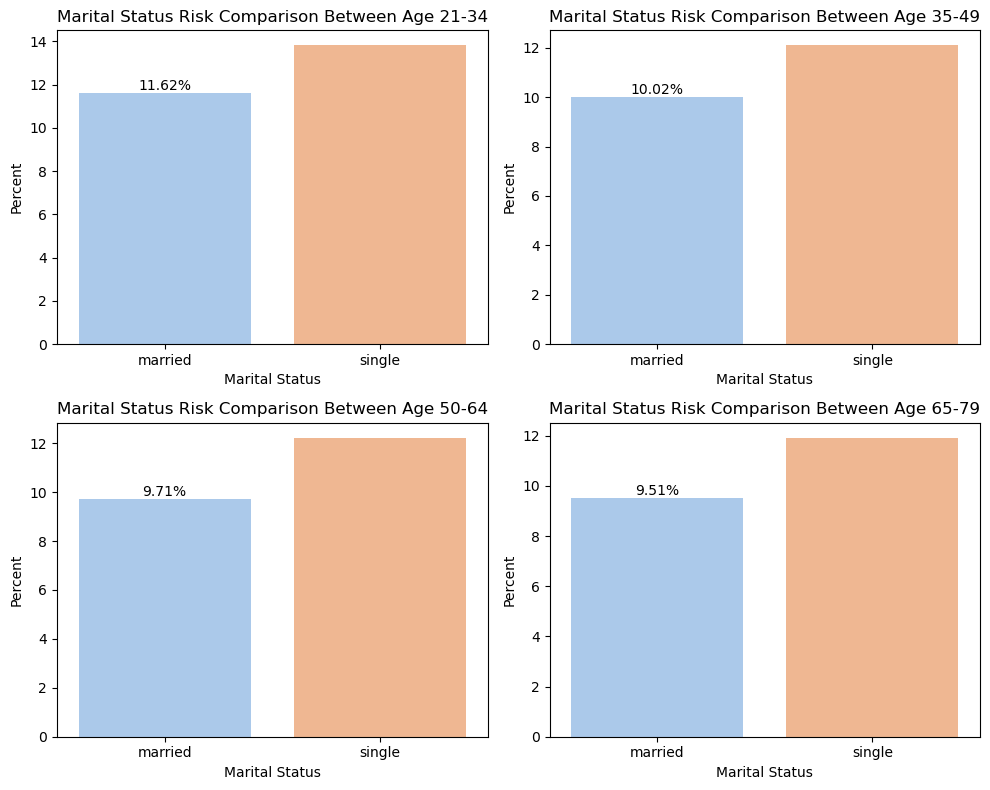

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
     'Age_cat': ['21-34', '35-49', '50-64', '65-79'],
     'married': [11.62, 10.02, 9.71, 9.51],
     'single': [13.82, 12.10, 12.22, 11.92]
}



# Convert data to a DataFrame
status = pd.DataFrame(data)

# Create a 2x2 grid of subplots
plt.figure(figsize=(10, 8))

# List of age groups to iterate through
age_groups = ['21-34', '35-49', '50-64', '65-79']

for i, age_group in enumerate(age_groups, 1):
    # Create a subplot for the current age group
    plt.subplot(2, 2, i)

    # Filter the data for the current age group
    data = status[status['Age_cat'] == age_group]

    # Melt the DataFrame to reshape it for plotting
    data_melted = data.melt(id_vars='Age_cat', var_name='Marital Status', value_name='Percent')

    # Create the bar plot for the current age group and marital status
    sns.barplot(x='Marital Status', y='Percent', data=data_melted, palette='pastel')

    # Add percentages to the bars
    for index, value in enumerate(data['married']):
        plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.title(f'Marital Status Risk Comparison Between Age {age_group}')
    plt.ylabel('Percent')
    plt.xlabel('Marital Status')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


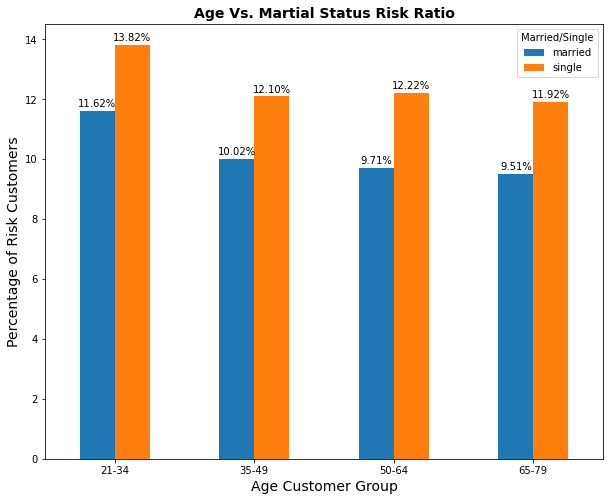

In [63]:
ac_martial_stat = ac_marital_p.reset_index()
ax = ac_martial_stat.plot(x="Age_cat", y=["married", "single"], kind="bar", figsize = (10, 8))

plt.xlabel('Age Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Age Vs. Martial Status Risk Ratio', fontweight="bold", fontsize=14)

for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt='%.2f%%')

plt.show()

#### Kesimpulan Age Category vs Terhadap Married/Single

Customer yang telah menikah memiliki resiko lebih kecil

#### 2. Age Category vs House_Ownership

In [283]:
df.head(1)

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   

            Profession  CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer  Rewa  Madhya_Pradesh                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0

In [64]:
# Age_cat vs House Ownership df

ac_house = df.groupby(['House_Ownership', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_house = ac_house.transpose()

ac_house

House_Ownership  norent_noown  owned  rented
Age_cat                                     
21-34                    1956   3045   60725
35-49                    1648   3003   58271
50-64                    1761   3609   57759
65-79                    1819   3261   55143

In [65]:
# Age_cat vs House Ownership risk

ac_house1 = risk1.groupby(['House_Ownership', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_house1 = ac_house1.transpose()

ac_house1

House_Ownership  norent_noown  owned  rented
Age_cat                                     
21-34                     154    278    8501
35-49                     216    320    6953
50-64                     158    274    7122
65-79                     187    288    6545

In [66]:
# Age_cat vs Marital %

ac_house_p = ac_house1.div(ac_house, axis=0) * 100
ac_house_p 

House_Ownership  norent_noown  owned  rented
Age_cat                                     
21-34                    7.87   9.13   14.00
35-49                   13.11  10.66   11.93
50-64                    8.97   7.59   12.33
65-79                   10.28   8.83   11.87

In [67]:
ac_house_below_5 = ac_house_p [ac_house_p  < 10]

ac_house_below_5

House_Ownership  norent_noown  owned  rented
Age_cat                                     
21-34                    7.87   9.13     NaN
35-49                     NaN    NaN     NaN
50-64                    8.97   7.59     NaN
65-79                     NaN   8.83     NaN

In [68]:
ac_house_p.reset_index()

House_Ownership Age_cat  norent_noown  owned  rented
0                 21-34          7.87   9.13   14.00
1                 35-49         13.11  10.66   11.93
2                 50-64          8.97   7.59   12.33
3                 65-79         10.28   8.83   11.87

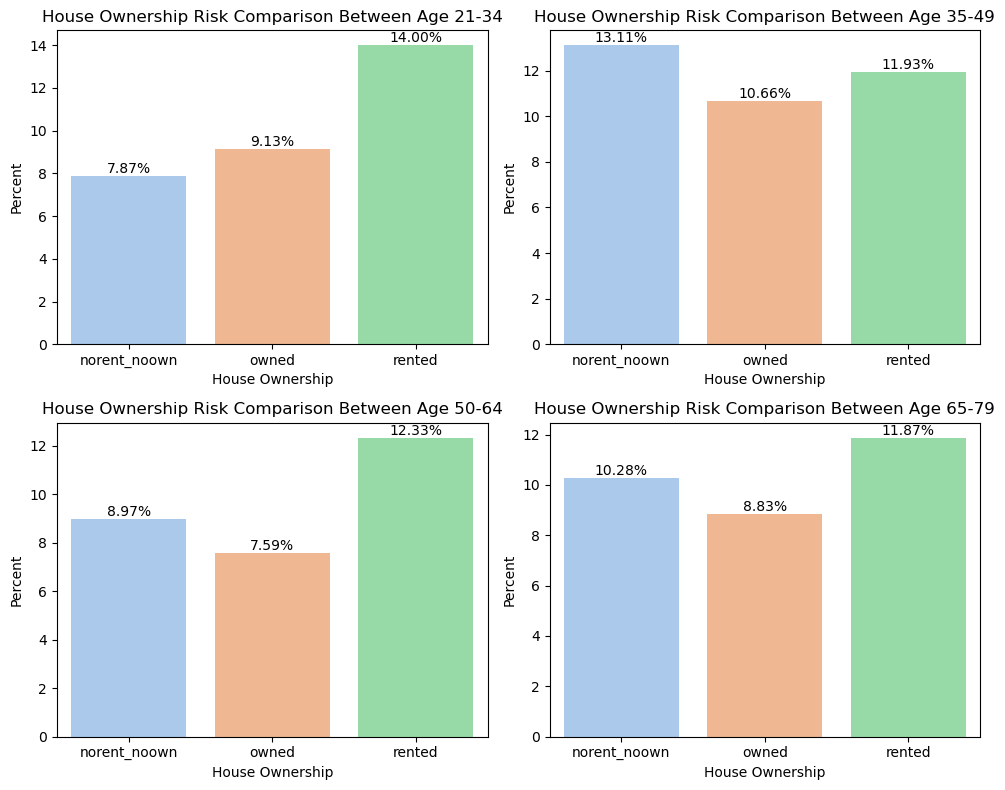

In [301]:

# Data
data = {
    'Age_cat': ['21-34', '35-49', '50-64', '65-79'],
    'norent_noown': [7.87, 13.11, 8.97, 10.28],
    'owned': [9.13, 10.66, 7.59, 8.83],
    'rented': [14.00, 11.93, 12.33, 11.87]
}

# Convert data to a DataFrame
houseo = pd.DataFrame(data)

# Create a 2x2 grid of subplots
plt.figure(figsize=(10, 8))

# List of age groups to iterate through
age_groups = ['21-34', '35-49', '50-64', '65-79']

for i, age_group in enumerate(age_groups, 1):
    # Create a subplot for the current age group
    plt.subplot(2, 2, i)

    # Filter the data for the current age group
    data = houseo[houseo['Age_cat'] == age_group]

    # Melt the DataFrame to reshape it for plotting
    data_melted = data.melt(id_vars='Age_cat', var_name='House_Ownership', value_name='Percent')

    # Create the bar plot for the current age group and house ownership
    sns.barplot(x='House_Ownership', y='Percent', data=data_melted, palette='pastel')

    # Add percentages to the bars
    for index, value in enumerate(data_melted['Percent']):
        plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.title(f'House Ownership Risk Comparison Between Age {age_group}')
    plt.ylabel('Percent')
    plt.xlabel('House Ownership')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


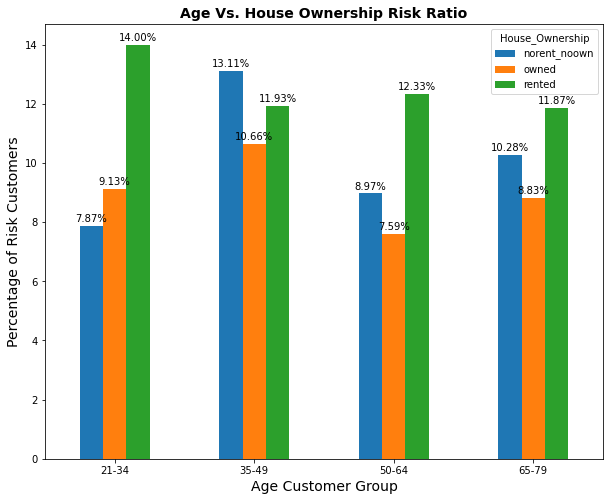

In [69]:
house_age_rat = ac_house_p.reset_index()
ax = house_age_rat.plot(x="Age_cat", y=['norent_noown', 'owned', 'rented'], kind="bar", figsize = (10, 8))

plt.xlabel('Age Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Age Vs. House Ownership Risk Ratio', fontweight="bold", fontsize=14)

for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt='%.2f%%')

plt.show()

#### Kesimpulan Terhadap Age_cat vs House_Ownership
no_rent_noown terbaik pada kategori Age 21-34, tetapi secara mutlak owned lebih prospektif

#### 3. Age Category vs Car_Ownership

In [70]:
# Age_cat vs Car Ownership df

ac_car = df.groupby(['Car_Ownership', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_car = ac_car.transpose()

ac_car

Car_Ownership     no    yes
Age_cat                    
21-34          46882  18844
35-49          42774  20148
50-64          44498  18631
65-79          41846  18377

In [71]:
# Age_cat vs Car Ownership risk

ac_car1 = risk1.groupby(['Car_Ownership', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_car1 = ac_car1.transpose()

ac_car1

Car_Ownership    no   yes
Age_cat                  
21-34          6764  2169
35-49          5351  2138
50-64          5394  2160
65-79          5052  1968

In [72]:
# Age_cat vs Car Ownership Ratio

ac_car_p = ac_car1.div(ac_car, axis=0) * 100
ac_car_p 

Car_Ownership    no   yes
Age_cat                  
21-34         14.43 11.51
35-49         12.51 10.61
50-64         12.12 11.59
65-79         12.07 10.71

In [73]:
ac_car = ac_car_p.T.reset_index()
ac_car

Age_cat Car_Ownership  21-34  35-49  50-64  65-79
0                  no  14.43  12.51  12.12  12.07
1                 yes  11.51  10.61  11.59  10.71

In [74]:
ac_car_below_5 = ac_car_p [ac_car_p  < 10]

ac_car_below_5

Car_Ownership  no  yes
Age_cat               
21-34         NaN  NaN
35-49         NaN  NaN
50-64         NaN  NaN
65-79         NaN  NaN

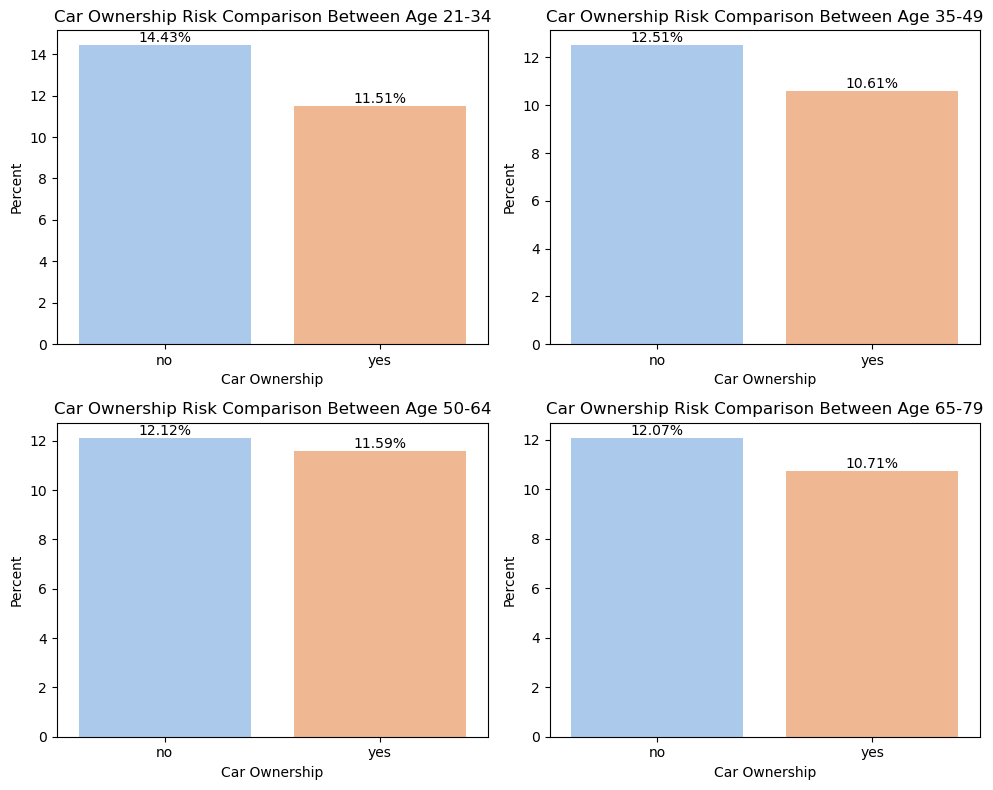

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Age_cat': ['21-34', '35-49', '50-64', '65-79'],
    'no': [14.43, 12.51, 12.12, 12.07],
    'yes': [11.51, 10.61, 11.59, 10.71]
}

# Convert data to a DataFrame
car_owned = pd.DataFrame(data)

# Create a 2x2 grid of subplots
plt.figure(figsize=(10, 8))

# List of age groups to iterate through
age_groups = ['21-34', '35-49', '50-64', '65-79']

for i, age_group in enumerate(age_groups, 1):
    # Create a subplot for the current age group
    plt.subplot(2, 2, i)

    # Filter the data for the current age group
    data = car_owned[car_owned['Age_cat'] == age_group]

    # Melt the DataFrame to reshape it for plotting
    data_melted = data.melt(id_vars='Age_cat', var_name='Car_Ownership', value_name='Percent')

    # Create the bar plot for the current age group and car ownership
    sns.barplot(x='Car_Ownership', y='Percent', data=data_melted, palette='pastel')

    # Add percentages to the bars
    for index, value in enumerate(data_melted['Percent']):
        plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.title(f'Car Ownership Risk Comparison Between Age {age_group}')
    plt.ylabel('Percent')
    plt.xlabel('Car Ownership')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


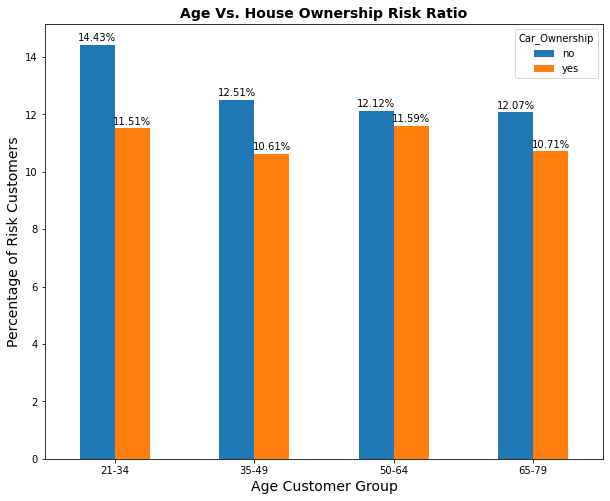

In [75]:
age_car_rat = ac_car_p.reset_index()
ax = age_car_rat.plot(x="Age_cat", y=['no', 'yes'], kind="bar", figsize = (10, 8))

plt.xlabel('Age Customer Group', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Age Vs. House Ownership Risk Ratio', fontweight="bold", fontsize=14)

for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt='%.2f%%')

plt.show()

#### Kesimpulan Age_Cat vs Car_Ownership

Customer dengan kepemilkan mobil lebih minim resiko dibanding yang tidak memiliki mobil.

####  4. Age Category vs Profession

In [76]:
# Age_cat vs Profession df
ac_profession = df.groupby(['Profession', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_profession = ac_profession.transpose()

ac_profession

Profession  Air_traffic_controller  Analyst  Architect  Army_officer  Artist  \
Age_cat                                                                        
21-34                         1410     1638       1457          1224    1147   
35-49                         1085     1015       1135           952    1176   
50-64                         1599      882       1034          1142    1217   
65-79                         1187     1133       1031          1343    1321   

Profession  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
Age_cat                                                                
21-34           919                 1529                  1103  1221   
35-49          1297                 1040                   955  1164   
50-64          1485                 1488                  1117  1271   
65-79          1057                 1070                  1318   979   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
Age_cat                                                                  
21-34                    1138            1376            882      1615   
35-49                    1573            1127            958      1271   
50-64                    1349            1193           1393      1081   
65-79                    1145             920           1180      1292   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
Age_cat                                                                 
21-34                             1576               1022        1229   
35-49                             1541               1238        1348   
50-64                             1104               1323        1317   
65-79                             1151               1407         914   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
Age_cat                                                                        
21-34          1158             1201      1039     1270       1097       977   
35-49          1019             1120      1229     1311       1064      1042   
50-64          1292             1198      1419     1329       1265       949   
65-79          1313             1210       911     1449       1147      1080   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
Age_cat                                                        
21-34                   1180               1073         1339   
35-49                   1526               1262          983   
50-64                   1320               1332         1288   
65-79                   1278               1500          897   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
Age_cat                                                                    
21-34                   1632        932              1395           1293   
35-49                   1253       1304              1326           1294   
50-64                   1085       1117              1378            832   
65-79                   1158       1319              1067           1759   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
Age_cat                                                          
21-34                      1429    1386       1467        1404   
35-49                      1353    1148        955        1445   
50-64                      1097    1327       1276        1485   
65-79                      1371     957        930        1023   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
Age_cat                                                                         
21-34                      1424            1118      1283                1322   
35-49                      1355            1688      1001                1335   
50-64                      1344            1045       873                1149   
65-79                      1094            1030       930                1235

In [77]:
# Age_cat vs Profession risk
ac_profession1 = risk1.groupby(['Profession', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_profession1 = ac_profession1.transpose()

ac_profession1

Profession  Air_traffic_controller  Analyst  Architect  Army_officer  Artist  \
Age_cat                                                                        
21-34                          179      258        230           157     145   
35-49                          238      112        153           188     114   
50-64                          212       49        119           217     137   
65-79                           86      148        109           147     200   

Profession  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
Age_cat                                                                
21-34           136                  152                   295   178   
35-49           142                  103                   130   142   
50-64           219                  289                   114   143   
65-79           145                  110                   151   100   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
Age_cat                                                                  
21-34                     119             169            163       212   
35-49                     213             183             95       114   
50-64                     115             131            163        96   
65-79                     134             144             90       207   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
Age_cat                                                                 
21-34                              234                167         224   
35-49                              225                194         139   
50-64                              106                125         149   
65-79                              125                133          90   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
Age_cat                                                                        
21-34           150              137       109      218        163        93   
35-49           127              126        80       98         54       115   
50-64           107              109       239       87        125       201   
65-79           140              134        74      202        112        69   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
Age_cat                                                        
21-34                    154                 82          212   
35-49                    156                164           87   
50-64                    138                140          200   
65-79                    164                147          113   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
Age_cat                                                                    
21-34                    190        155               176            188   
35-49                    216        184               140            191   
50-64                    137        139               148            111   
65-79                     91        196               132            211   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
Age_cat                                                          
21-34                       155     176        138         168   
35-49                       157     139        123         140   
50-64                        61     196        143         144   
65-79                       145     113        117         191   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
Age_cat                                                                         
21-34                       138             186       144                  96   
35-49                       125             211       145                 154   
50-64                       185             116       108                 106   
65-79                       134              94       158                  73

In [78]:
# Age_cat vs Profession Ratio

ac_profession_p = ac_profession1.div(ac_profession, axis=0) * 100
ac_profession_p 

Profession  Air_traffic_controller  Analyst  Architect  Army_officer  Artist  \
Age_cat                                                                        
21-34                        12.70    15.75      15.79         12.83   12.64   
35-49                        21.94    11.03      13.48         19.75    9.69   
50-64                        13.26     5.56      11.51         19.00   11.26   
65-79                         7.25    13.06      10.57         10.95   15.14   

Profession  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
Age_cat                                                                
21-34         14.80                 9.94                 26.75 14.58   
35-49         10.95                 9.90                 13.61 12.20   
50-64         14.75                19.42                 10.21 11.25   
65-79         13.72                10.28                 11.46 10.21   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
Age_cat                                                                  
21-34                   10.46           12.28          18.48     13.13   
35-49                   13.54           16.24           9.92      8.97   
50-64                    8.52           10.98          11.70      8.88   
65-79                   11.70           15.65           7.63     16.02   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
Age_cat                                                                 
21-34                            14.85              16.34       18.23   
35-49                            14.60              15.67       10.31   
50-64                             9.60               9.45       11.31   
65-79                            10.86               9.45        9.85   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
Age_cat                                                                        
21-34         12.95            11.41     10.49    17.17      14.86      9.52   
35-49         12.46            11.25      6.51     7.48       5.08     11.04   
50-64          8.28             9.10     16.84     6.55       9.88     21.18   
65-79         10.66            11.07      8.12    13.94       9.76      6.39   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
Age_cat                                                        
21-34                  13.05               7.64        15.83   
35-49                  10.22              13.00         8.85   
50-64                  10.45              10.51        15.53   
65-79                  12.83               9.80        12.60   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
Age_cat                                                                    
21-34                  11.64      16.63             12.62          14.54   
35-49                  17.24      14.11             10.56          14.76   
50-64                  12.63      12.44             10.74          13.34   
65-79                   7.86      14.86             12.37          12.00   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
Age_cat                                                          
21-34                     10.85   12.70       9.41       11.97   
35-49                     11.60   12.11      12.88        9.69   
50-64                      5.56   14.77      11.21        9.70   
65-79                     10.58   11.81      12.58       18.67   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
Age_cat                                                                         
21-34                      9.69           16.64     11.22                7.26   
35-49                      9.23           12.50     14.49               11.54   
50-64                     13.76           11.10     12.37                9.23   
65-79                     12.25            9.13     16.99                5.91

In [79]:
ac_profession_p = ac_profession_p
ac_profession_p

Profession  Air_traffic_controller  Analyst  Architect  Army_officer  Artist  \
Age_cat                                                                        
21-34                        12.70    15.75      15.79         12.83   12.64   
35-49                        21.94    11.03      13.48         19.75    9.69   
50-64                        13.26     5.56      11.51         19.00   11.26   
65-79                         7.25    13.06      10.57         10.95   15.14   

Profession  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
Age_cat                                                                
21-34         14.80                 9.94                 26.75 14.58   
35-49         10.95                 9.90                 13.61 12.20   
50-64         14.75                19.42                 10.21 11.25   
65-79         13.72                10.28                 11.46 10.21   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
Age_cat                                                                  
21-34                   10.46           12.28          18.48     13.13   
35-49                   13.54           16.24           9.92      8.97   
50-64                    8.52           10.98          11.70      8.88   
65-79                   11.70           15.65           7.63     16.02   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
Age_cat                                                                 
21-34                            14.85              16.34       18.23   
35-49                            14.60              15.67       10.31   
50-64                             9.60               9.45       11.31   
65-79                            10.86               9.45        9.85   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
Age_cat                                                                        
21-34         12.95            11.41     10.49    17.17      14.86      9.52   
35-49         12.46            11.25      6.51     7.48       5.08     11.04   
50-64          8.28             9.10     16.84     6.55       9.88     21.18   
65-79         10.66            11.07      8.12    13.94       9.76      6.39   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
Age_cat                                                        
21-34                  13.05               7.64        15.83   
35-49                  10.22              13.00         8.85   
50-64                  10.45              10.51        15.53   
65-79                  12.83               9.80        12.60   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
Age_cat                                                                    
21-34                  11.64      16.63             12.62          14.54   
35-49                  17.24      14.11             10.56          14.76   
50-64                  12.63      12.44             10.74          13.34   
65-79                   7.86      14.86             12.37          12.00   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
Age_cat                                                          
21-34                     10.85   12.70       9.41       11.97   
35-49                     11.60   12.11      12.88        9.69   
50-64                      5.56   14.77      11.21        9.70   
65-79                     10.58   11.81      12.58       18.67   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
Age_cat                                                                         
21-34                      9.69           16.64     11.22                7.26   
35-49                      9.23           12.50     14.49               11.54   
50-64                     13.76           11.10     12.37                9.23   
65-79                     12.25            9.13     16.99                5.91

In [80]:
ac_profession_below_5 = ac_profession_p [ac_profession_p  < 10]

ac_profession_below_5

Profession  Air_traffic_controller  Analyst  Architect  Army_officer  Artist  \
Age_cat                                                                        
21-34                          NaN      NaN        NaN           NaN     NaN   
35-49                          NaN      NaN        NaN           NaN    9.69   
50-64                          NaN     5.56        NaN           NaN     NaN   
65-79                         7.25      NaN        NaN           NaN     NaN   

Profession  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
Age_cat                                                                
21-34           NaN                 9.94                   NaN   NaN   
35-49           NaN                 9.90                   NaN   NaN   
50-64           NaN                  NaN                   NaN   NaN   
65-79           NaN                  NaN                   NaN   NaN   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
Age_cat                                                                  
21-34                     NaN             NaN            NaN       NaN   
35-49                     NaN             NaN           9.92      8.97   
50-64                    8.52             NaN            NaN      8.88   
65-79                     NaN             NaN           7.63       NaN   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
Age_cat                                                                 
21-34                              NaN                NaN         NaN   
35-49                              NaN                NaN         NaN   
50-64                             9.60               9.45         NaN   
65-79                              NaN               9.45        9.85   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
Age_cat                                                                        
21-34           NaN              NaN       NaN      NaN        NaN      9.52   
35-49           NaN              NaN      6.51     7.48       5.08       NaN   
50-64          8.28             9.10       NaN     6.55       9.88       NaN   
65-79           NaN              NaN      8.12      NaN       9.76      6.39   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
Age_cat                                                        
21-34                    NaN               7.64          NaN   
35-49                    NaN                NaN         8.85   
50-64                    NaN                NaN          NaN   
65-79                    NaN               9.80          NaN   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
Age_cat                                                                    
21-34                    NaN        NaN               NaN            NaN   
35-49                    NaN        NaN               NaN            NaN   
50-64                    NaN        NaN               NaN            NaN   
65-79                   7.86        NaN               NaN            NaN   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
Age_cat                                                          
21-34                       NaN     NaN       9.41         NaN   
35-49                       NaN     NaN        NaN        9.69   
50-64                      5.56     NaN        NaN        9.70   
65-79                       NaN     NaN        NaN         NaN   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
Age_cat                                                                         
21-34                      9.69             NaN       NaN                7.26   
35-49                      9.23             NaN       NaN                 NaN   
50-64                       NaN             NaN       NaN                9.23   
65-79                       NaN            9.13       NaN                5.91

In [81]:
ac_pro = ac_profession_p.reset_index()
ac_pro

Profession Age_cat  Air_traffic_controller  Analyst  Architect  Army_officer  \
0            21-34                   12.70    15.75      15.79         12.83   
1            35-49                   21.94    11.03      13.48         19.75   
2            50-64                   13.26     5.56      11.51         19.00   
3            65-79                    7.25    13.06      10.57         10.95   

Profession  Artist  Aviator  Biomedical_Engineer  Chartered_Accountant  Chef  \
0            12.64    14.80                 9.94                 26.75 14.58   
1             9.69    10.95                 9.90                 13.61 12.20   
2            11.26    14.75                19.42                 10.21 11.25   
3            15.14    13.72                10.28                 11.46 10.21   

Profession  Chemical_engineer  Civil_engineer  Civil_servant  Comedian  \
0                       10.46           12.28          18.48     13.13   
1                       13.54           16.24           9.92      8.97   
2                        8.52           10.98          11.70      8.88   
3                       11.70           15.65           7.63     16.02   

Profession  Computer_hardware_engineer  Computer_operator  Consultant  \
0                                14.85              16.34       18.23   
1                                14.60              15.67       10.31   
2                                 9.60               9.45       11.31   
3                                10.86               9.45        9.85   

Profession  Dentist  Design_Engineer  Designer  Drafter  Economist  Engineer  \
0             12.95            11.41     10.49    17.17      14.86      9.52   
1             12.46            11.25      6.51     7.48       5.08     11.04   
2              8.28             9.10     16.84     6.55       9.88     21.18   
3             10.66            11.07      8.12    13.94       9.76      6.39   

Profession  Fashion_Designer  Financial_Analyst  Firefighter  \
0                      13.05               7.64        15.83   
1                      10.22              13.00         8.85   
2                      10.45              10.51        15.53   
3                      12.83               9.80        12.60   

Profession  Flight_attendant  Geologist  Graphic_Designer  Hotel_Manager  \
0                      11.64      16.63             12.62          14.54   
1                      17.24      14.11             10.56          14.76   
2                      12.63      12.44             10.74          13.34   
3                       7.86      14.86             12.37          12.00   

Profession  Industrial_Engineer  Lawyer  Librarian  Magistrate  \
0                         10.85   12.70       9.41       11.97   
1                         11.60   12.11      12.88        9.69   
2                          5.56   14.77      11.21        9.70   
3                         10.58   11.81      12.58       18.67   

Profession  Mechanical_engineer  Microbiologist  Official  Petroleum_Engineer  \
0                          9.69           16.64     11.22                7.26   
1                          9.23           12.50     14.49               11.54   
2                         13.76           11.10     12.37                9.23   
3                         12.25            9.13     16.99                5.91   

Profession  Physician  Police_officer  Politician  Psychologist  Scientist  \
0               12.11           21.96       14.67         16.97      16.16   
1                9.35            9.10       11.37          8.41      17.20   
2               10.11           18.91        9.11         10.47       7.11   
3               15.53           13.67       10.05         12.42      17.67   

Profession  Secretary  Software_Developer  Statistician  Surgeon  Surveyor  \
0               12.68               15.26         16.95    14.67     10.29   
1                9.04               21.44          7.16    10.01     18.07

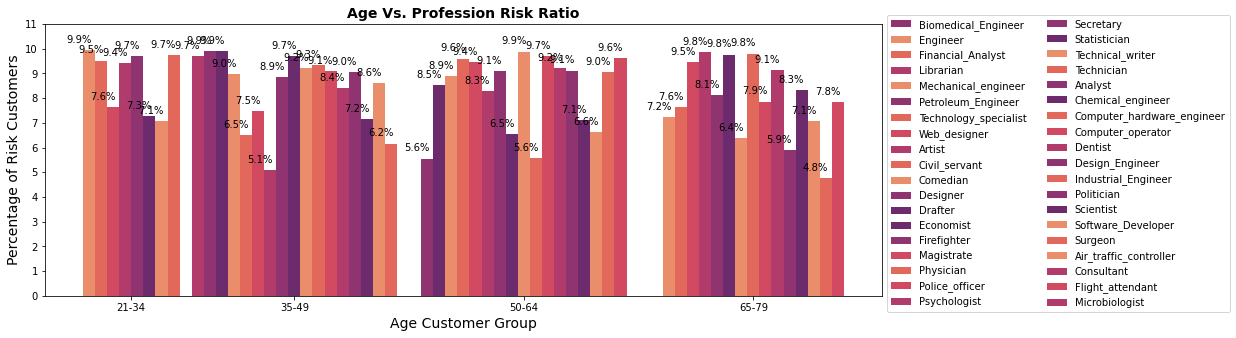

In [125]:
lol = ac_profession_below_5.reset_index()
lol= lol.drop(['Age_cat'], axis=1)
fig, axc = plt.subplots(figsize=(15,5))
ax = plt.gca()
# width of bars
width = 1
x_ticks, x_ticks_pos = [], []
age_cat = ['21-34', '35-49', '50-64', '65-79']
# counter for helping with x tick positions
count = 0
lol = lol.reset_index()
# go through each row of the dataframe
for idx, row in lol.iterrows():
    # this will be the first bar position for this row
    count += idx

    # this will be the start of the first bar for this row
    start_idx = count - width / 2
    # this will be the end of the last bar for this row
    end_idx = start_idx
    # for each column in the wanted columns,
    # if the row is not null,
    # add the bar to the plot
    # also update the end position of the bars for this row
    colors = sns.color_palette("flare")
    for column in lol.drop(["index"], axis=1).columns:
        if row[column] == row[column]:
            plot = plt.bar(count, row[column], width=width, label=column, color=colors[count % len(colors)])
            count += 1
            end_idx += width
            for p in plot.patches:
                x = p.get_x()+0.7
                z = p.get_height()+0.3
                label = '{:.1f}%'.format(p.get_height())
                plt.annotate(label, (x, z),ha='right', fontsize=10)
    # this checks if the row had any not NULL value in the desired columns
    # in other words, it checks if there was any bar for this row
    # if yes, add the center of all the row's bars and the row's name (A,B,C) to the respective lists
    if end_idx != start_idx:
        x_ticks_pos.append((end_idx + start_idx) / 2)
        x_ticks.append(row["index"])


plt.xticks(x_ticks_pos, age_cat)
plt.yticks(range(0,12,1),[str(i) for i in range(0,12,1)])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2,  bbox_to_anchor=(1, 1.05))
plt.xlabel('Age Customer Group', fontsize=14)
plt.ylabel('Percentage of Risk Customers', fontsize=14)
plt.title('Age Vs. Profession Risk Ratio', fontweight="bold", fontsize=14)
#Label tiap category
plt.show()

#### Kesimpulan Terhadap Profession
1. Technology Specialist 65 - 79 dengan 4.77%

#### 5. Age  Category vs City

In [ ]:
# Age_cat vs City df
ac_city = df.groupby(['City', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_city = ac_city.transpose()

ac_city

In [ ]:
# Age_cat vs City risk
ac_city1 = risk1.groupby(['City', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_city1 = ac_city1.transpose()

ac_city1

In [ ]:
# Age_cat vs City Ratio

ac_city_p = ac_city1.div(ac_city, axis=0) * 100
ac_city_p 

In [ ]:
ac_city_below_5 = ac_city_p[ac_city_p  < 5]

ac_city_below_5

#### Kesimpulan Terhadap City
5 kota besar di India :

1. Mumbai (Maharashtra)  : semua diatas 5%
2. Delhi (National Capital Territory of Delhi) : semua diatas 5%
3. Bangalore (Karnataka) : 21-34 (3.73%), 35-49 (1.53%), 65-79 (4.59%)
4. Hyderabad (Telangana) : 50-64  (2.12%), 65-79 (2.11%)
5. Ahmedabad (Gujarat): 34-49 (3.39%)

#### 6. Age Category vs State

In [ ]:
# Age_cat vs State df
ac_state = df.groupby(['State', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_state = ac_state.transpose()

ac_state

In [ ]:
# Age_cat vs State risk
ac_state1 = risk1.groupby(['State', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_state1 = ac_state1.transpose()

ac_state1

In [ ]:
# Age_cat vs State Ratio

ac_state_p = ac_state1.div(ac_state, axis=0) * 100
ac_state_p 

In [ ]:
ac_state_below_5 = ac_state_p [ac_state_p  < 5]

ac_state_below_5

#### 7. Age Category  vs Job Duration Cat

In [ ]:
# Age_cat vs Job Duration df
ac_jobd = df.groupby(['Job_Duration_cat', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_jobd = ac_jobd.transpose()

ac_jobd

In [ ]:
# Age_cat vs Job Duration risk
ac_jobd1 = risk1.groupby(['Job_Duration_cat', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_jobd1 = ac_jobd1.transpose()

ac_jobd1

In [ ]:
# Age_cat vs State Ratio

ac_jobd_p = ac_jobd1.div(ac_jobd, axis=0) * 100
ac_jobd_p 

In [ ]:
ac_jobd_below_5 = ac_jobd_p[ac_jobd_p  < 5]

ac_jobd_below_5

#### 8. Age Category vs Experience Cat

In [ ]:
# Age_cat vs Experience Cat df
ac_exp = df.groupby(['Experience_cat', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_exp = ac_exp.transpose()

ac_exp

In [ ]:
# Age_cat vs Experience Cat risk1
ac_exp1 = risk1.groupby(['Experience_cat', 'Age_cat'])['Age_cat'].count().unstack(fill_value=0)
ac_exp1 = ac_exp1.transpose()

ac_exp1

In [ ]:
# Age_cat vs Experience Ratio

ac_exp_p = ac_exp1.div(ac_exp, axis=0) * 100
ac_exp_p 

In [ ]:
ac_exp_below_5 = ac_exp_p[ac_exp_p  < 5]

ac_exp_below_5

## 4.3. Visualisasi  Pada Customer Bermasalah

### 4.3.a Barplot Profession, City, State, Age_cat, Income_cat terhadap risk1

In [ ]:
dfg = df.groupby(['Profession', 'Risk_Flag'])['Id'].nunique().reset_index()
dfg1 = df.groupby('Profession')['Id'].nunique().reset_index()

dfg = dfg.merge(dfg1, on = 'Profession')
dfg = dfg.rename(columns = {'Id_x' : 'Id',
                            'Id_y' : 'Total'})

dfg['Percentage'] = dfg.apply(lambda x : round((x['Id'] / x['Total']) * 100, 2), axis = 1)
dfg = dfg.sort_values(by = 'Profession')
dfg1 = dfg[dfg['Risk_Flag'] == 1]
dfg1 = dfg1.sort_values(by = 'Percentage', ascending = False).reset_index(drop=True)

plt.figure(figsize = (8, 12))

ax = sns.barplot(y = 'Profession', x = 'Percentage', data = dfg1)

plt.xlabel('Percentage')
plt.ylabel('Profession')
plt.xticks(range(0, 25, 5))
plt.title('Percentage of Risk Customers by Profession')

for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt = "{:0,.2f}%")

plt.show()

In [ ]:
dfg = df.groupby(['City', 'Risk_Flag'])['Id'].nunique().reset_index()
dfg1 = df.groupby('City')['Id'].nunique().reset_index()

dfg = dfg.merge(dfg1, on = 'City')
dfg = dfg.rename(columns = {'Id_x' : 'Id',
                            'Id_y' : 'Total'})

dfg['Percentage'] = dfg.apply(lambda x : round((x['Id'] / x['Total']) * 100, 2), axis = 1)
dfg = dfg.sort_values(by = 'City')
dfg1 = dfg[dfg['Risk_Flag'] == 1]
dfg1 = dfg1.sort_values(by = 'Percentage', ascending = False).reset_index(drop=True)

dfg1 = dfg1.head(24)

plt.figure(figsize = (8, 6))

ax = sns.barplot(y = 'City', x = 'Percentage', data = dfg1)

plt.xlabel('Percentage')
plt.ylabel('City')
plt.xticks(range(0, 45, 5))
plt.title('Percentage of Risk Customers by City\n(20% and above only)')

for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt = "{:0,.2f}%")

plt.show()

In [ ]:
dfg = df.groupby(['State', 'Risk_Flag'])['Id'].nunique().reset_index()
dfg1 = df.groupby('State')['Id'].nunique().reset_index()

dfg = dfg.merge(dfg1, on = 'State')
dfg = dfg.rename(columns = {'Id_x' : 'Id',
                            'Id_y' : 'Total'})

dfg['Percentage'] = dfg.apply(lambda x : round((x['Id'] / x['Total']) * 100, 2), axis = 1)
dfg = dfg.sort_values(by = 'State')
dfg1 = dfg[dfg['Risk_Flag'] == 1]
dfg1 = dfg1.sort_values(by = 'Percentage', ascending = False).reset_index(drop=True)

plt.figure(figsize = (8, 12))

ax = sns.barplot(y = 'State', x = 'Percentage', data = dfg1)

plt.xlabel('Percentage')
plt.ylabel('State')
plt.xticks(range(0, 25, 5))
plt.title('Percentage of Risk Customers by State')

for i in ax.containers:
    ax.bar_label(i, padding = 2, fmt = "{:0,.2f}%")

plt.show()

In [ ]:
# Rename columns for clarity
income_counts = pd.DataFrame(df['Income_cat'].value_counts().sort_index(ascending=True))
income_counts['sort'] = [4, 1, 2, 3]
income_counts = income_counts.sort_values(by='sort', ascending=True).reset_index()
income_counts = income_counts.drop('sort', axis=1)
income_counts = income_counts.rename(columns={'index': 'Income_Range', 'Income_cat': 'Counts'})

income_counts1 = pd.DataFrame(risk1['Income_cat'].value_counts().sort_index(ascending=True))
income_counts1['sort'] = [4, 1, 2, 3]
income_counts1 = income_counts1.sort_values(by='sort', ascending=True).reset_index()
income_counts1 = income_counts1.drop('sort', axis=1)
income_counts1 = income_counts1.rename(columns={'index': 'Income_Range1', 'Income_cat': 'Counts1'})

# Merge income_counts and income_counts1 based on their indices
merged_income_counts = pd.merge(income_counts, income_counts1, left_on='Income_Range', right_on='Income_Range1')

# Drop the redundant 'Income_Range1' column
merged_income_counts = merged_income_counts.drop('Income_Range1', axis=1)

# Rasio
merged_income_counts['Percentage'] = (merged_income_counts['Counts1'] / merged_income_counts['Counts']) * 100

print(merged_income_counts)



# Chart Barplot

plt.figure(figsize=(10, 6))  # Set the figure size

# barplot %
sns.barplot(data=merged_income_counts, x='Income_Range', y='Percentage', color='green', label='Percentage of Counts from risk1')

plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Percentage of Counts from risk1 relative to Counts from df')


# barplot sums
for index, row in merged_income_counts.iterrows():
    plt.text(row.name, row['Percentage'], f"{row['Percentage']:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# rasio


plt.figure(figsize=(10, 6))  # Set the figure size

# barplot %
sns.barplot(data=merged_income_counts, x='Income_Range', y='Percentage', color='green', label='Percentage of Counts from risk1')

plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Percentage of Counts from risk1 relative to Counts from df')


# barplot sums
for index, row in merged_income_counts.iterrows():
    plt.text(row.name, row['Percentage'], f"{row['Percentage']:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
sns.pairplot(data=df[nums], diag_kind='kde', hue='Risk_Flag')
plt.suptitle('Scatter Plot Matrix (Pairplot)', y=1.02, fontsize=16)
plt.show()


In [ ]:
nums

In [ ]:
nums[:-1]

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(risk1[nums[:-1]].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Insight Summary

Soal 4. EDA       
Kesimpulan Analisa Profession Terhadap Income Pada Customer Bermasalah dengan Rekomendasi dibawah 5% dari Populasi        
1. Army Officer dengan income 2500000 - 5000000
2. Design Engineer dengan income 5000000 - 7500000
3. Petroleum Engineering dengan income 5000000 - 7500000 cukup aman dengan 5,08%
4. Politician dengan income 5000000 - 7500000

Kesimpulan Analisa City Terhadap Income Pada Customer Bermasalah dengan Rekomendasi dibawah 5% dari Populasi
1. Tidak merekomendasikan produk Loan pada City yang memiliki Customer Bermasalah lebih dari 5%
2. Pada Income Category <2500000 terdapat 78 City (24,92%) yang beresiko dibawah 5%
3. Pada Income Category 2500000-5000000 terdapat 81 City (25,87%) yang beresiko dibawah 5%
4. Pada Income Category 5000000-7500000 terdapat 96 City (30,6%) yang beresiko dibawah 5%
5. Pada Income Category diatas 7500000 terdapat 91 City (29,02%) yang beresiko dibawah 5%

Nama City telah dirangkum dalam file Excel terpisah       

6. Jabalpur dengan income dibawah 2500000 memiliki potensi terbaik dengan 0% bermasalah
7. Tiruchirappalli[10] dengan income diatas 7500000 memiliki 0% masalah      

Kesimpulan Analisa State Terhadap Income Pada Customer Bermasalah dengan Rekomendasi 5%        
Hanya ada 7 State yang bisa direkomendasikan untuk produk Loan dengan variasi income, antara lain :
1. Chandigarh dengan income dibawah 5000000
2. Himachal_Pradesh dengan income antara 2500000 - 7500000
3. Mizoram dengan income dibawah 2500000 & lebih dari 7500000
4. Odisha dengan income diatas 7500000
5. Puducherry dengan income antara 5000000 - 7500000
6. Sikkim kecuali income antara 2500000 - 5000000
7. Uttarakhand dengan income diatas 5000000 & diatas 7500000

Job Duration, Experience,  Age Category, Car Ownership, Married/Single, House Ownership tidak memiliki persetanse nasabah bermasalah dibawah 5%.

Untuk Married/Single, yang paling minim resiko adalah Married dengan Income diatas 7500000 dengan 7,96%.

Sedangkan untuk House Ownership yang  paling minim resiko adalah Owned dengan Income antara 5000000 - 7500000 dengan 6,70%.

Lain-lain :
1. Terdapat pengangguran sebanyak 11.043 dengan nilai 0 pada kolom Experience & Current_Job_Yrs yang didominasi Comedian, City Dehradun, State Andhra_Pradesh, Age_cat 35-49
2. Pensiunan Army_officer berumur 66-79 tahun yang memiliki income dibawah 2.500.000, dan tinggal di City Siwan[32] dan State Bihar memiliki masalah dalam pembayaran pinjaman
3. Nasabah yang memiliki Job_Duration_cat 0-3 tahun & Income_cat dibawah 2500000 berpotensi gagal bayar sejumlah 12,97%


# 5. Git (15 poin)
Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada
perubahan version dari waktu ke waktu.</br>
A. Buat Repository Git    </br>
B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut     </br>
Untuk file README, dapat merupakan summary insight yang telah didapatkan dari EDA.    